# 1.Import Libraries

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

# 2.Load and take a look at data

test file that I read here belongs to submission for kaggle and don't have target class.

In [34]:
x=pd.read_csv("data.csv",index_col=0)
test=pd.read_csv("house.csv",index_col=0)
datas=[x,test]

**Data fields**

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **yearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: *Fence quality*
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: $Value of miscellaneous feature
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale

In [35]:
x.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [36]:
test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1461          20       RH         80.0    11622   Pave   NaN      Reg   
1462          20       RL         81.0    14267   Pave   NaN      IR1   
1463          60       RL         74.0    13830   Pave   NaN      IR1   
1464          60       RL         78.0     9978   Pave   NaN      IR1   
1465         120       RL         43.0     5005   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
Id                                    ...                                      
1461         Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   
1462         Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
1463         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
1464         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1465         HLS    AllPub    Inside  ...         144        0    NaN    NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                                                                 
1461         NaN       0       6    2010        WD         Normal  
1462        Gar2   12500       6    2010        WD         Normal  
1463         NaN       0       3    2010        WD         Normal  
1464         NaN       0       6    2010        WD         Normal  
1465         NaN       0       1    2010        WD         Normal  

[5 rows x 79 columns]

In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [38]:
x.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [39]:
x.describe(include=['object'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

# 3.Data Analysing 

## 3.1 plot target distribution

<Axes: xlabel='SalePrice', ylabel='Density'>

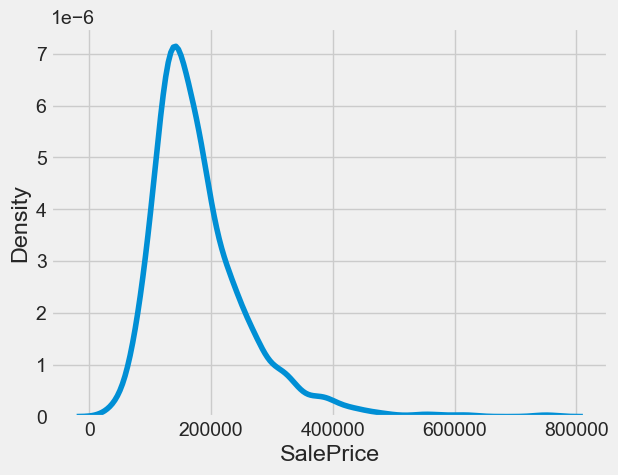

In [40]:
sns.kdeplot(x=x.SalePrice)

In [41]:
x['SalePrice'].skew()

1.8828757597682129

target is not distributed like a normal distribution.

## 3.2 check null values

<Axes: title={'center': 'percent of null values'}, ylabel='percent'>

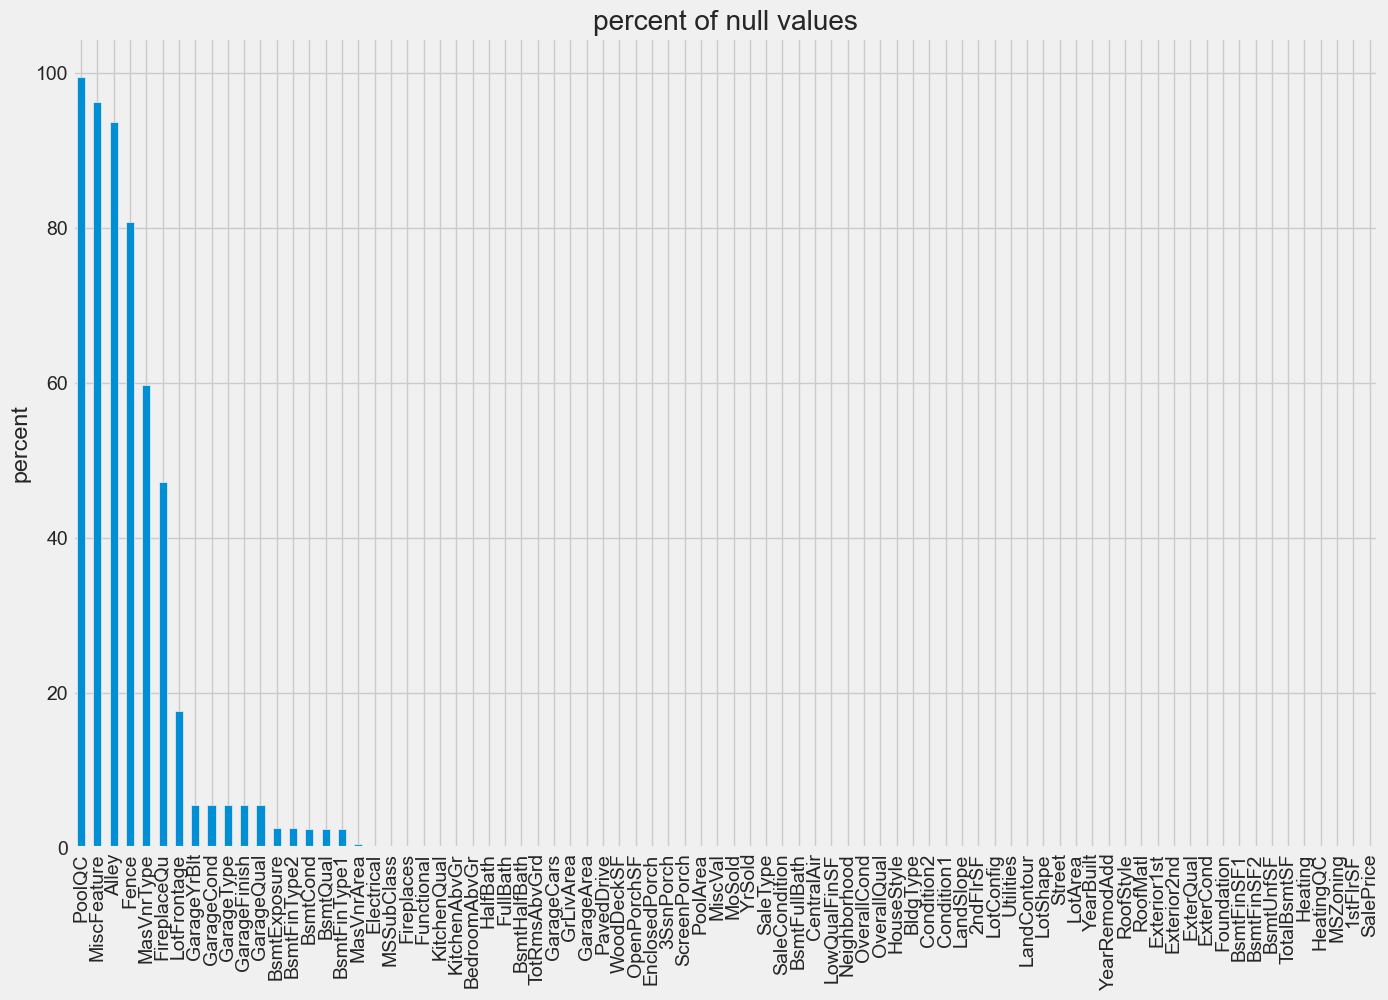

In [42]:
NullPercentage=(x.isnull().sum()/len(x))*100
NullPercentage=pd.Series(NullPercentage,name='NullPercentage',index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(15,10))
plt.title('percent of null values')
plt.ylabel('percent')
NullPercentage.plot(kind='bar')

we have 19 column with null values that top for of them are really a waste and don't give us any inform about target. (above 80 percent of null values)

so we drop them from two dataset.

In [43]:
for data in datas:
    data.drop(NullPercentage.index[0:4], axis=1, inplace=True) 

## 3.3 plot data

write a function that make the work easy.

In [44]:
def plot(col, data=x, target='SalePrice'):
   
    if pd.api.types.is_numeric_dtype(data[col]):
        sns.jointplot(x=col, y=target, data=data ,kind='reg')
        plt.show()
        print(f'corr:{data[col].corr(data[target])}')
    else:
        fig, axes = plt.subplots(1, 2, figsize=(14, 10))
        gb=data.groupby(col)[target].agg(["count","mean"])
        gb['count']=100*(gb['count']/len(data))
        null_count = data[col].isna().sum()
        null_mean = data[data[col].isna()][target].mean()
        if data[col].isna().sum():
            gb.loc['Missing'] = [null_count, null_mean]
        gb_mean_sorted = gb.sort_values(by="mean", ascending=False)
        sns.barplot(x=gb_mean_sorted.index, y=gb_mean_sorted['mean'], ax=axes[0])
        axes[0].set_title(f'Distribution of "{col}"')
        gb_count_sorted = gb.sort_values(by="count", ascending=False)
        gb['count']=100*(gb['count']/len(data))
        sns.barplot(x=gb_count_sorted.index, y=gb_count_sorted['count'], ax=axes[1])
        axes[1].set_title(f'Relationship between "{col}" and "{target}"')
        axes[1].set_ylabel('Percent')
        plt.tight_layout()
        plt.show()

In [45]:
len(x.columns)

76

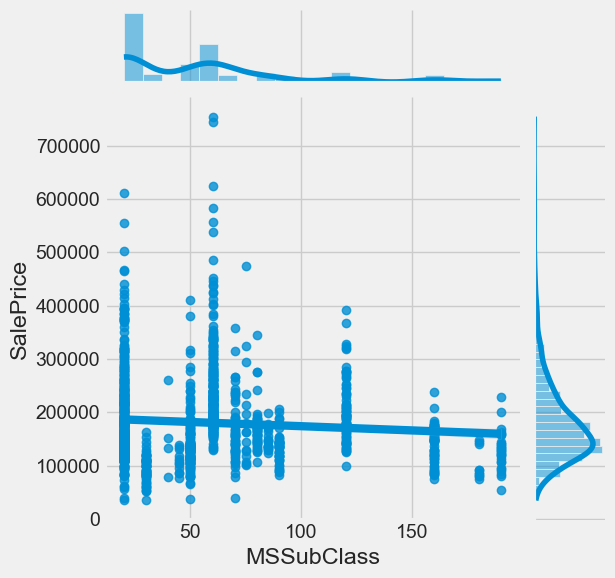

corr:-0.08428413512659516


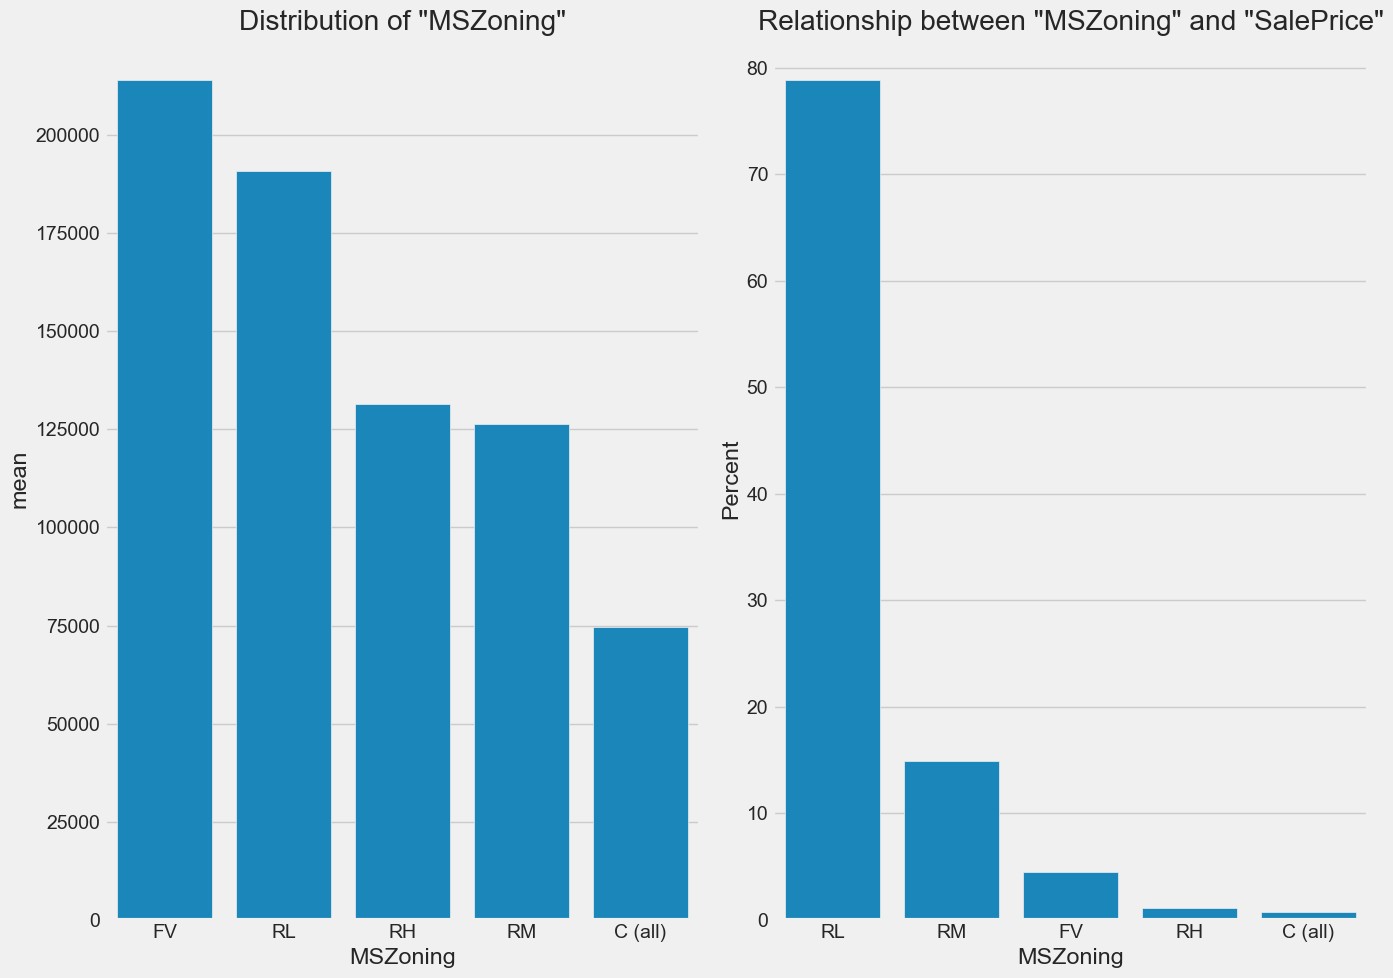

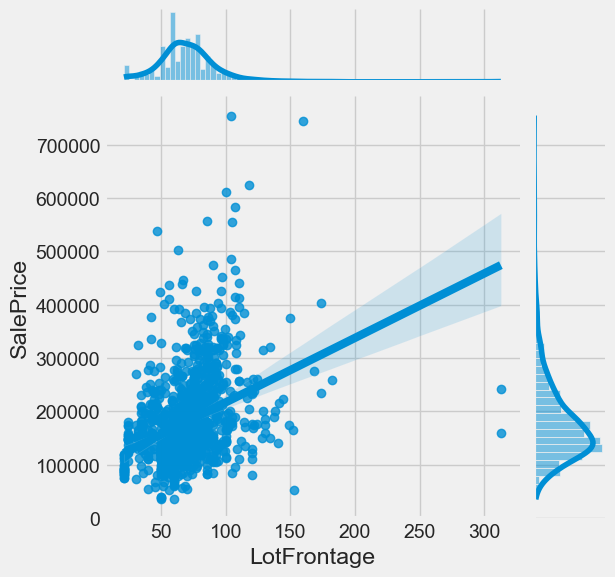

corr:0.3517990965706779


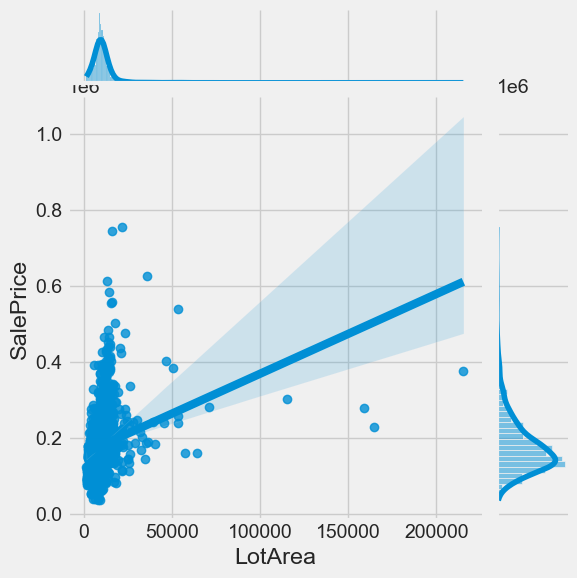

corr:0.26384335387140556


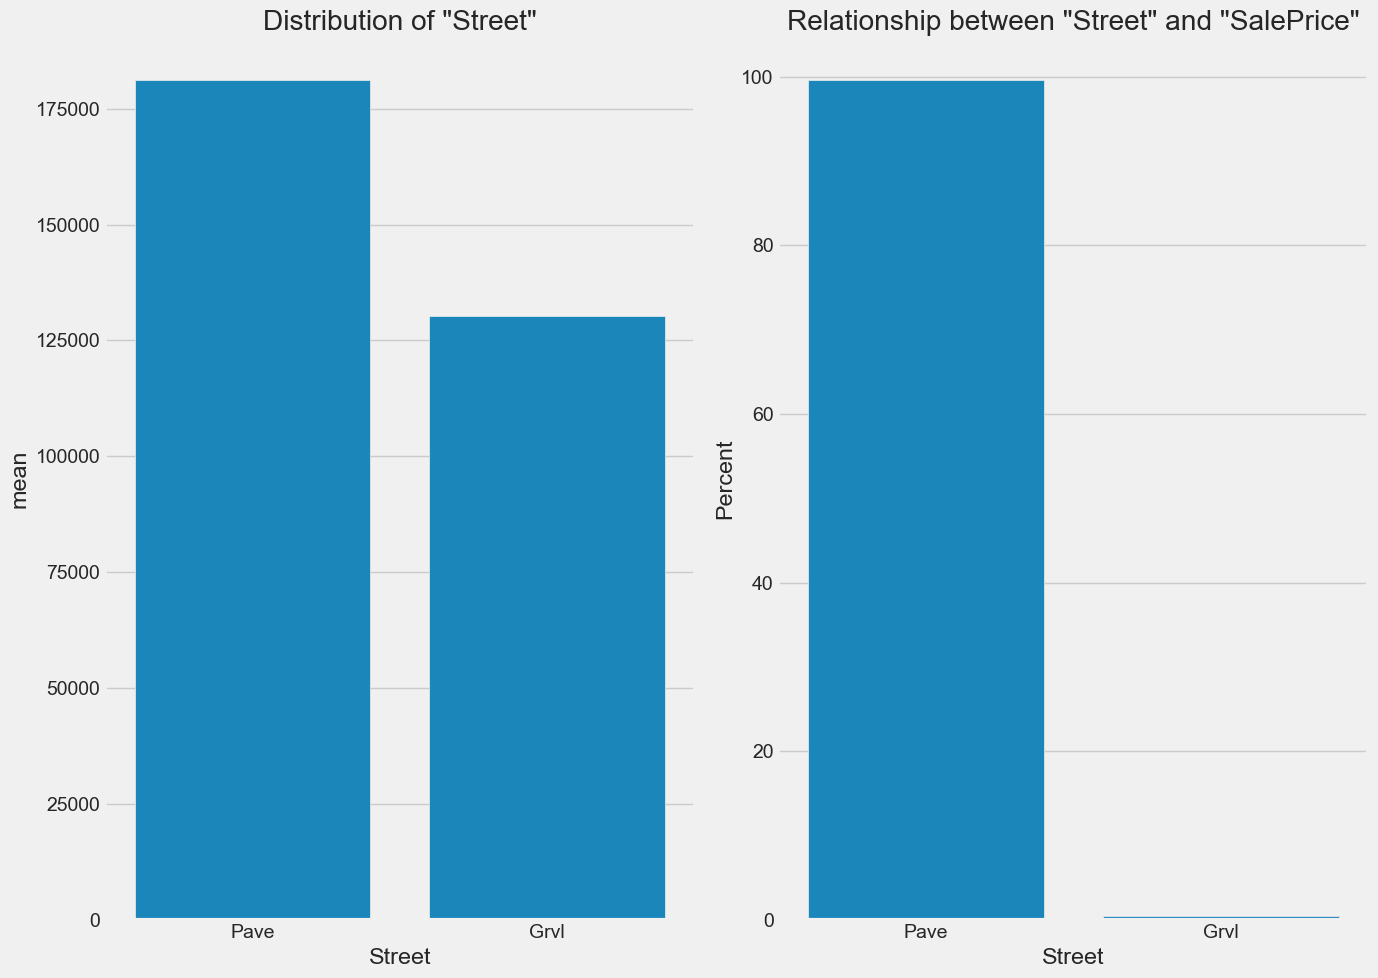

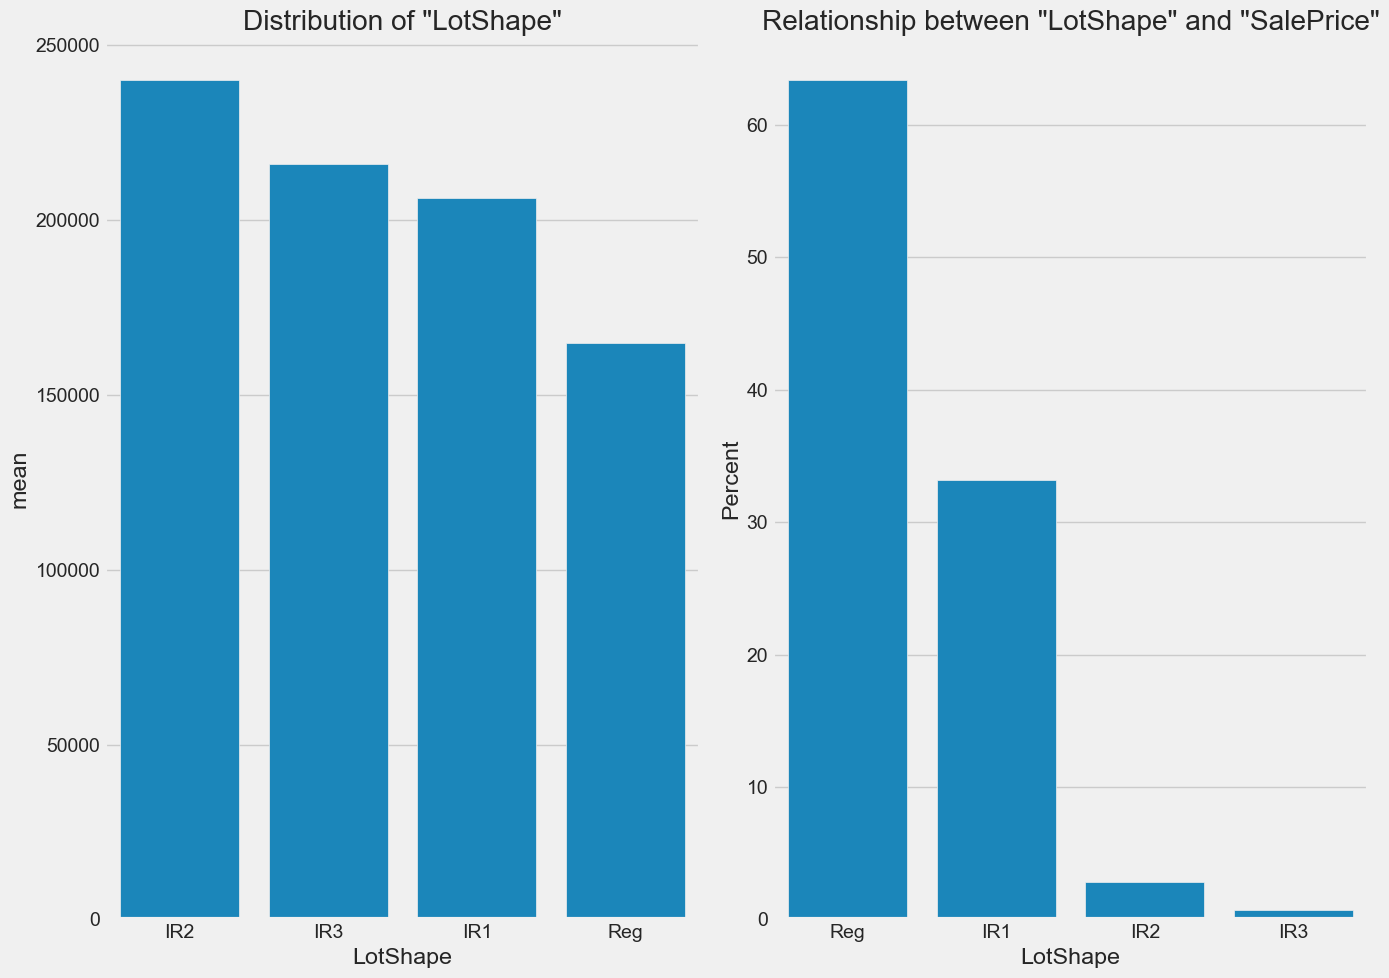

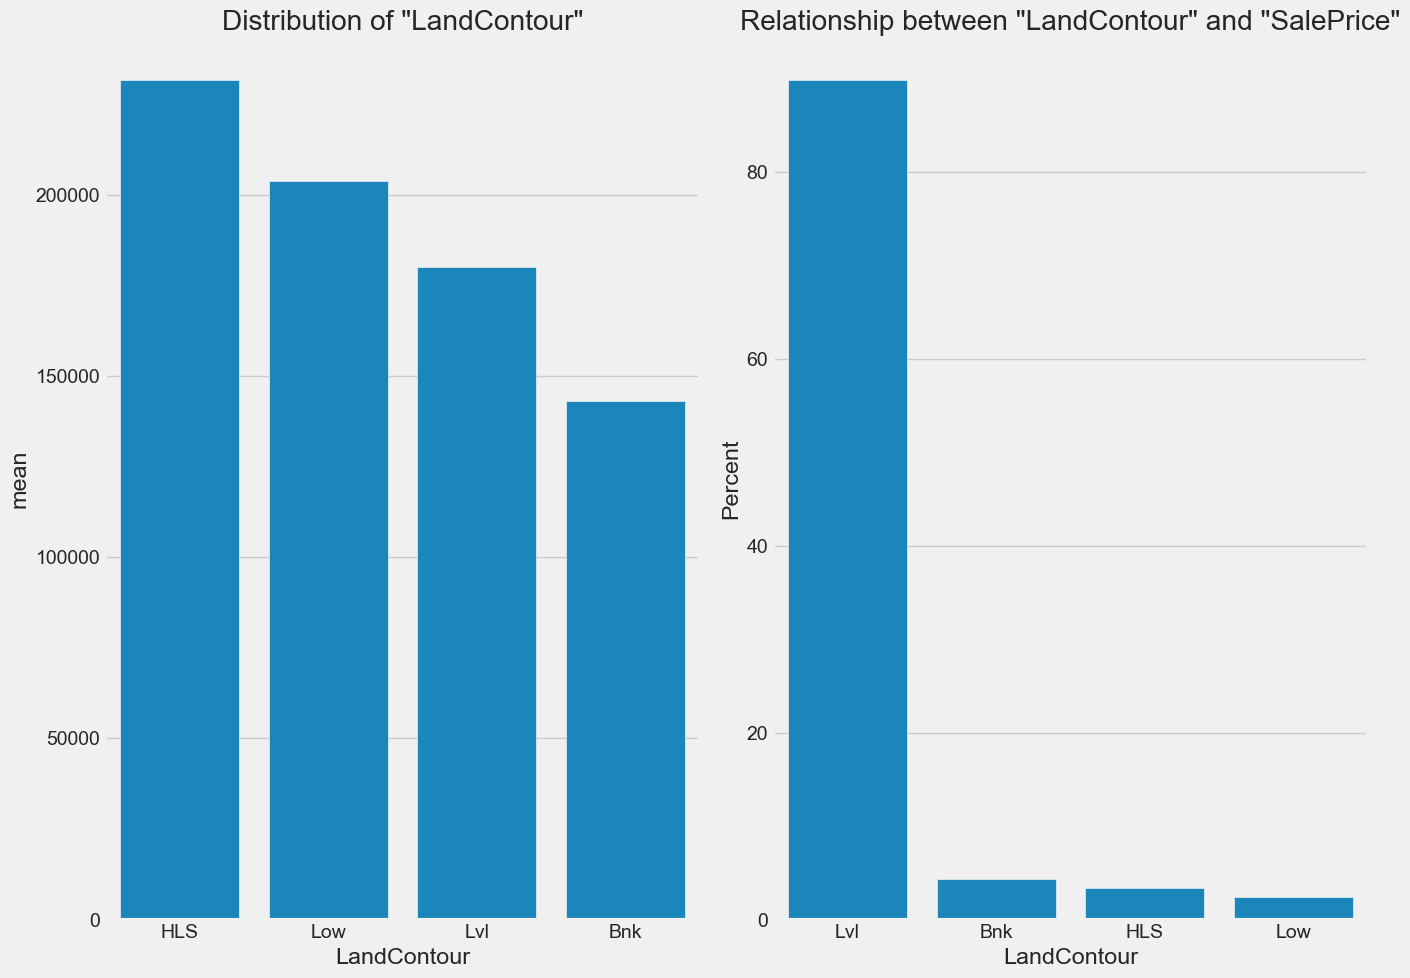

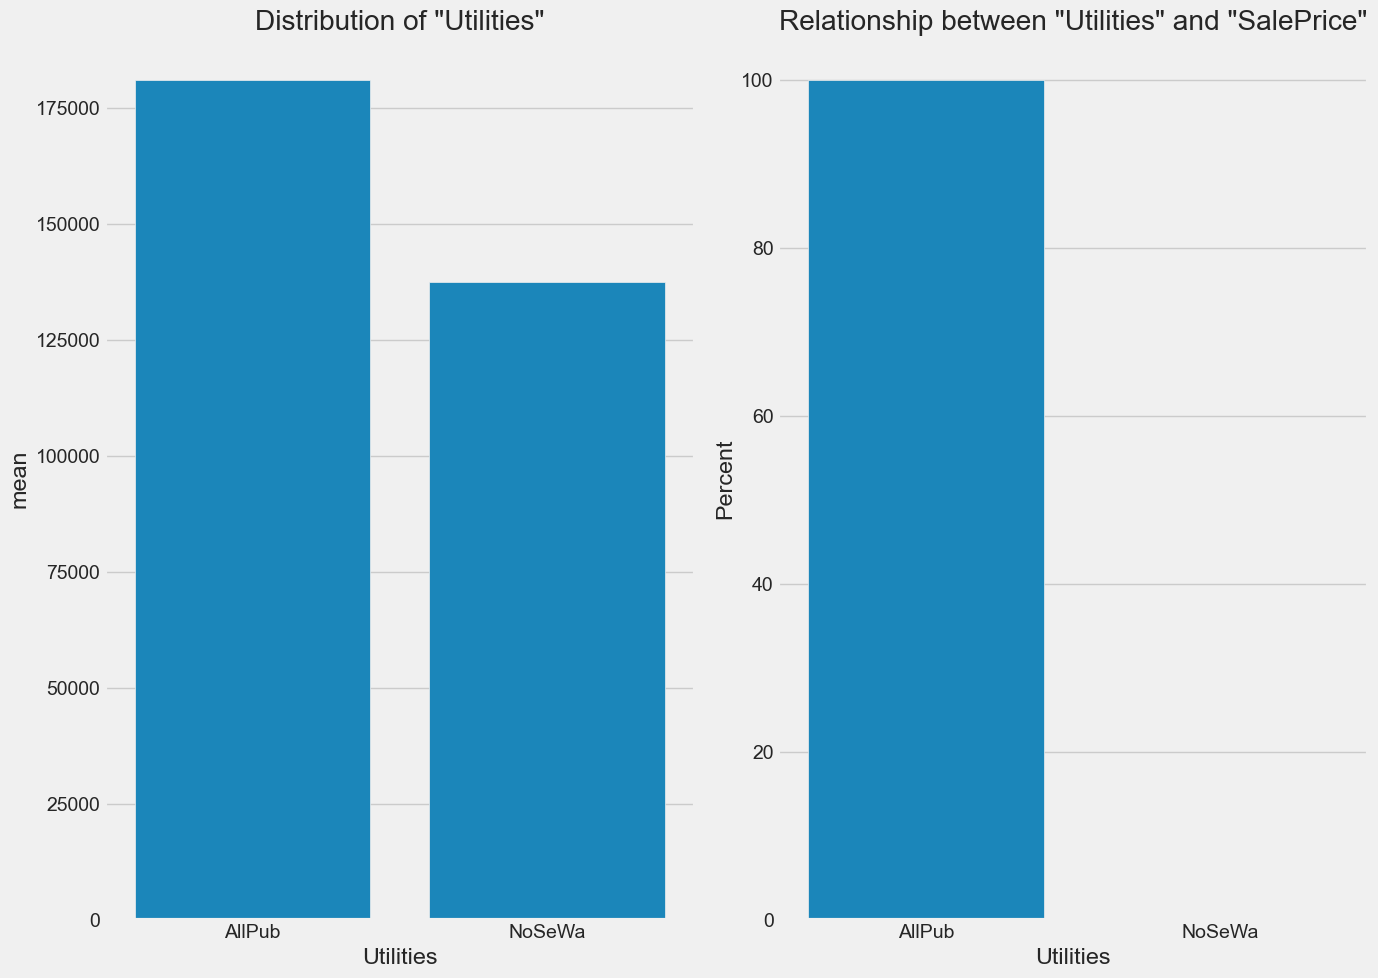

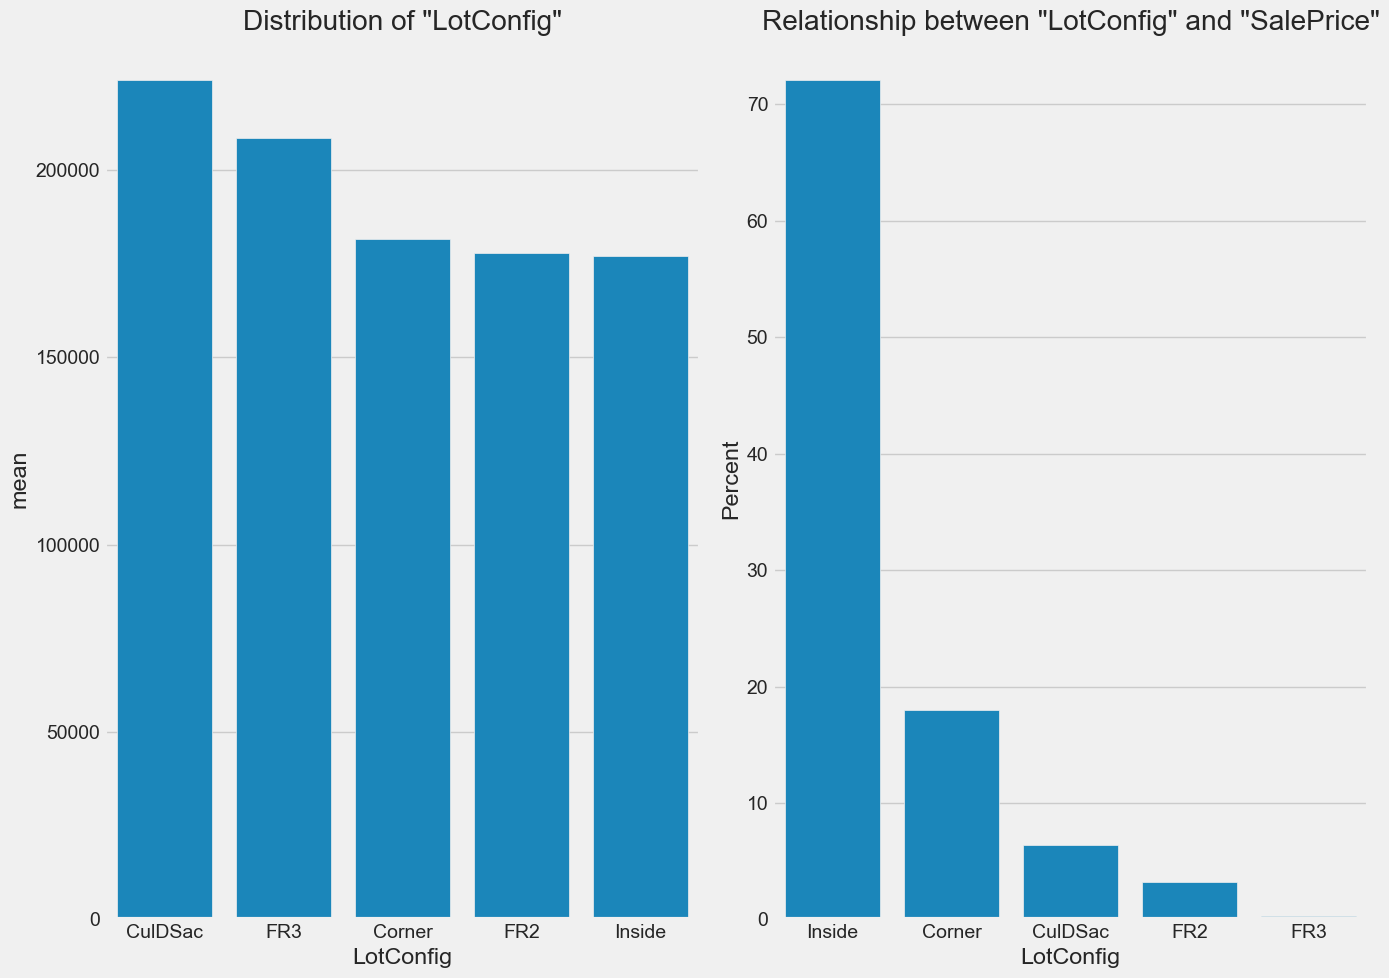

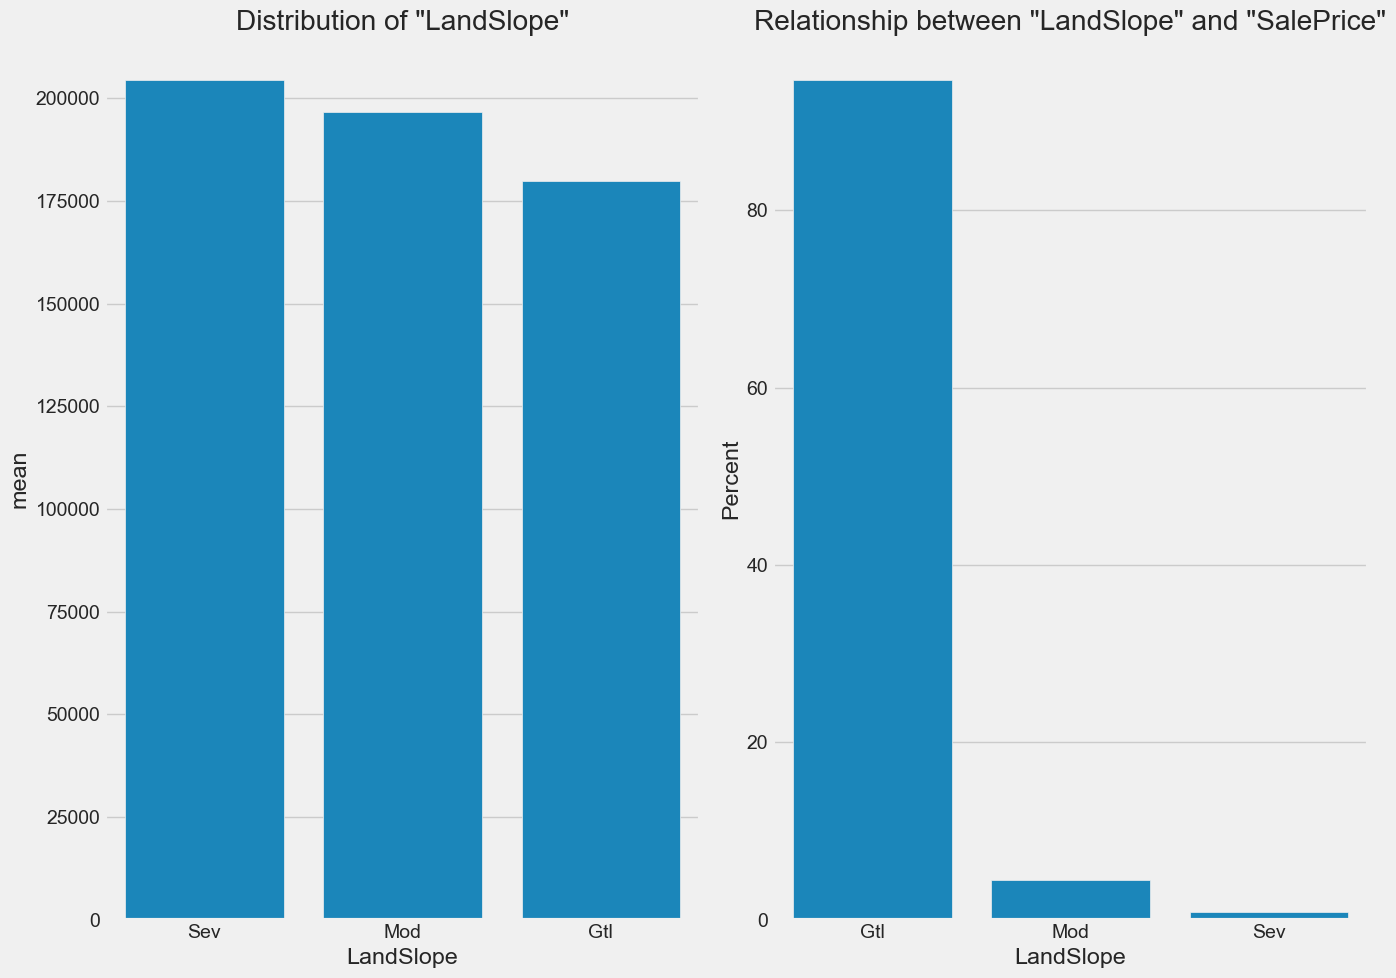

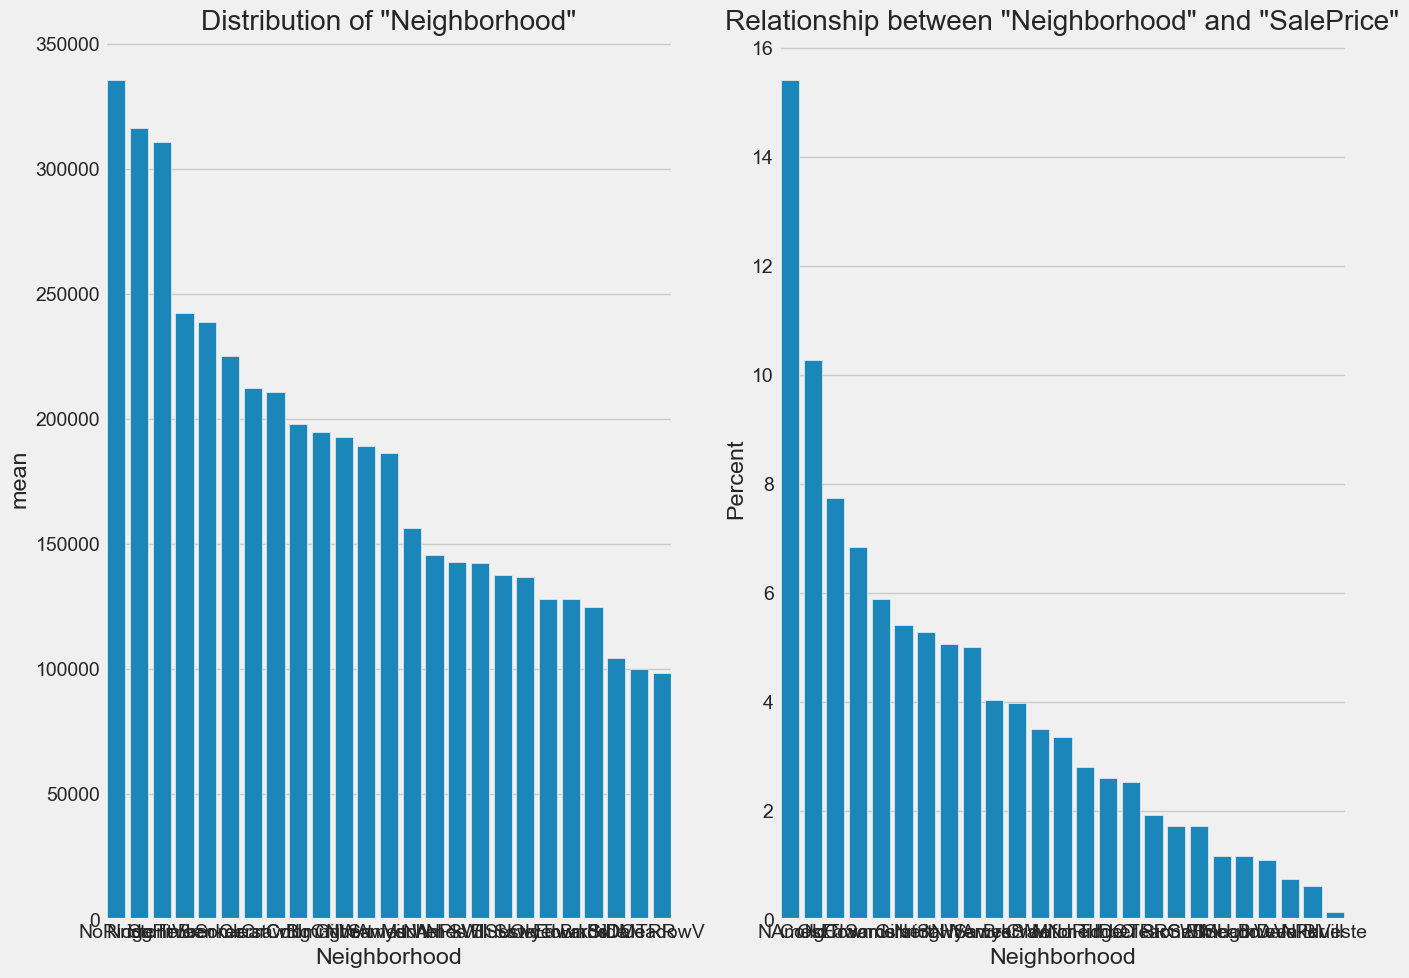

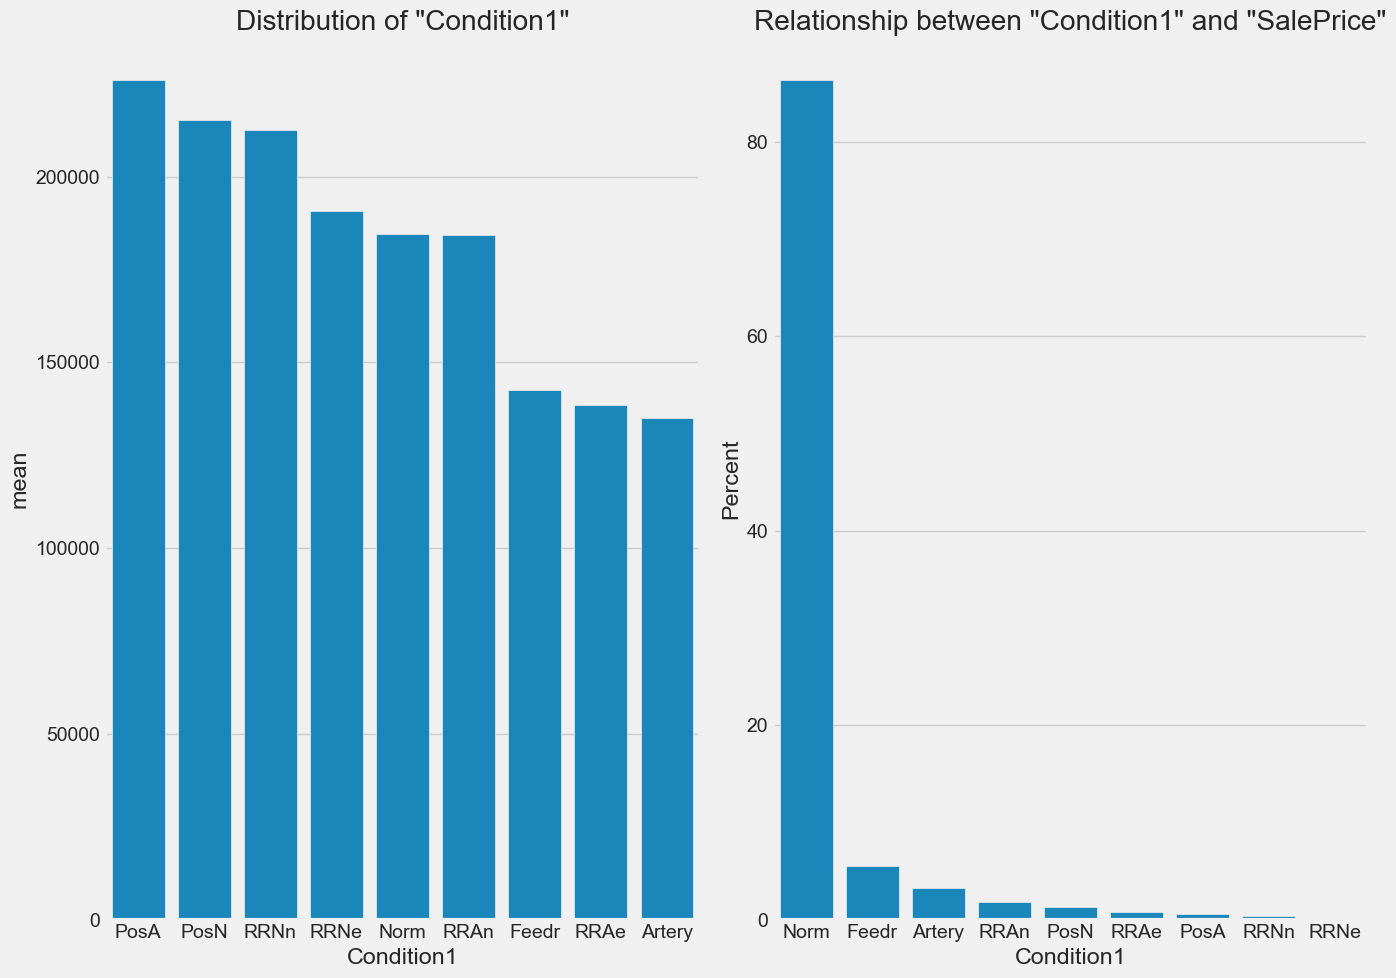

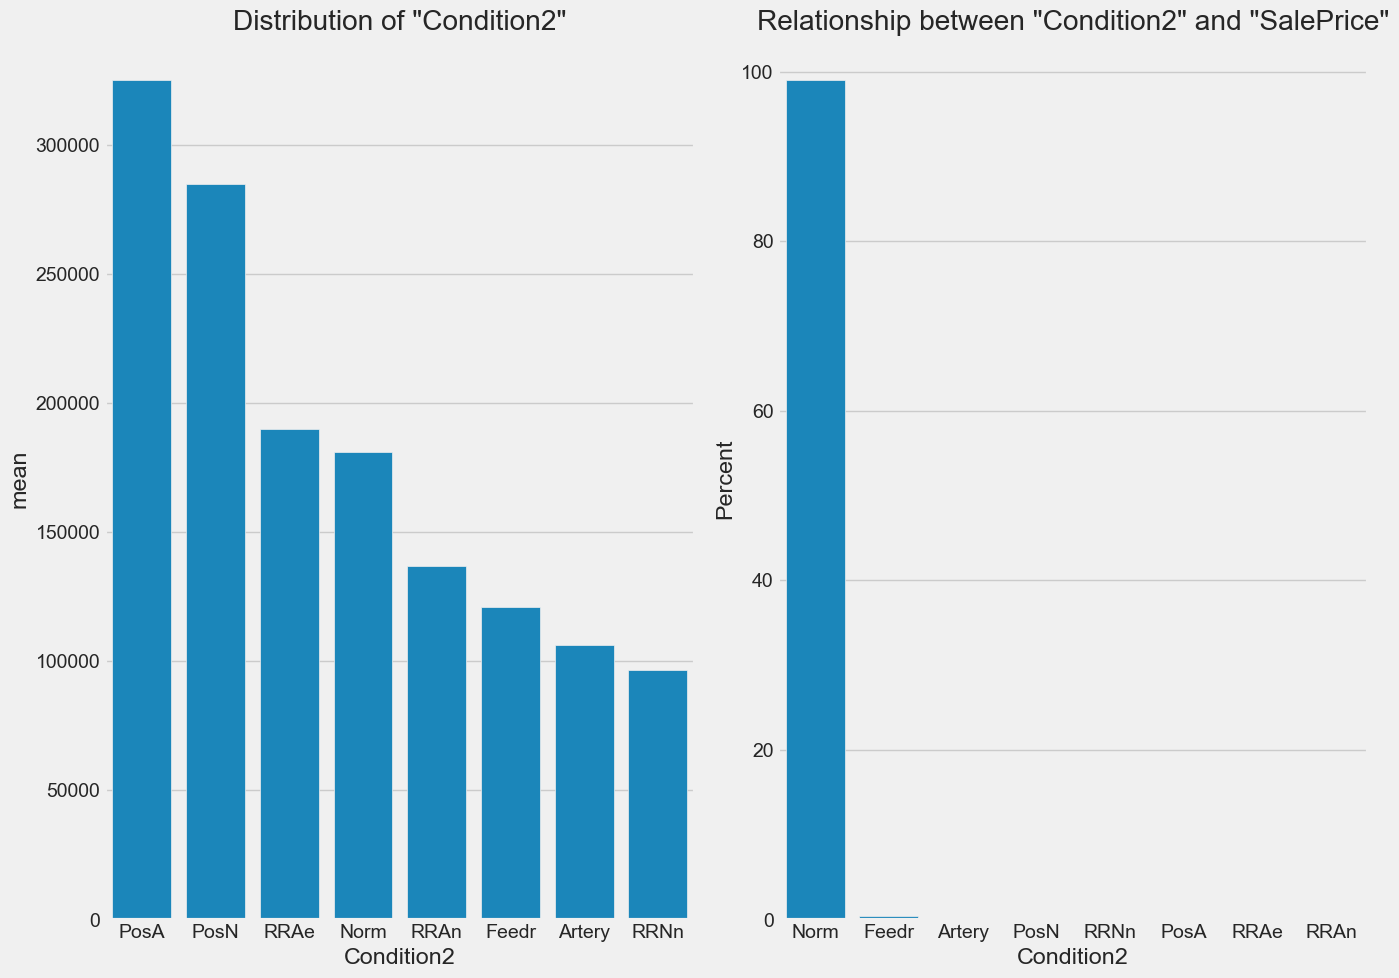

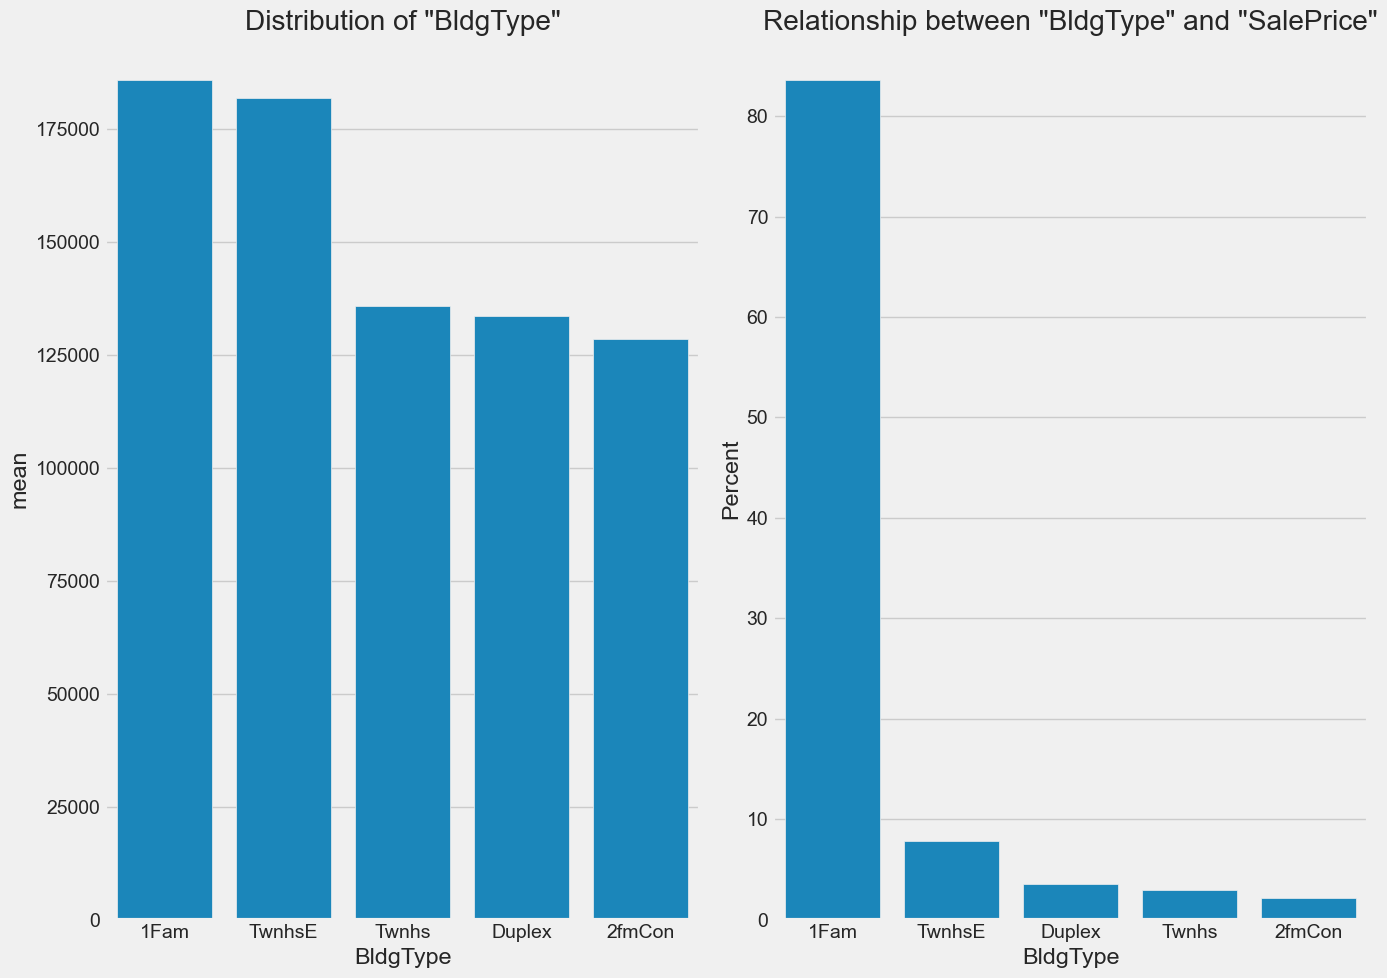

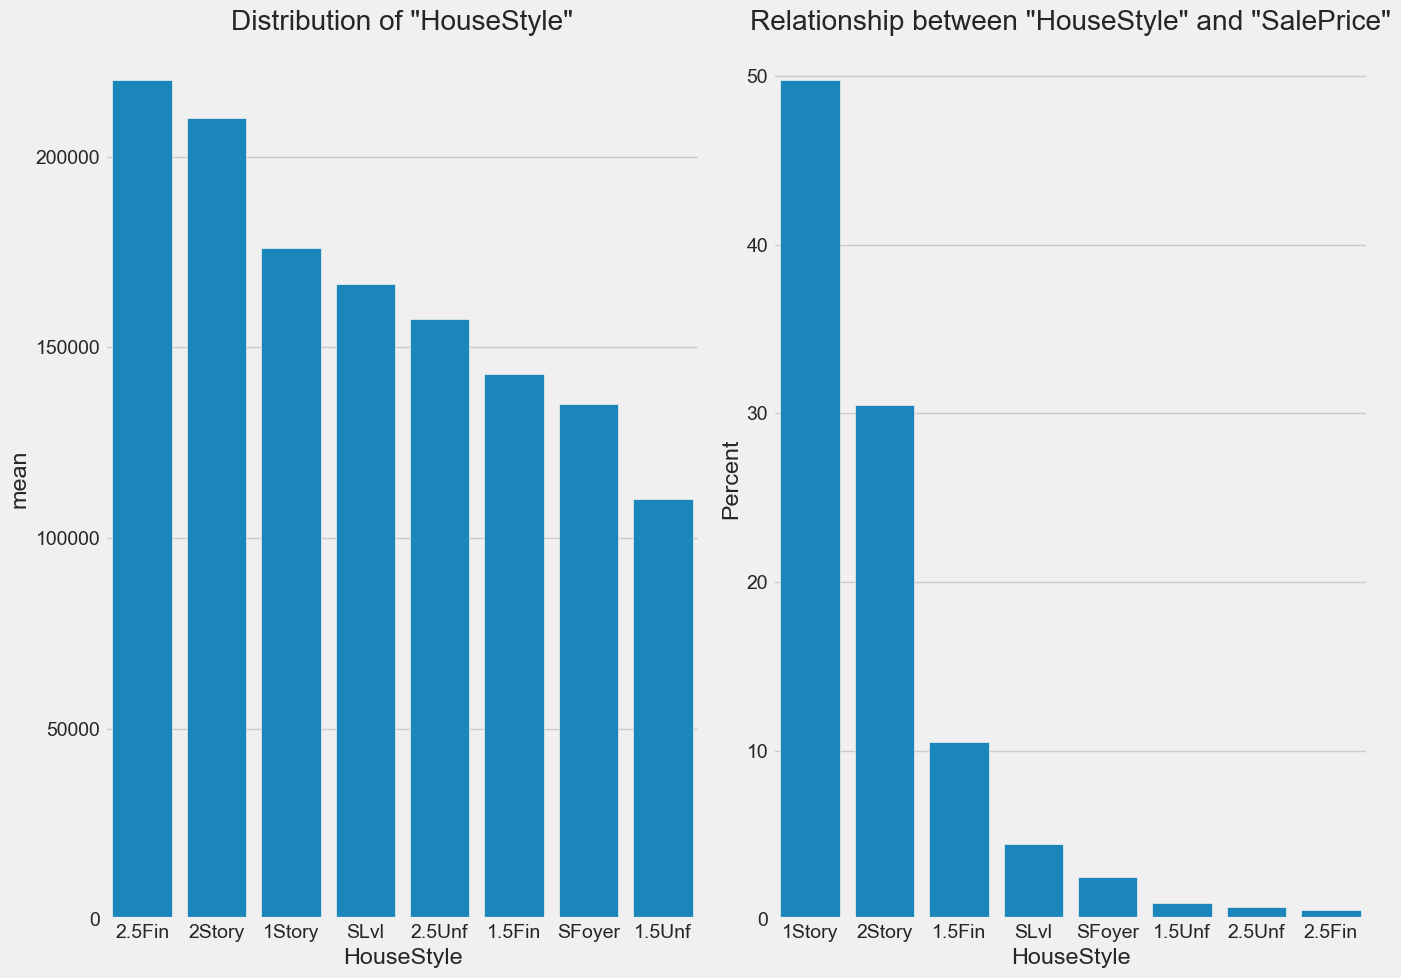

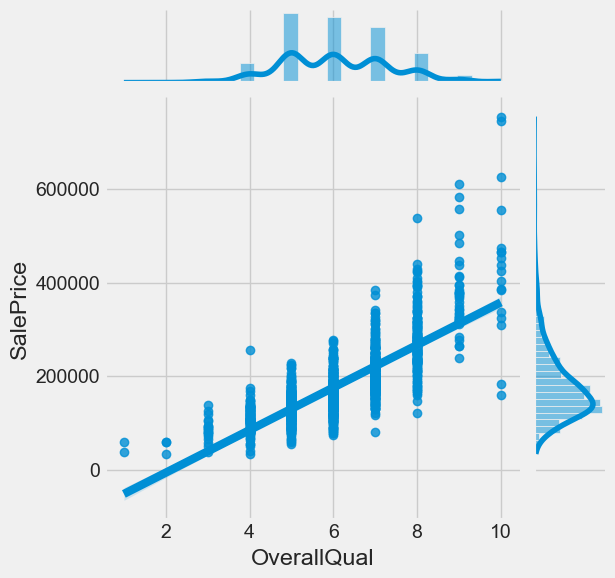

corr:0.7909816005838048


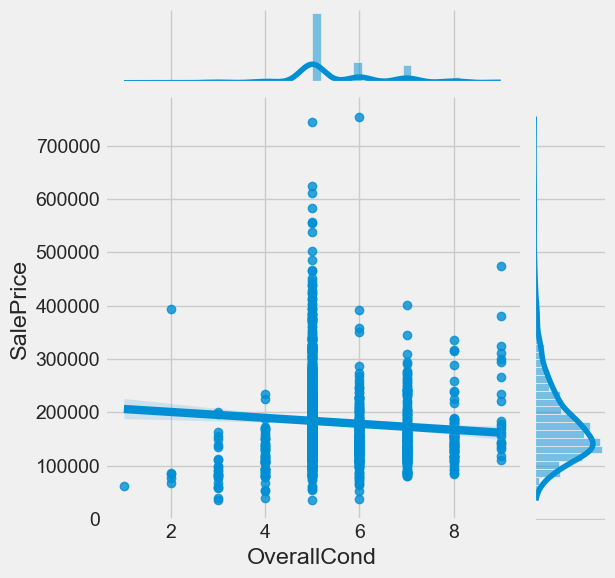

corr:-0.07785589404867799


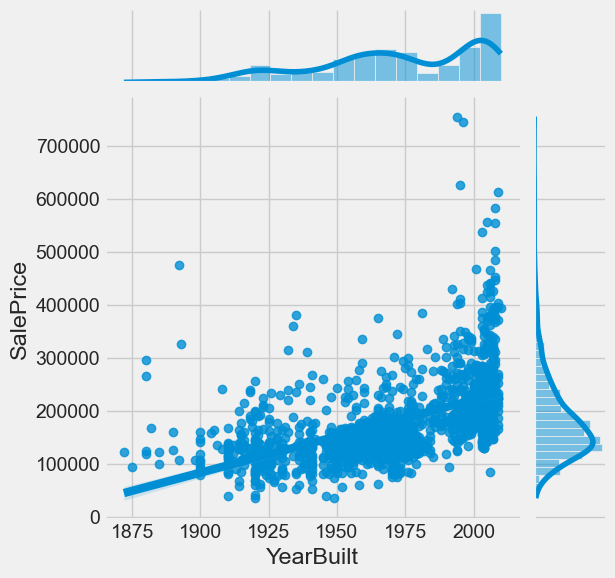

corr:0.5228973328794969


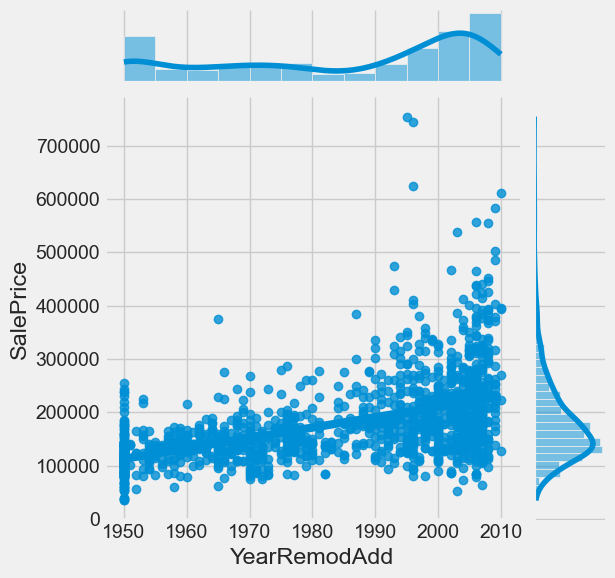

corr:0.5071009671113861


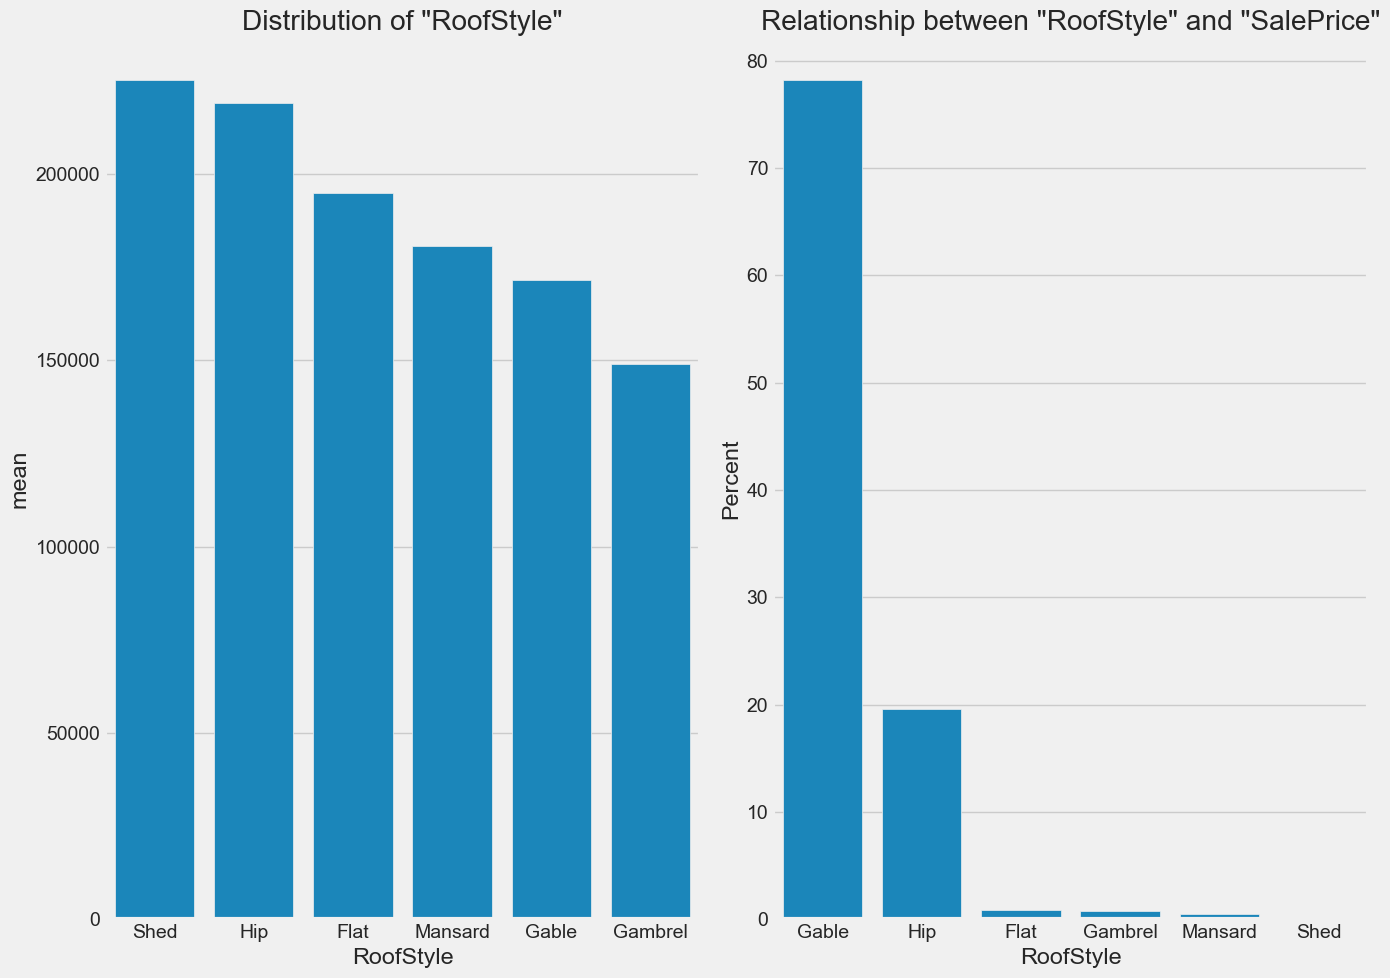

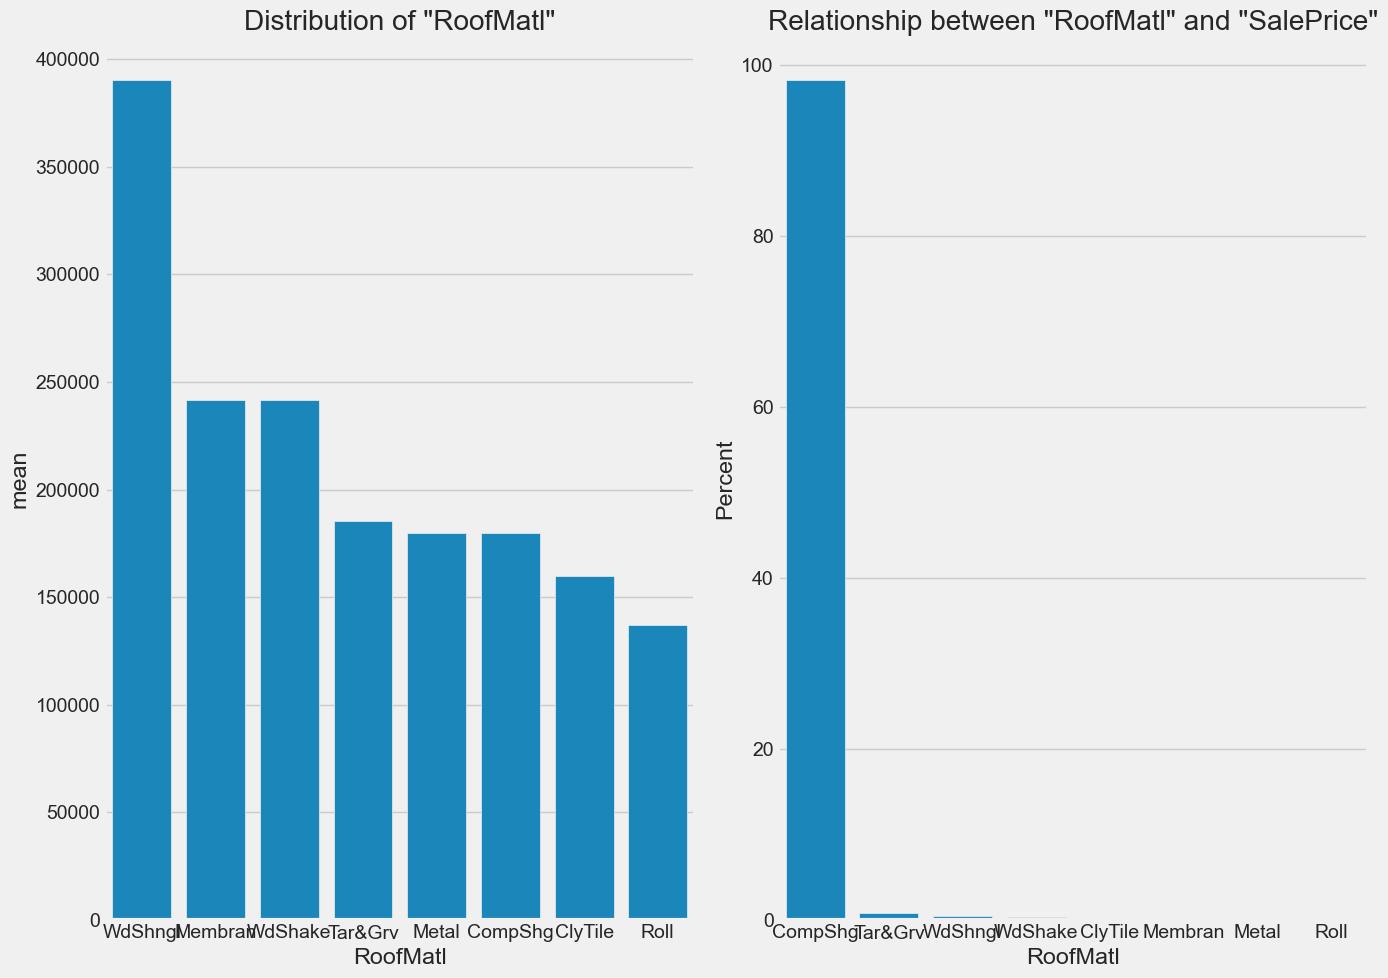

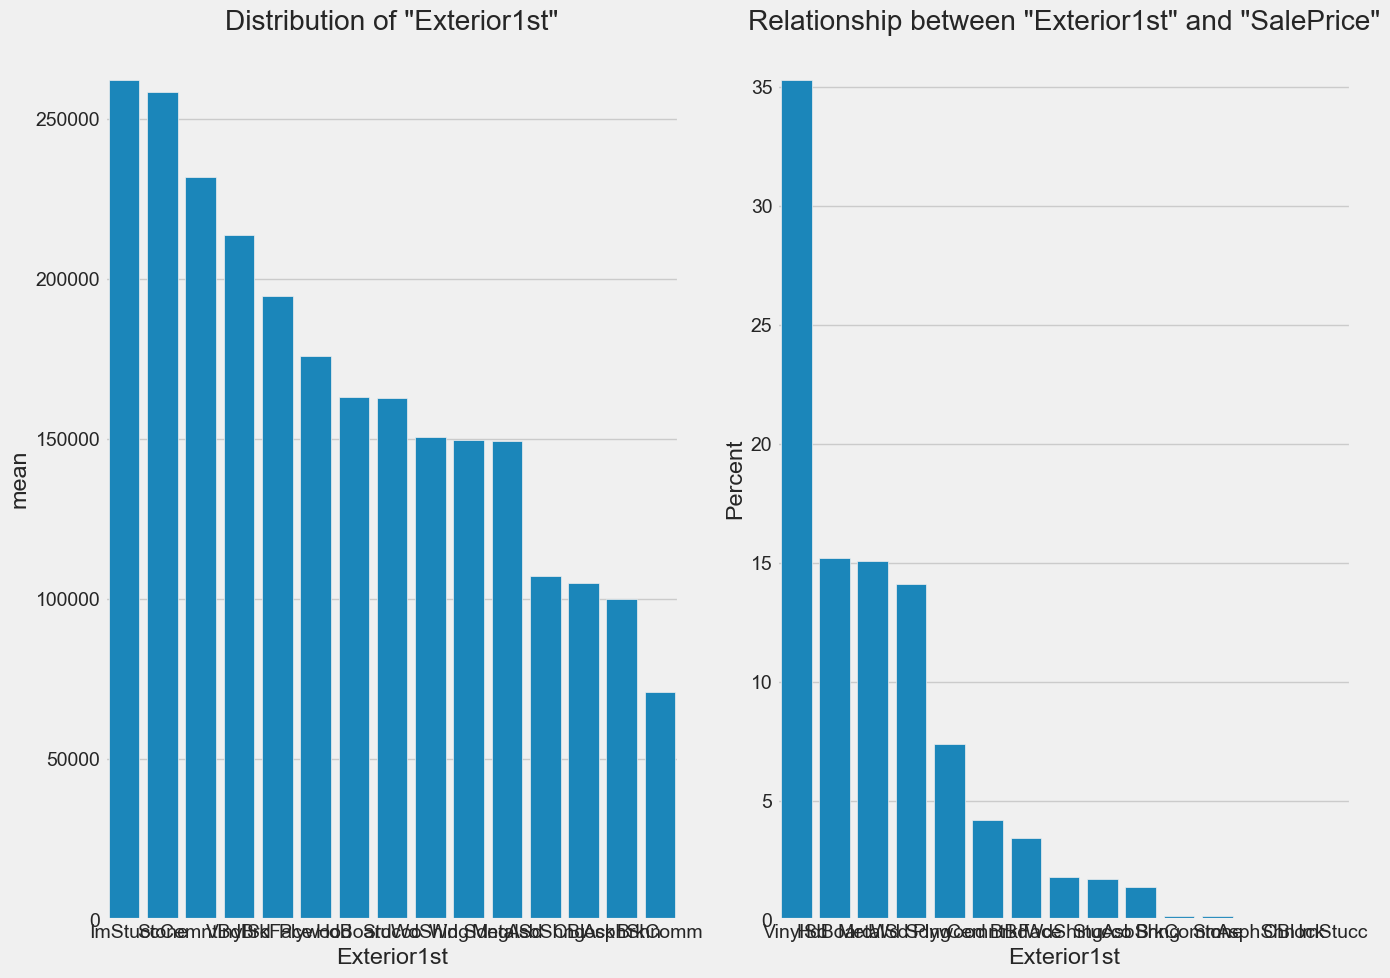

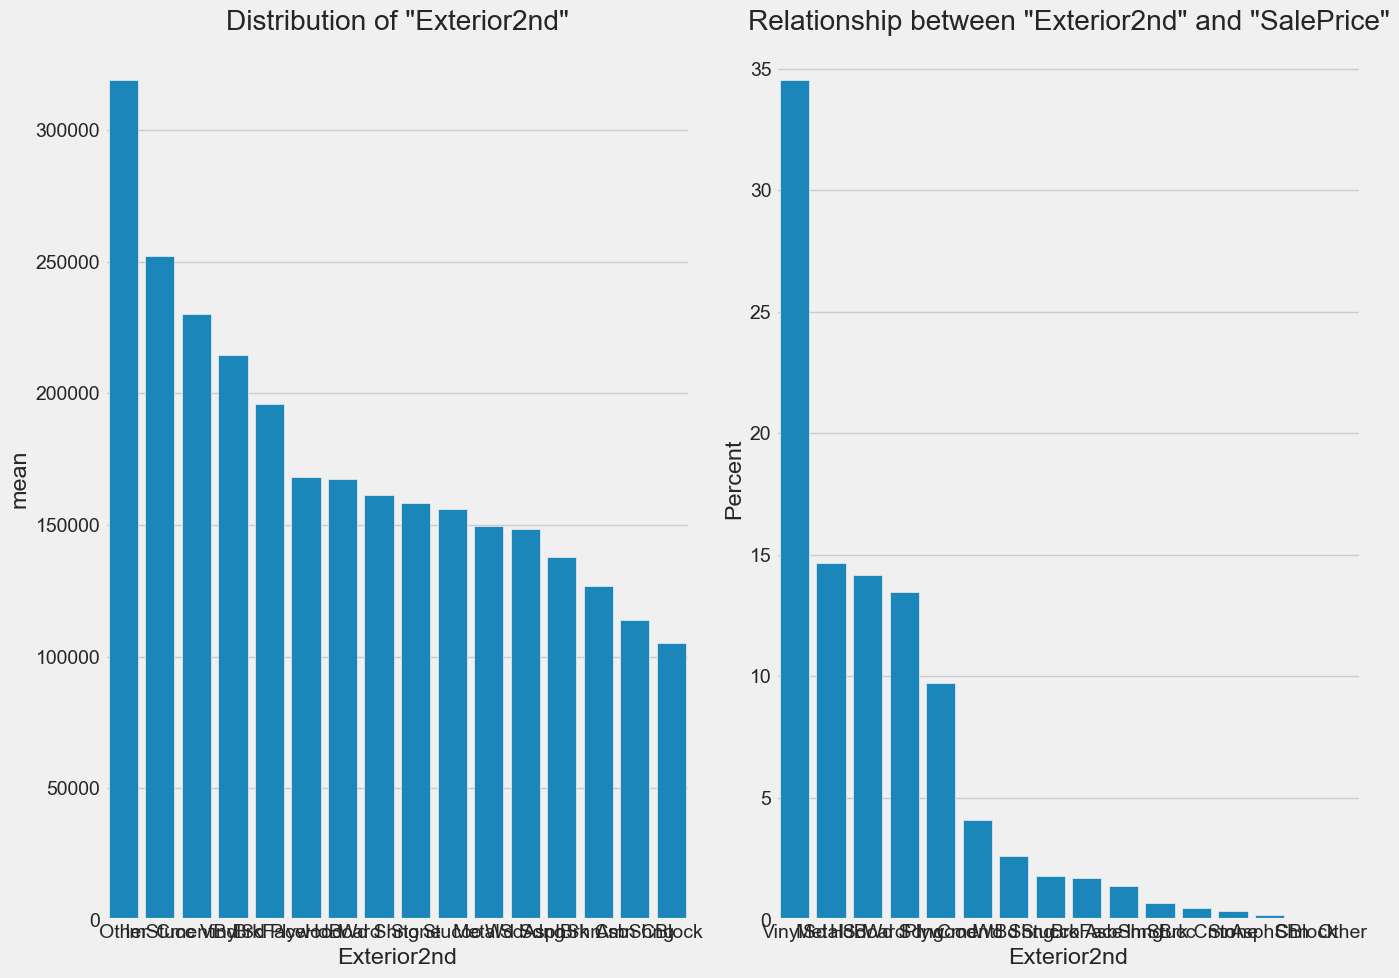

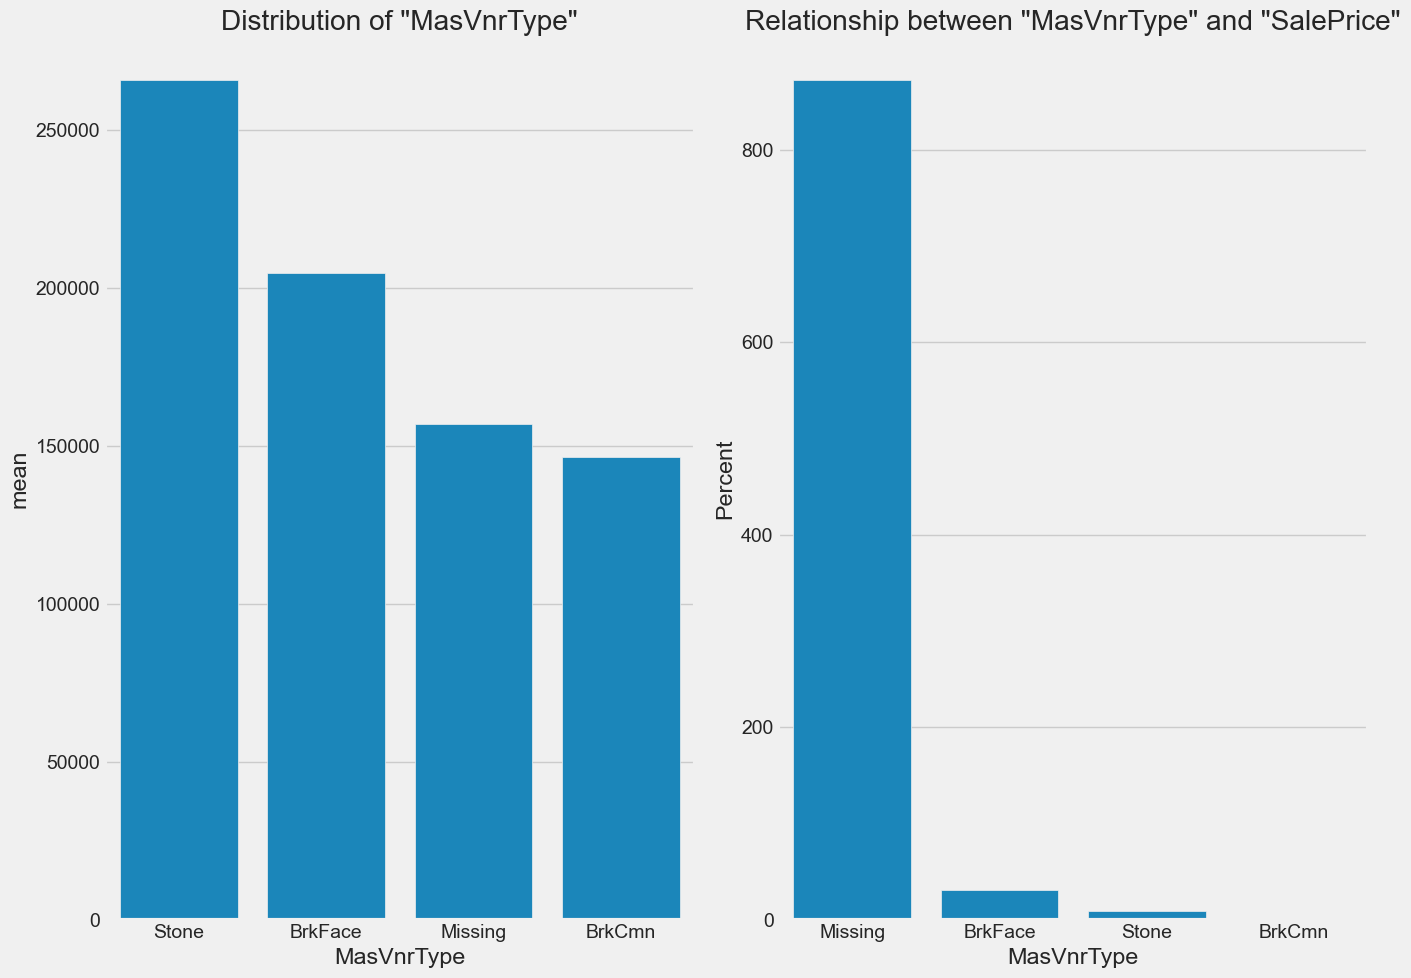

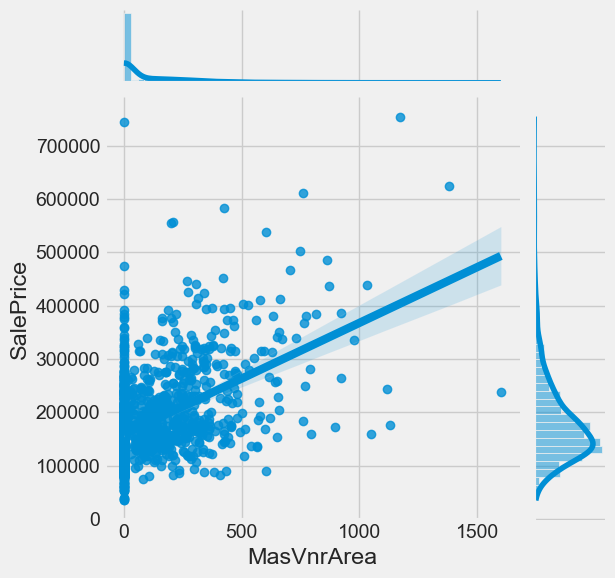

corr:0.4774930470957154


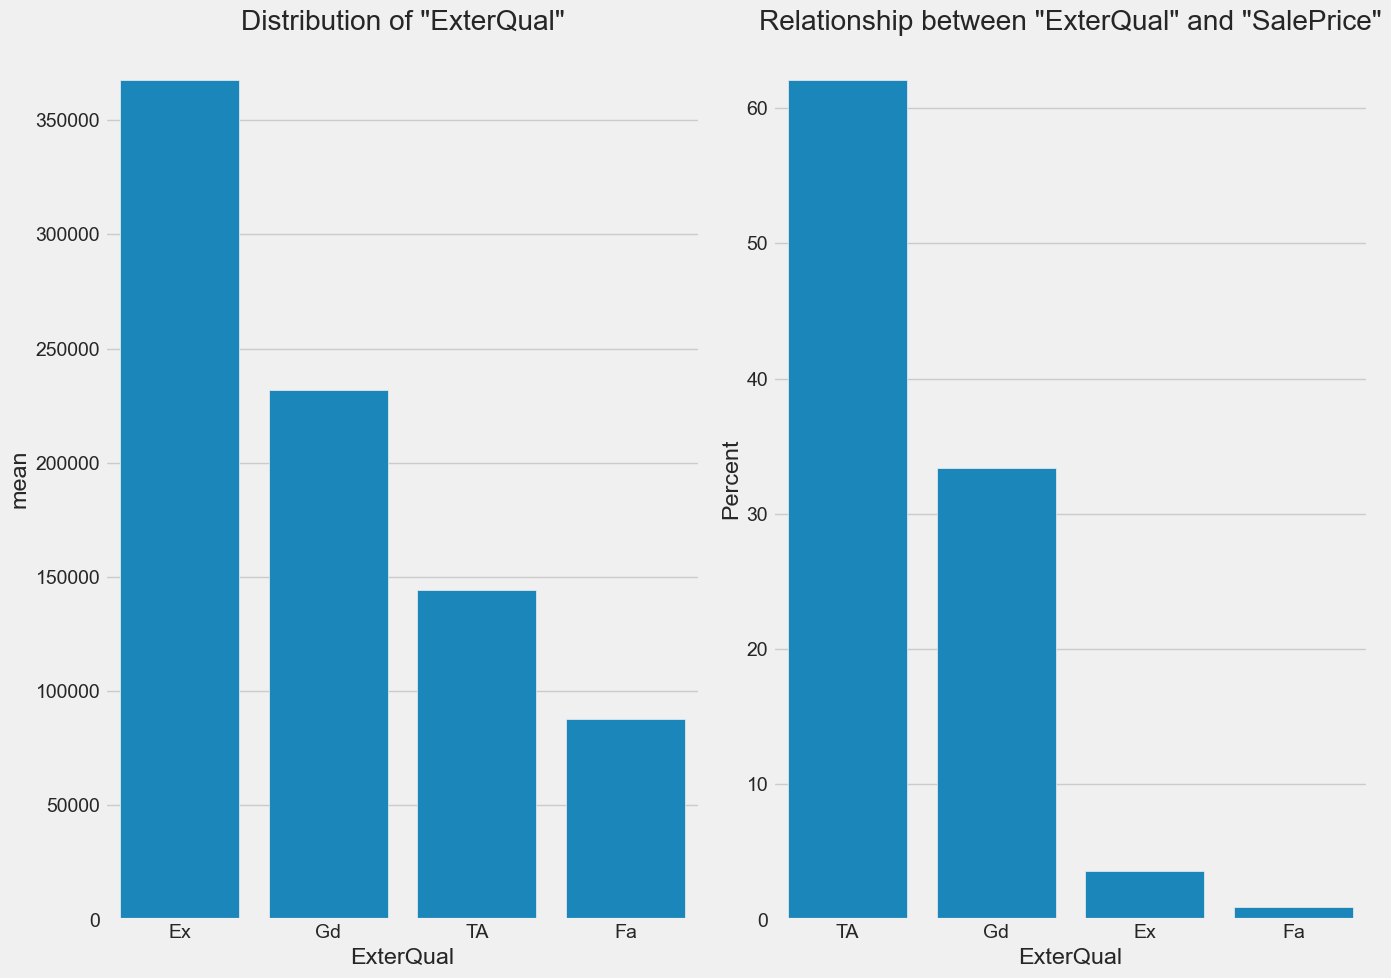

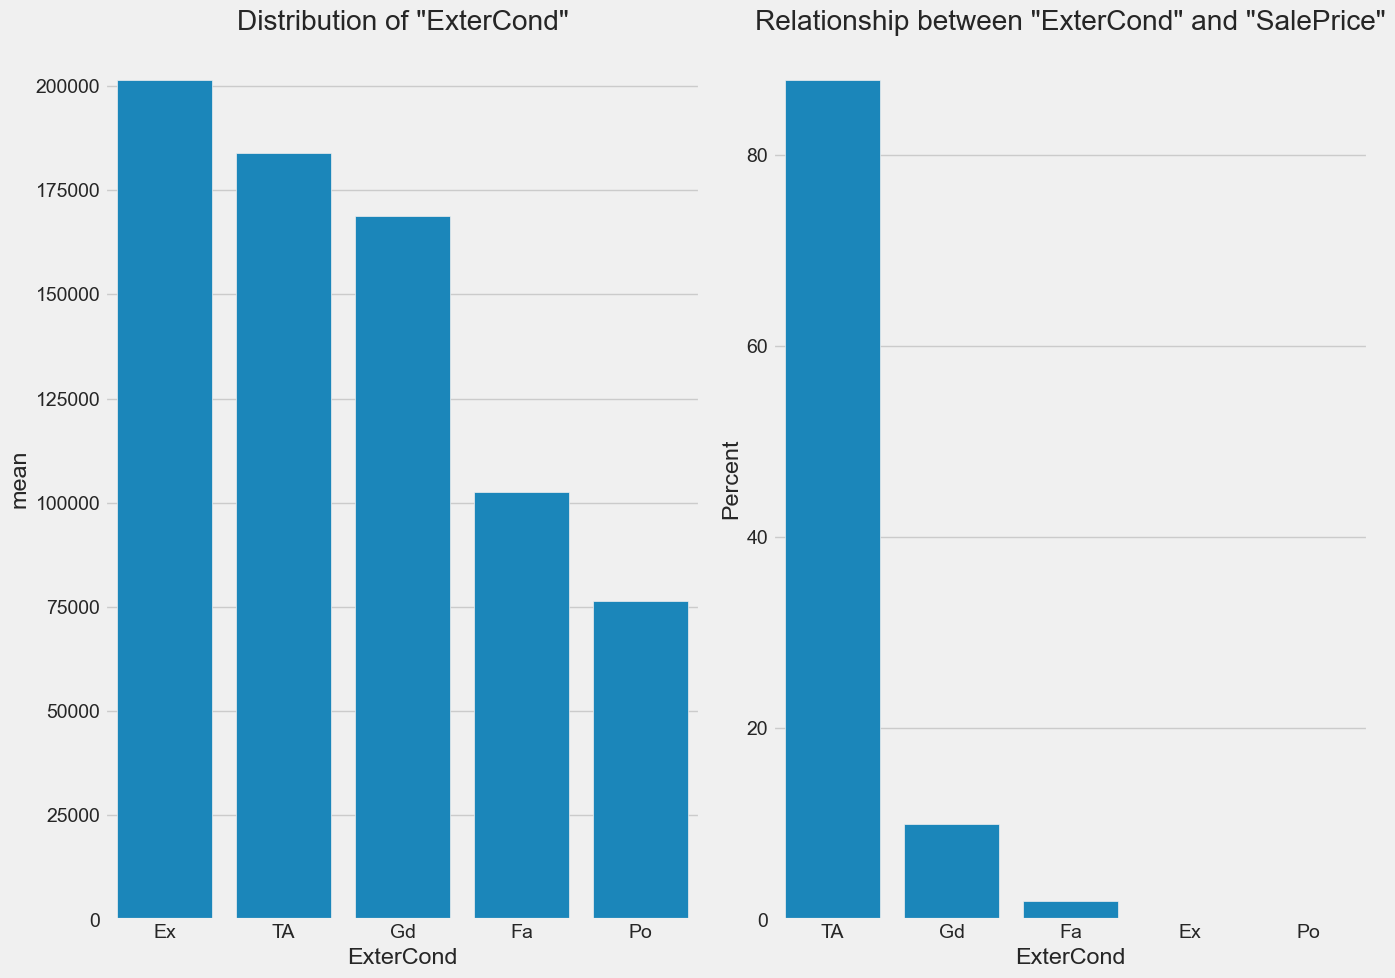

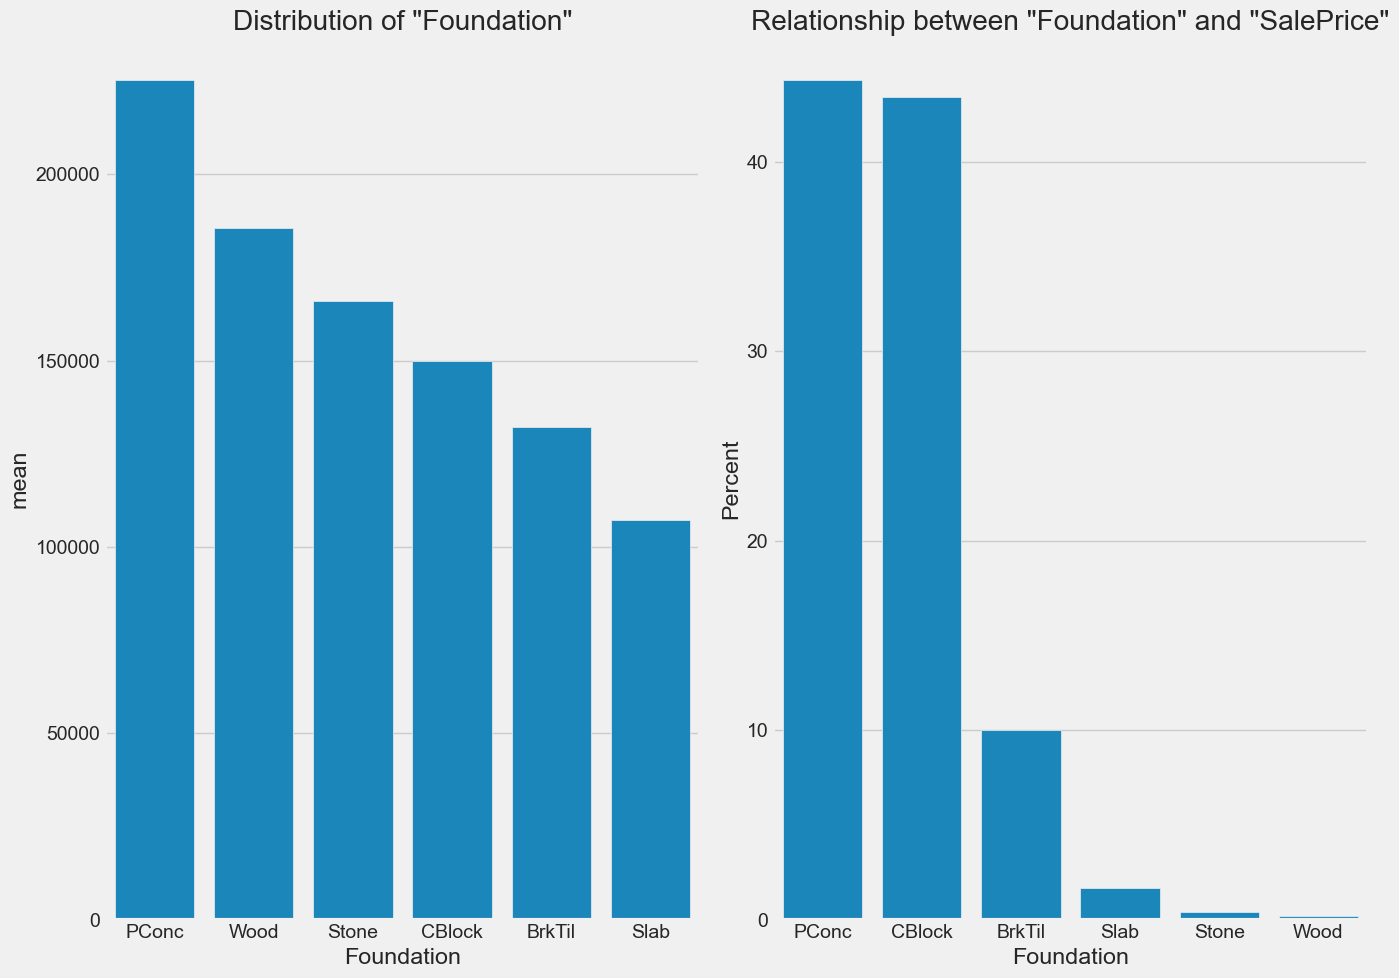

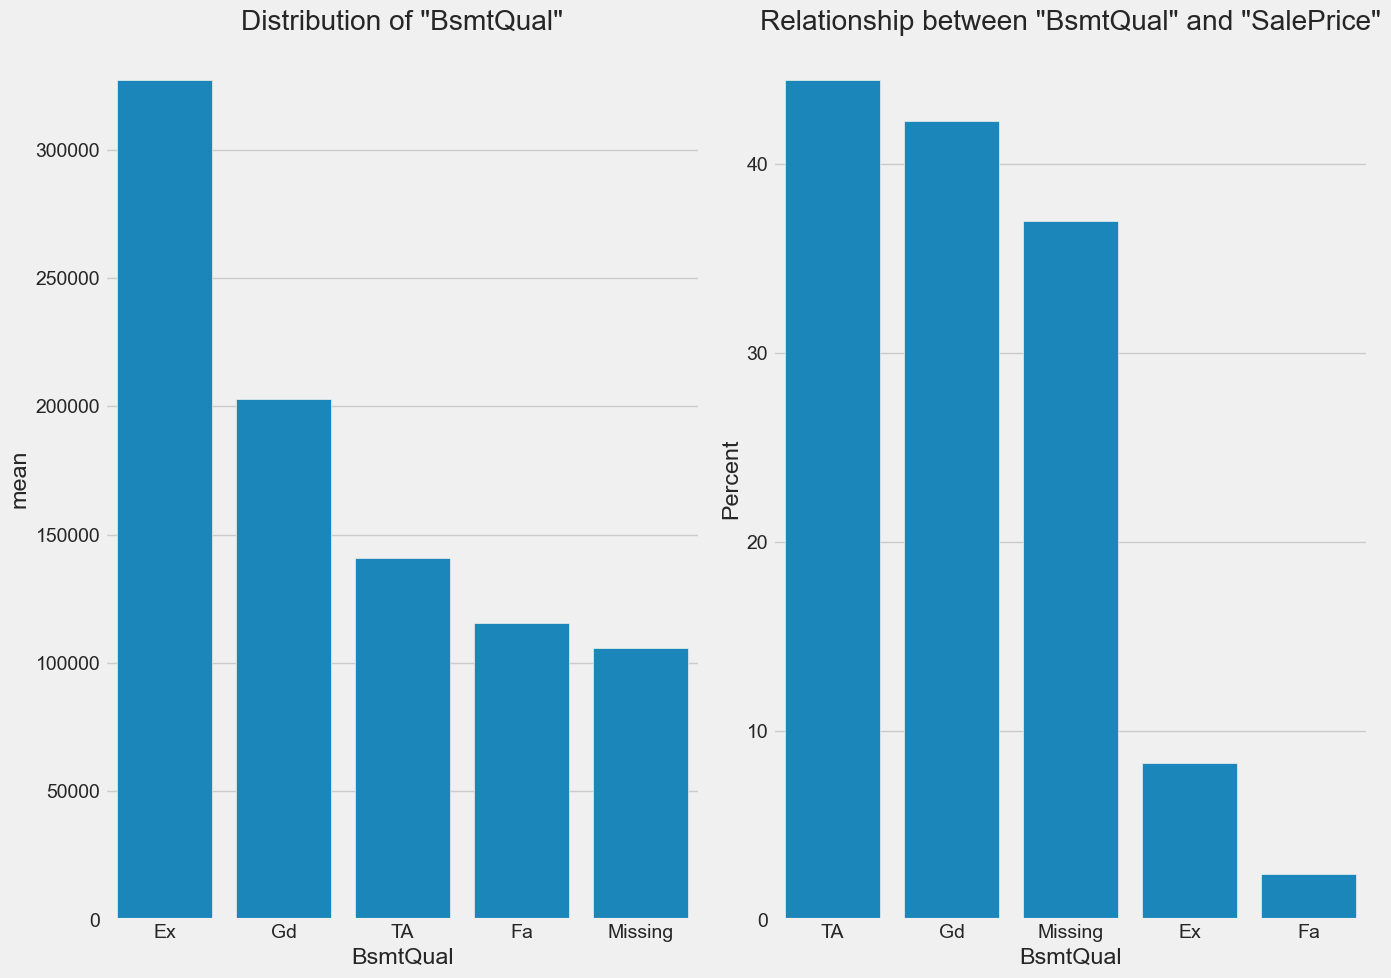

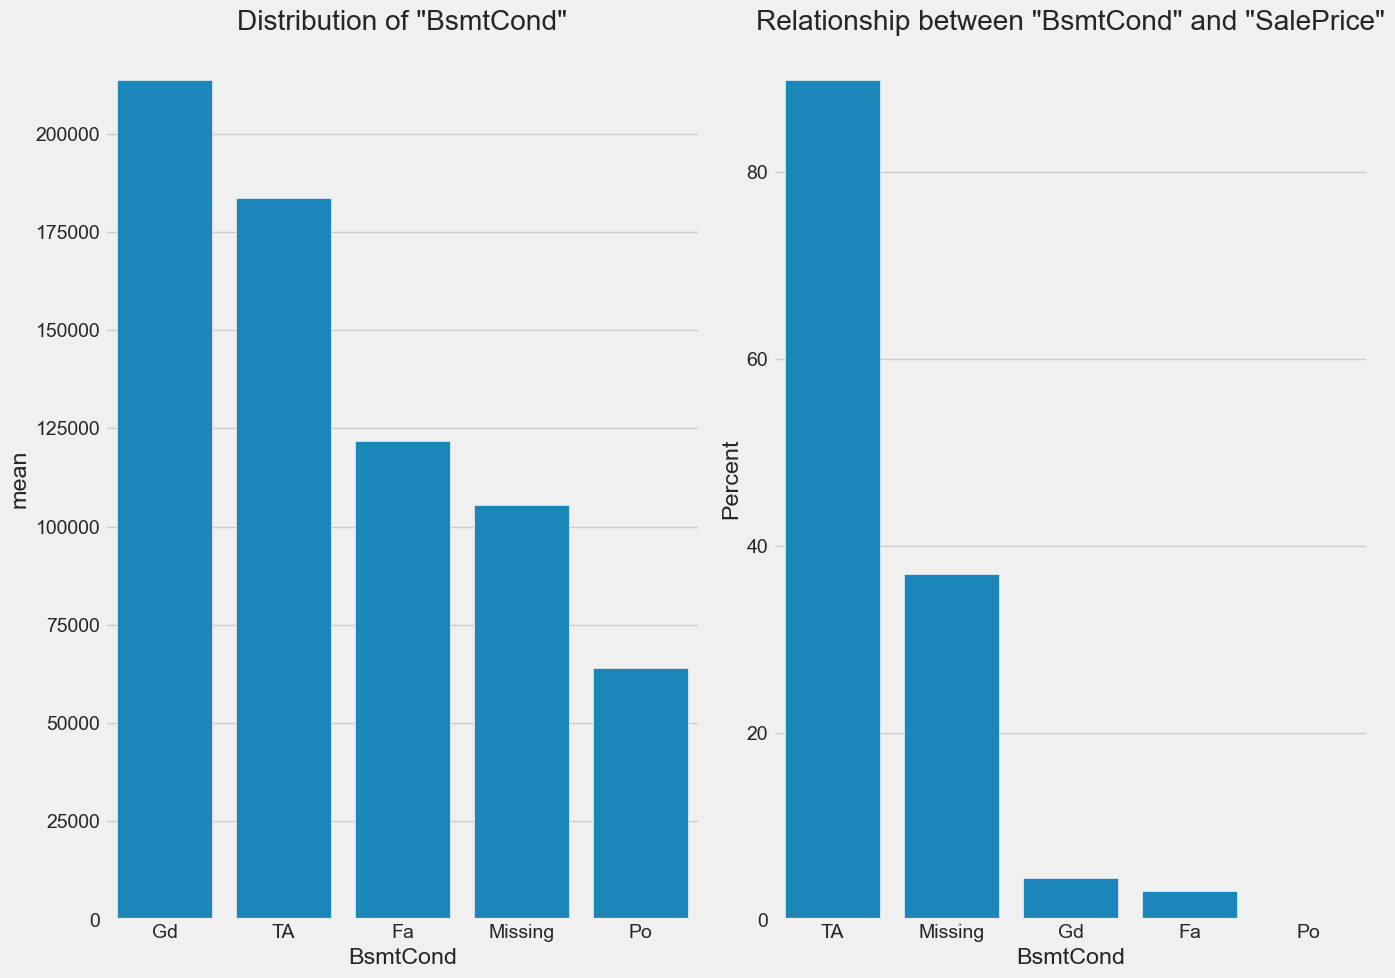

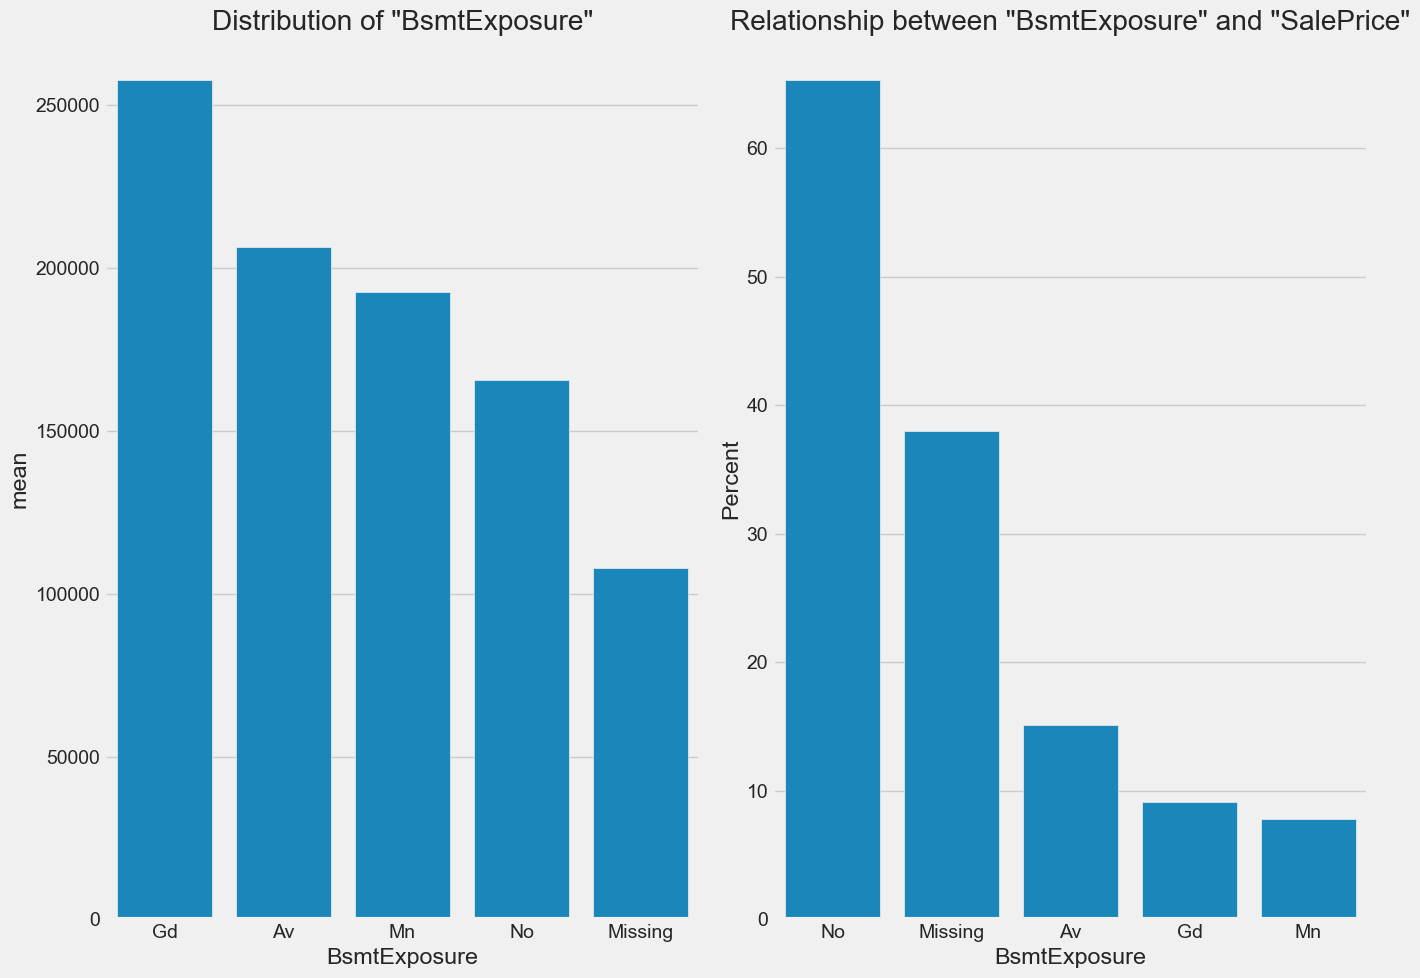

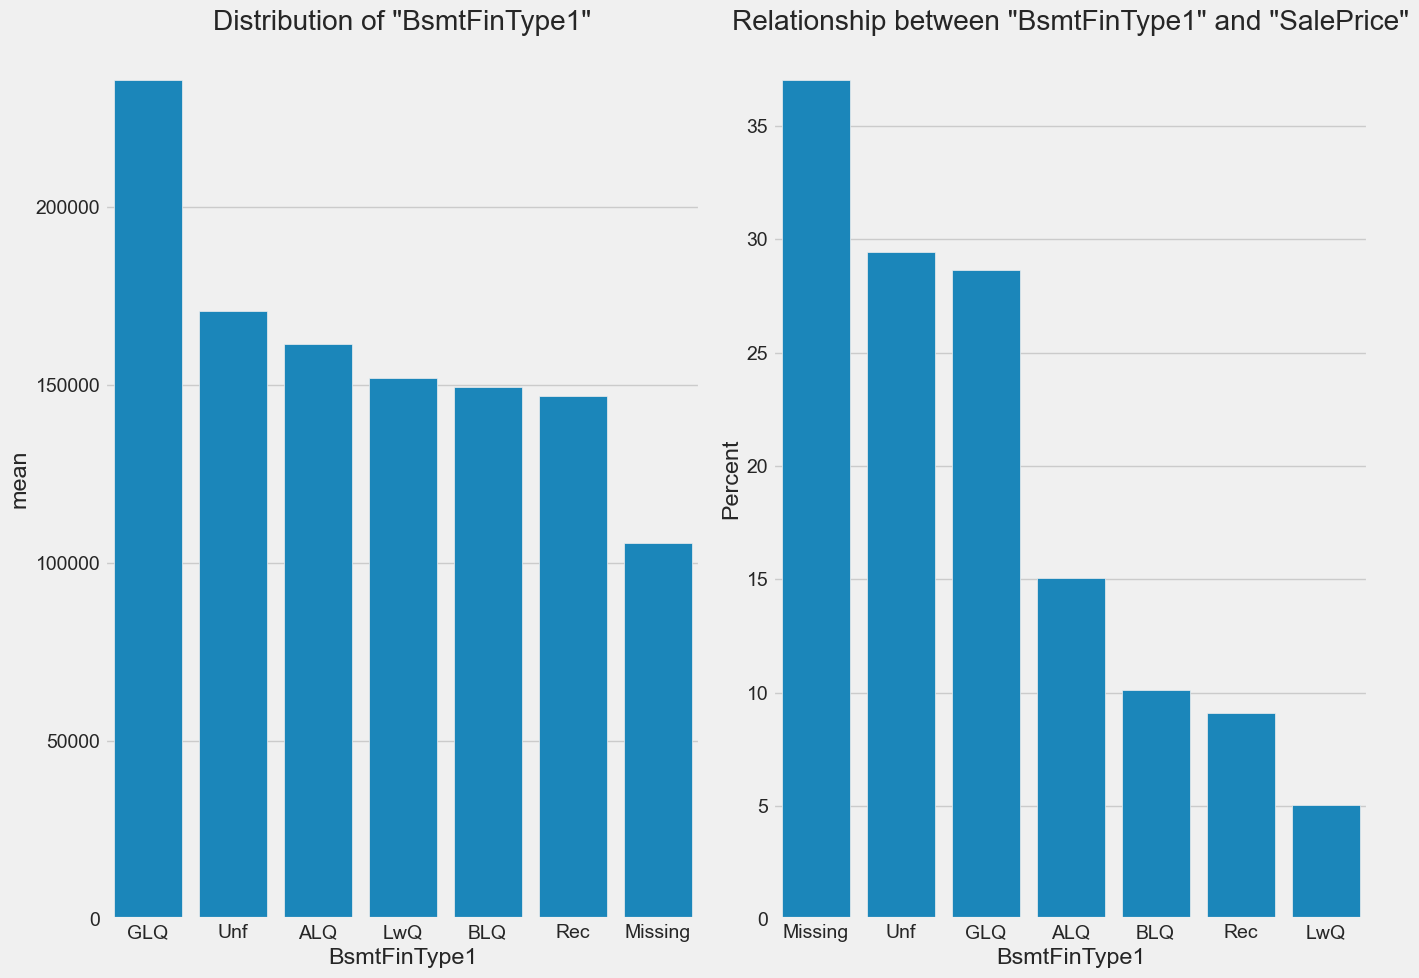

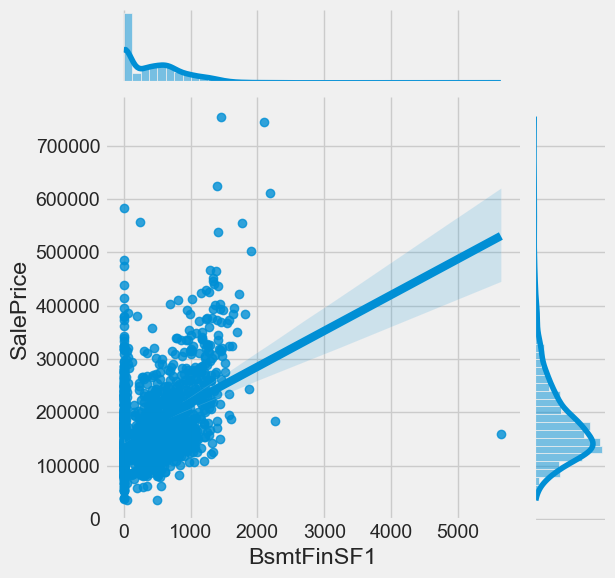

corr:0.3864198062421531


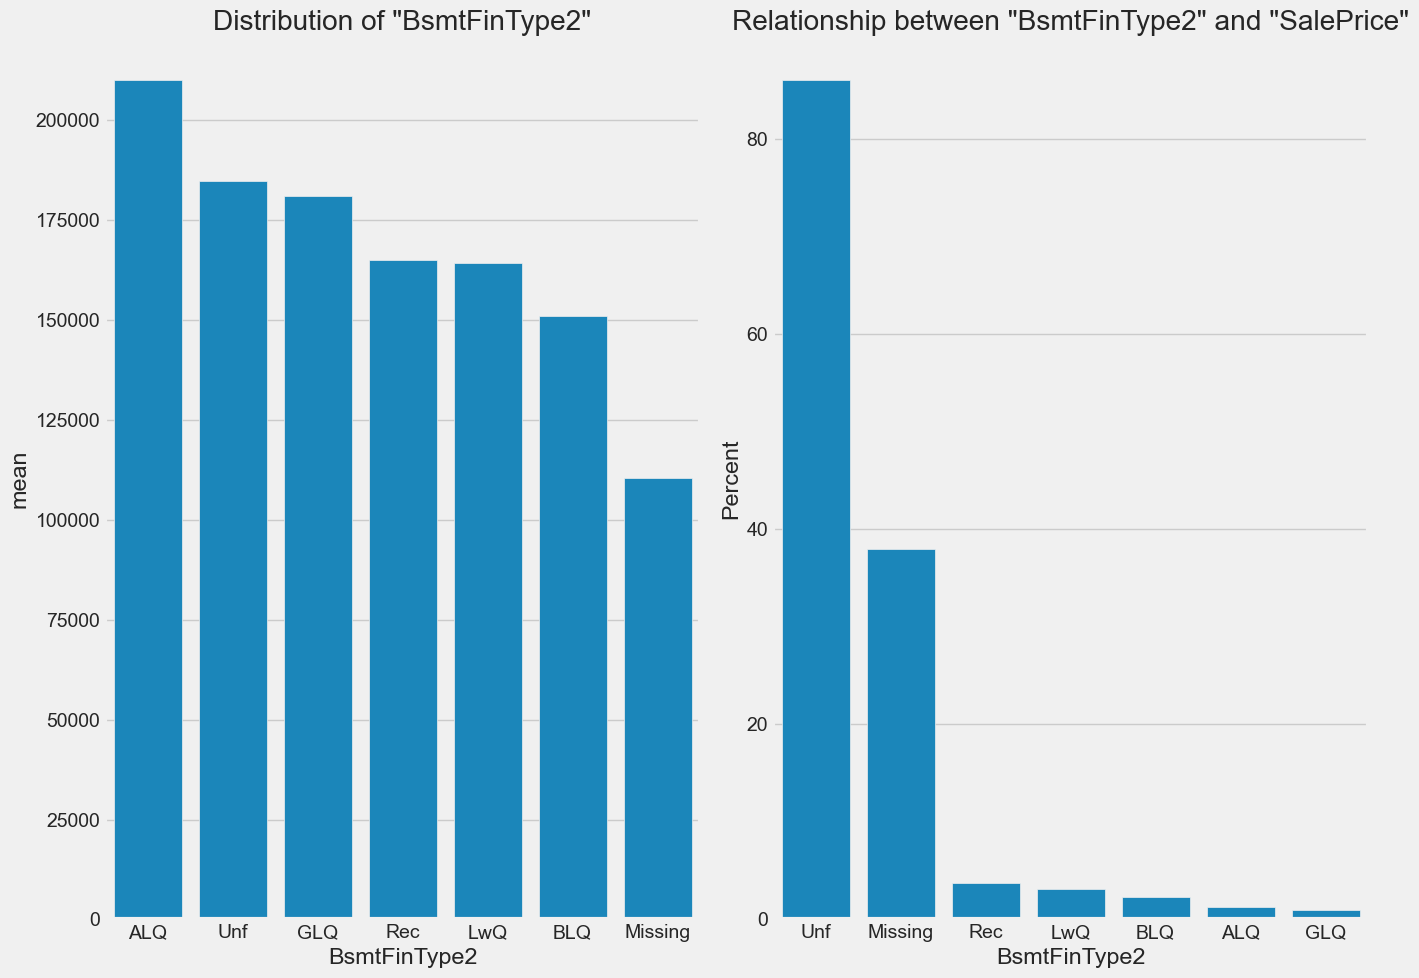

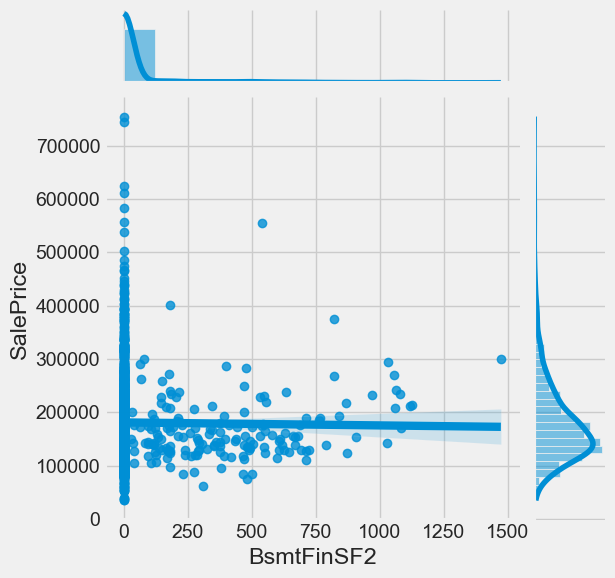

corr:-0.011378121450215134


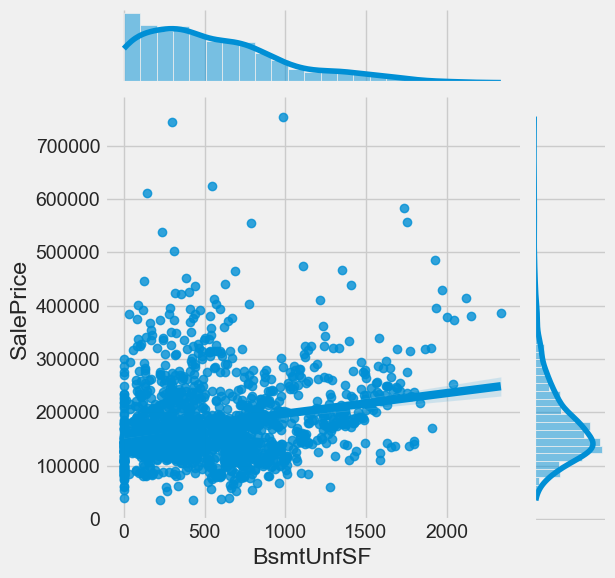

corr:0.2144791055469689


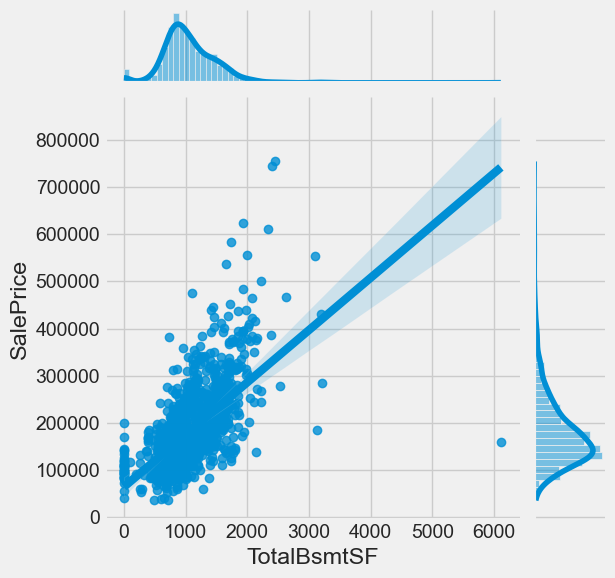

corr:0.6135805515591954


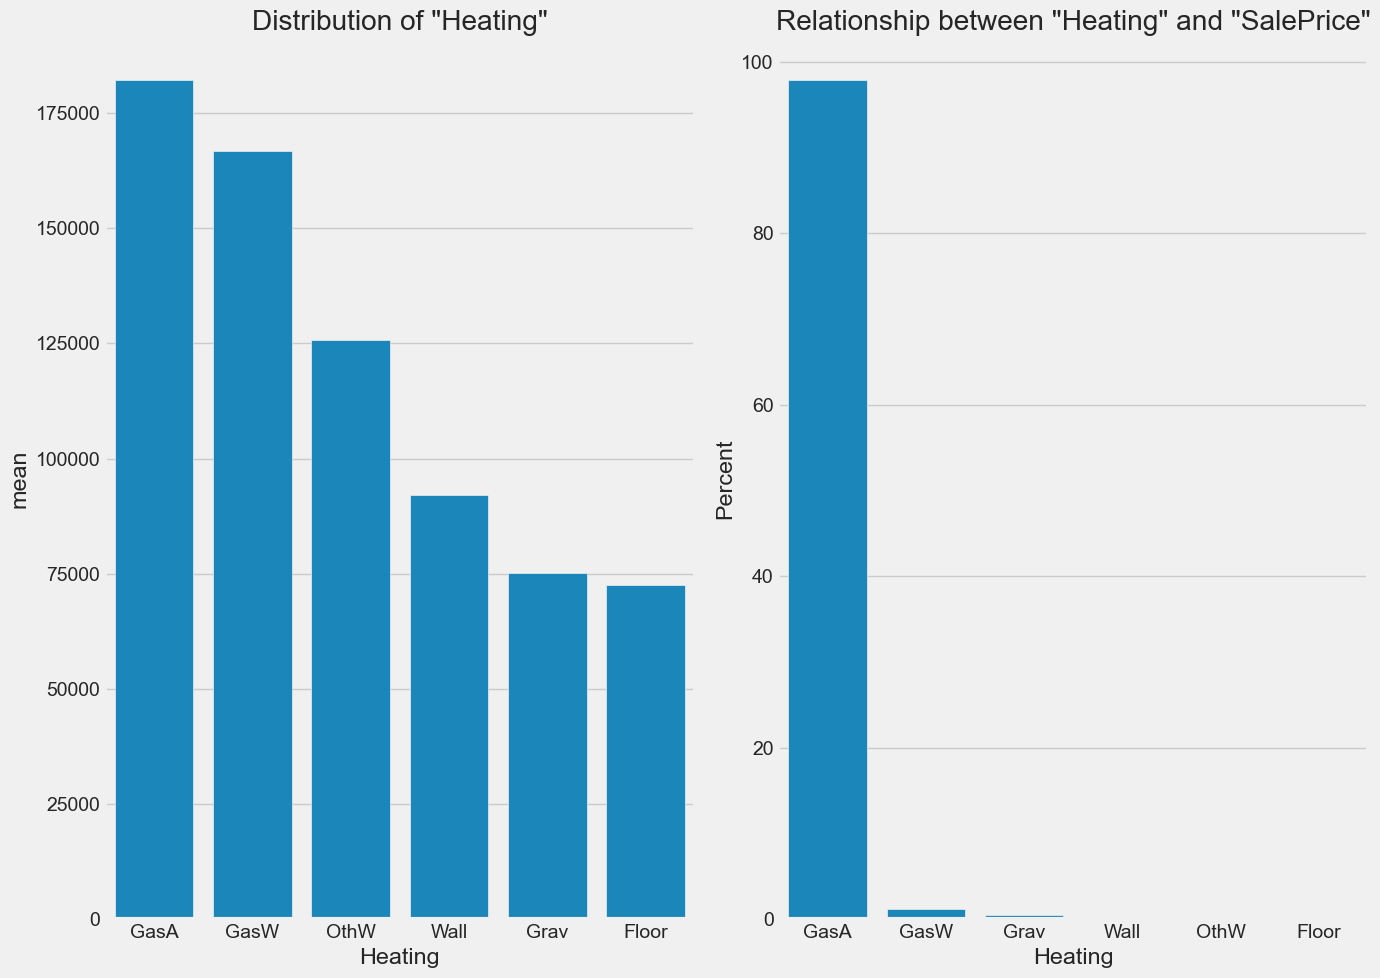

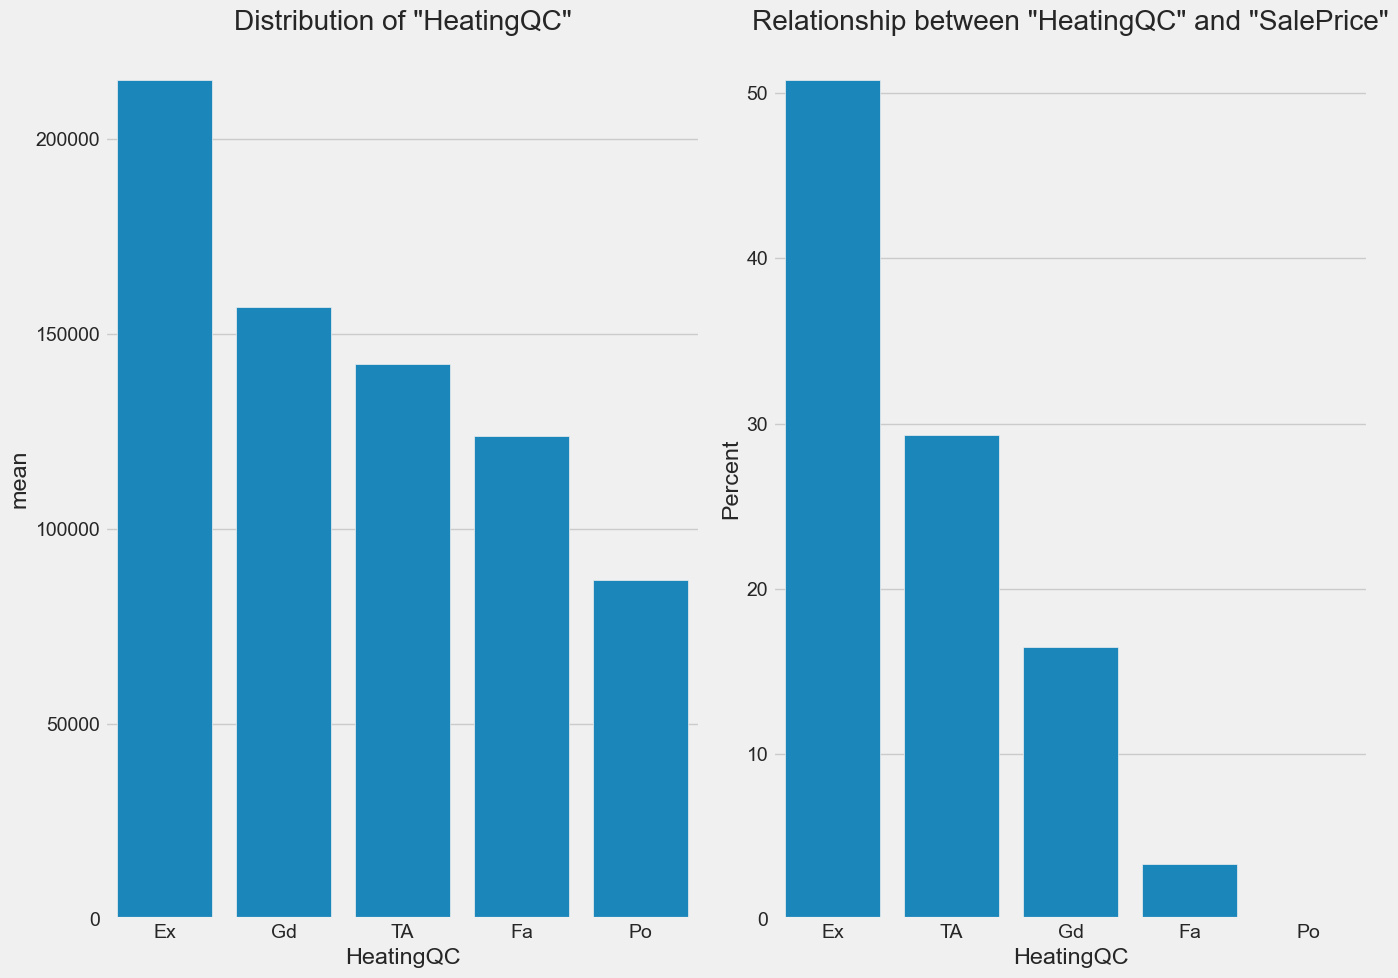

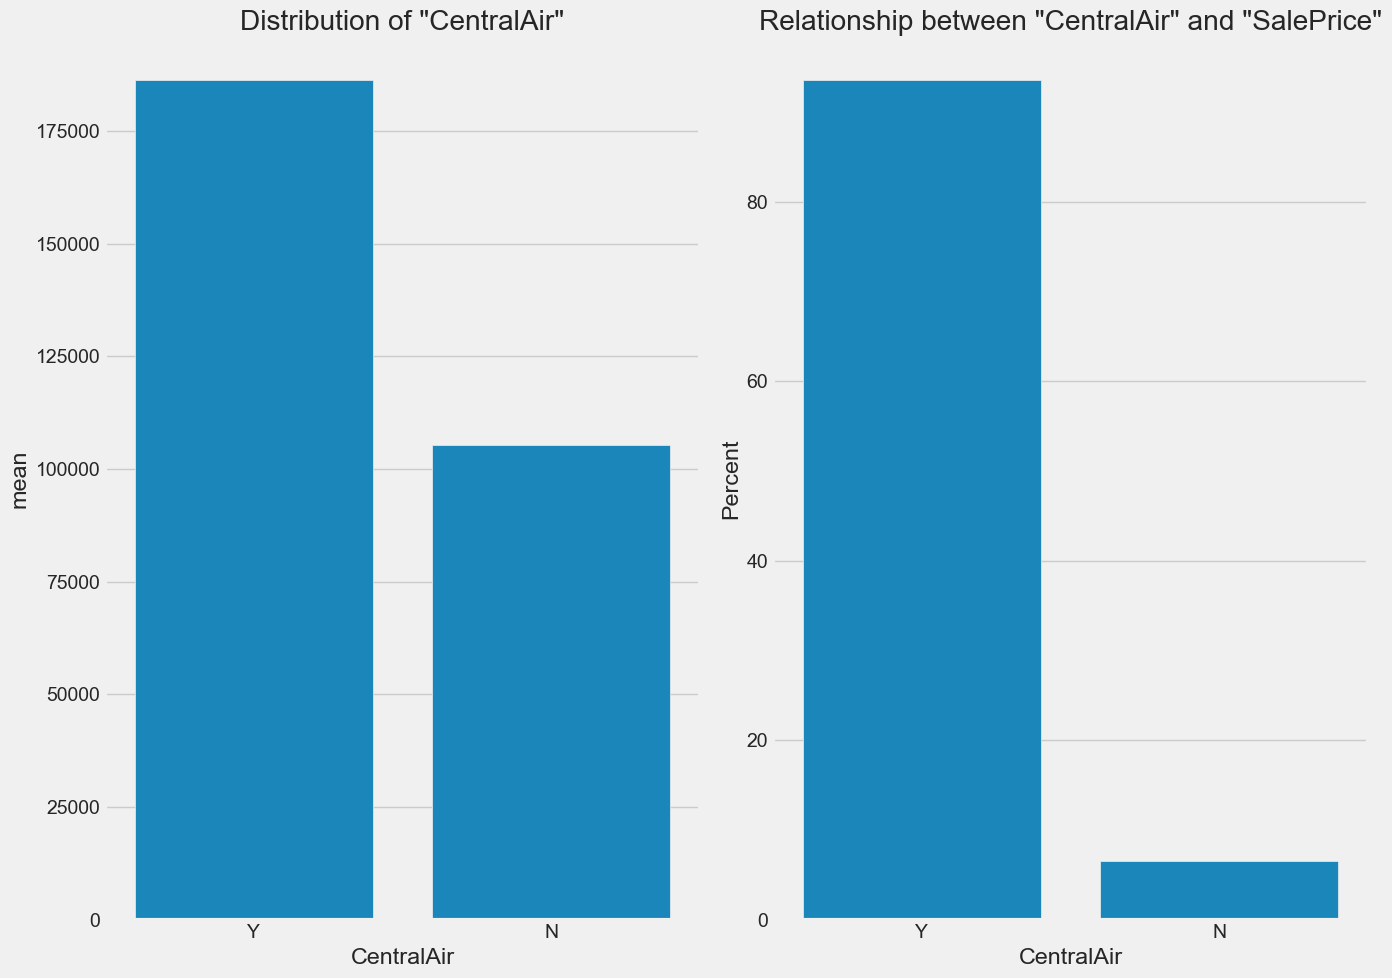

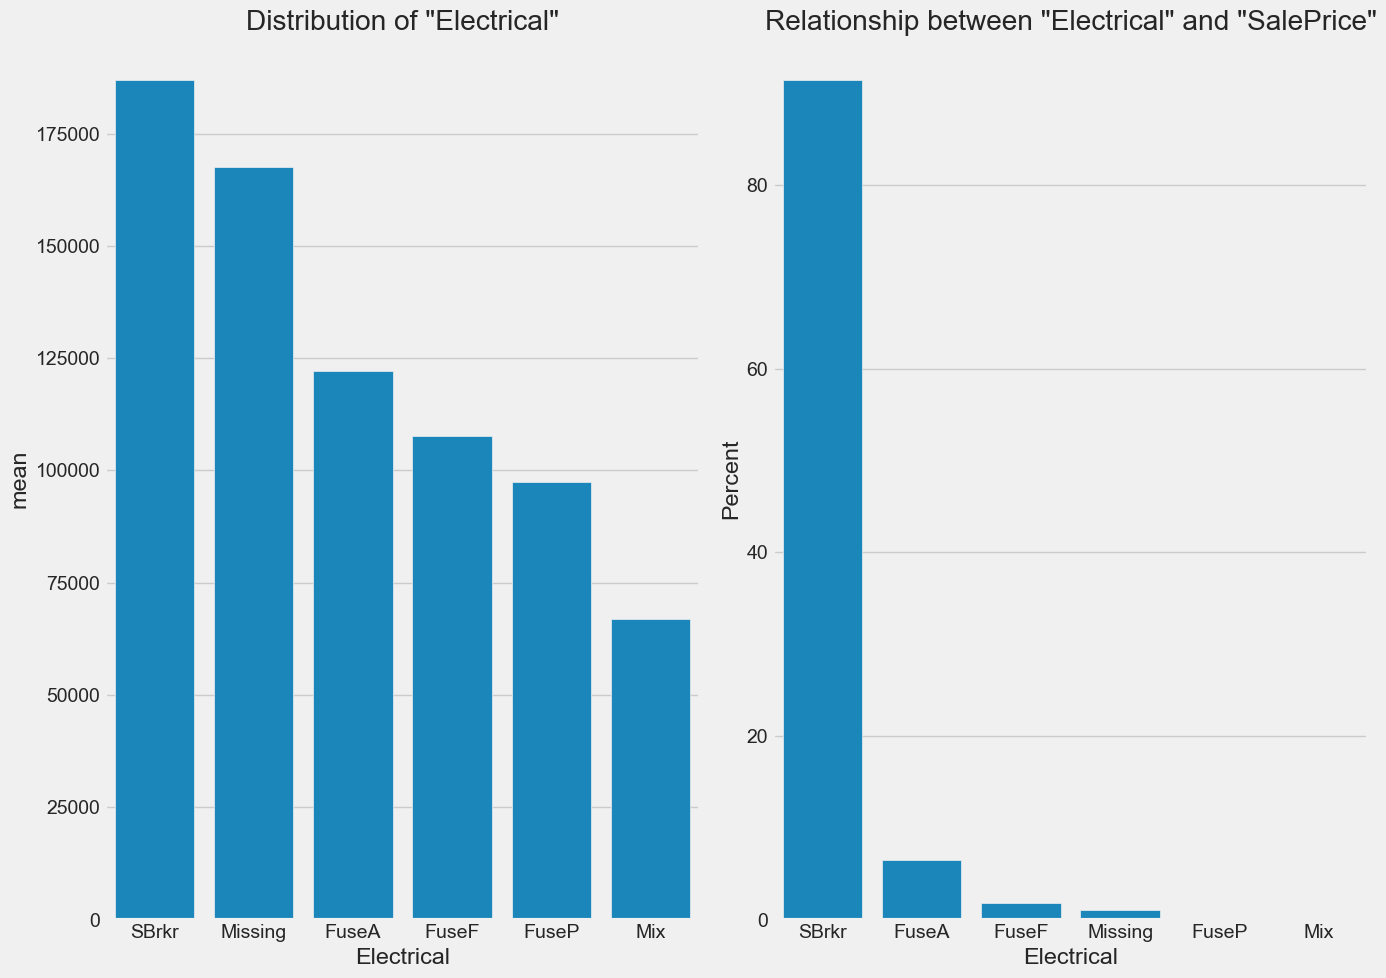

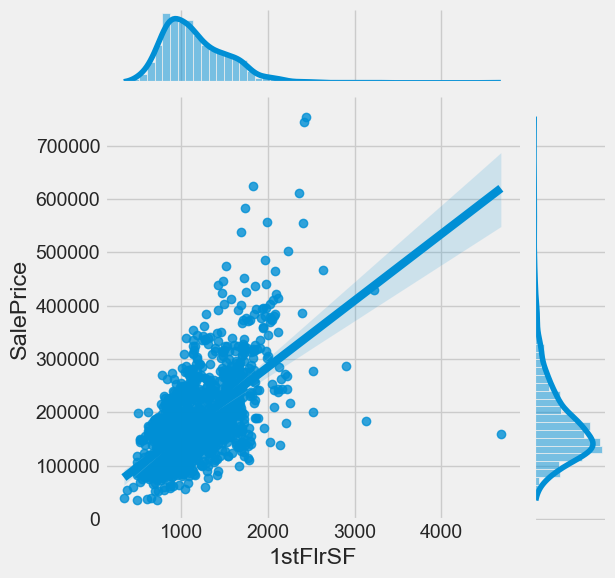

corr:0.6058521846919146


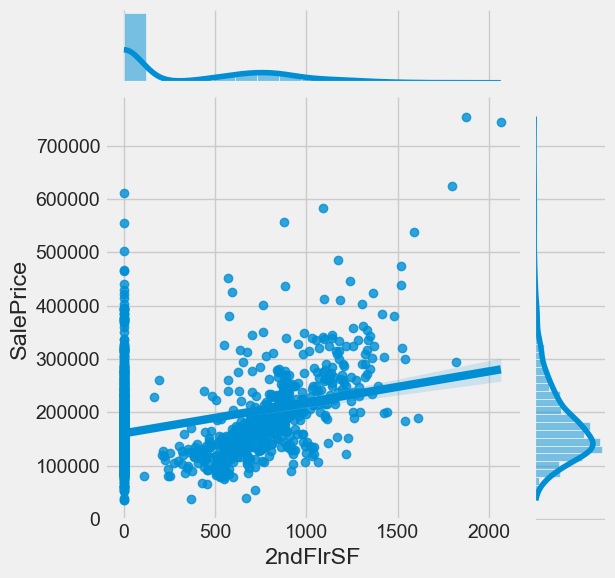

corr:0.31933380283206775


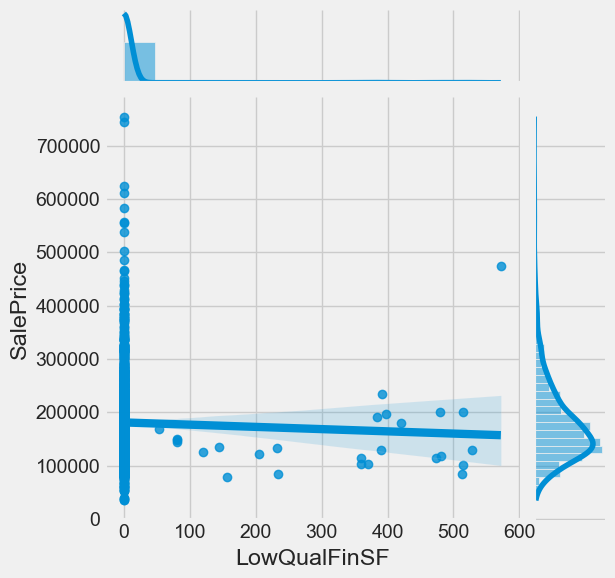

corr:-0.02560613000067954


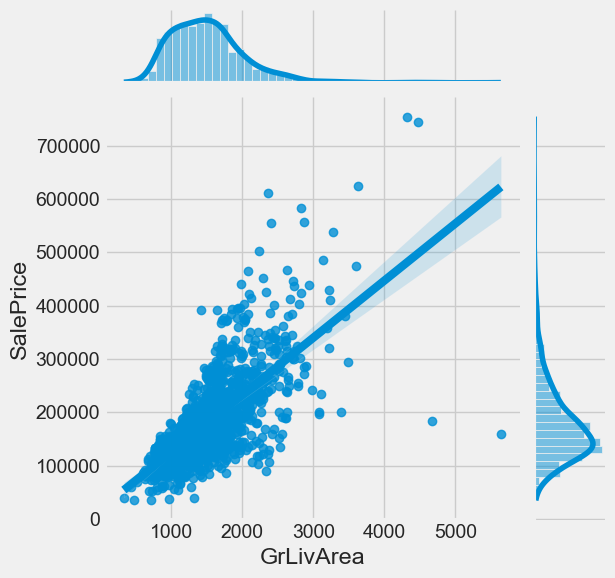

corr:0.7086244776126521


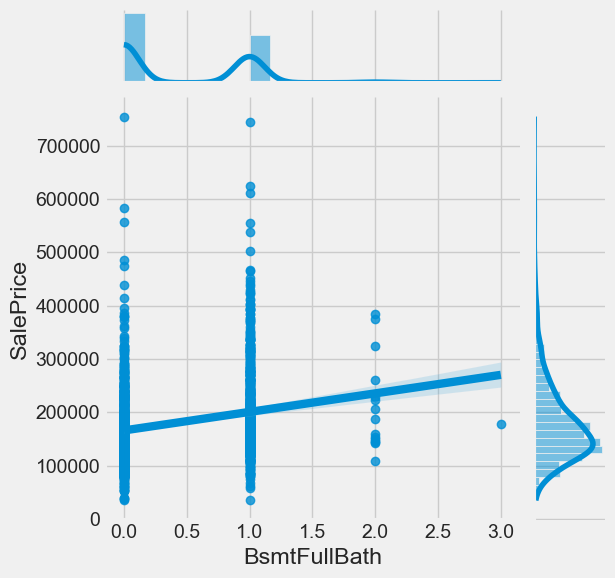

corr:0.22712223313149424


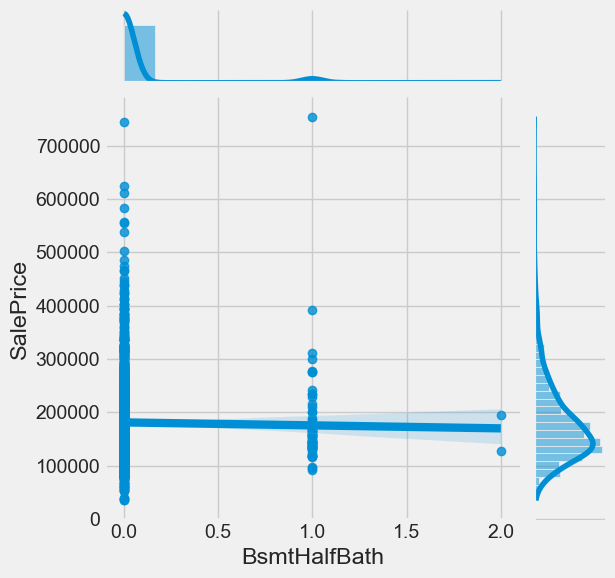

corr:-0.01684415429735901


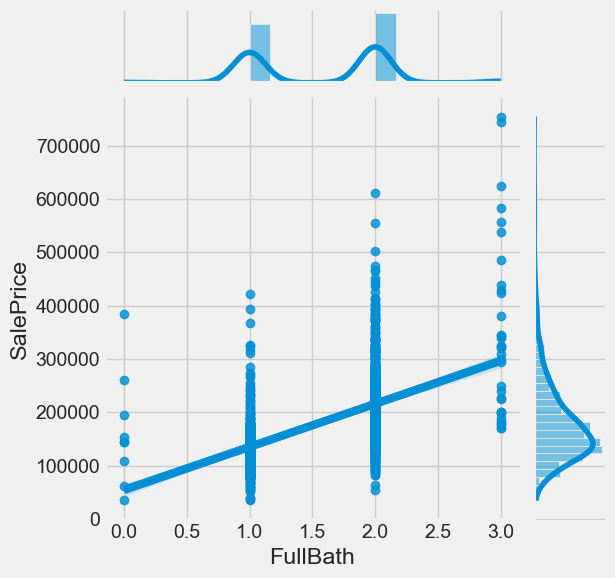

corr:0.5606637627484461


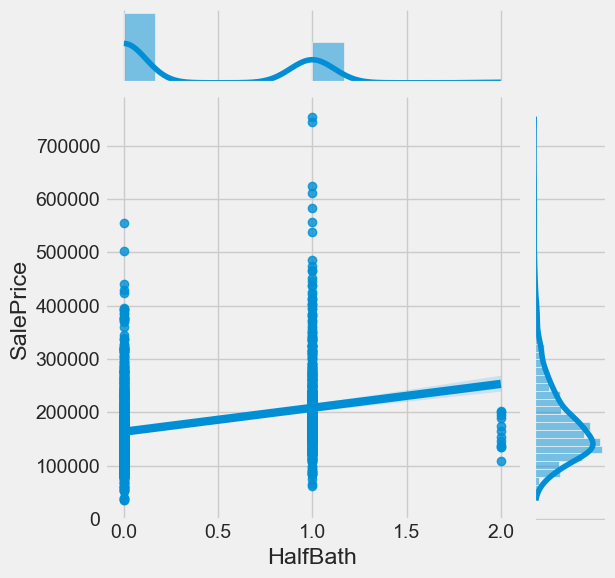

corr:0.2841076755947824


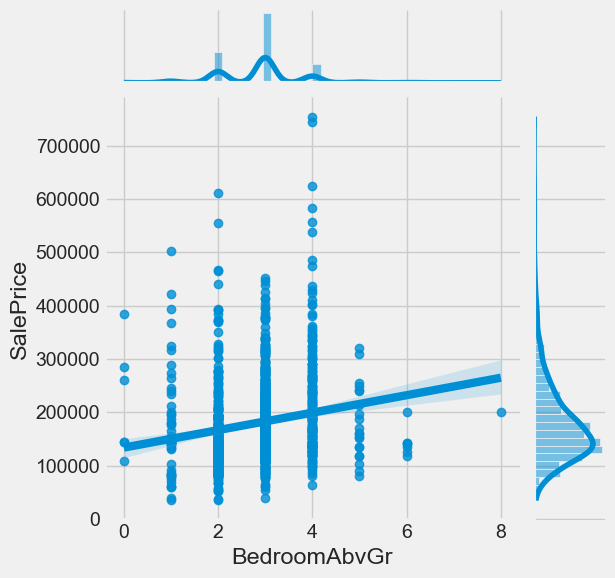

corr:0.16821315430073996


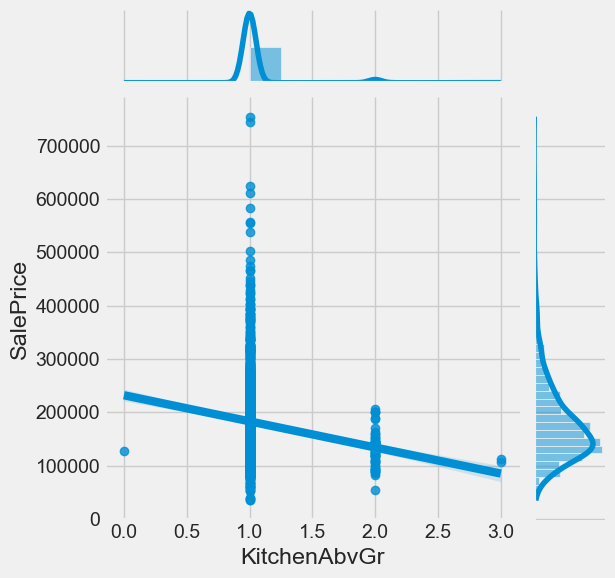

corr:-0.13590737084214116


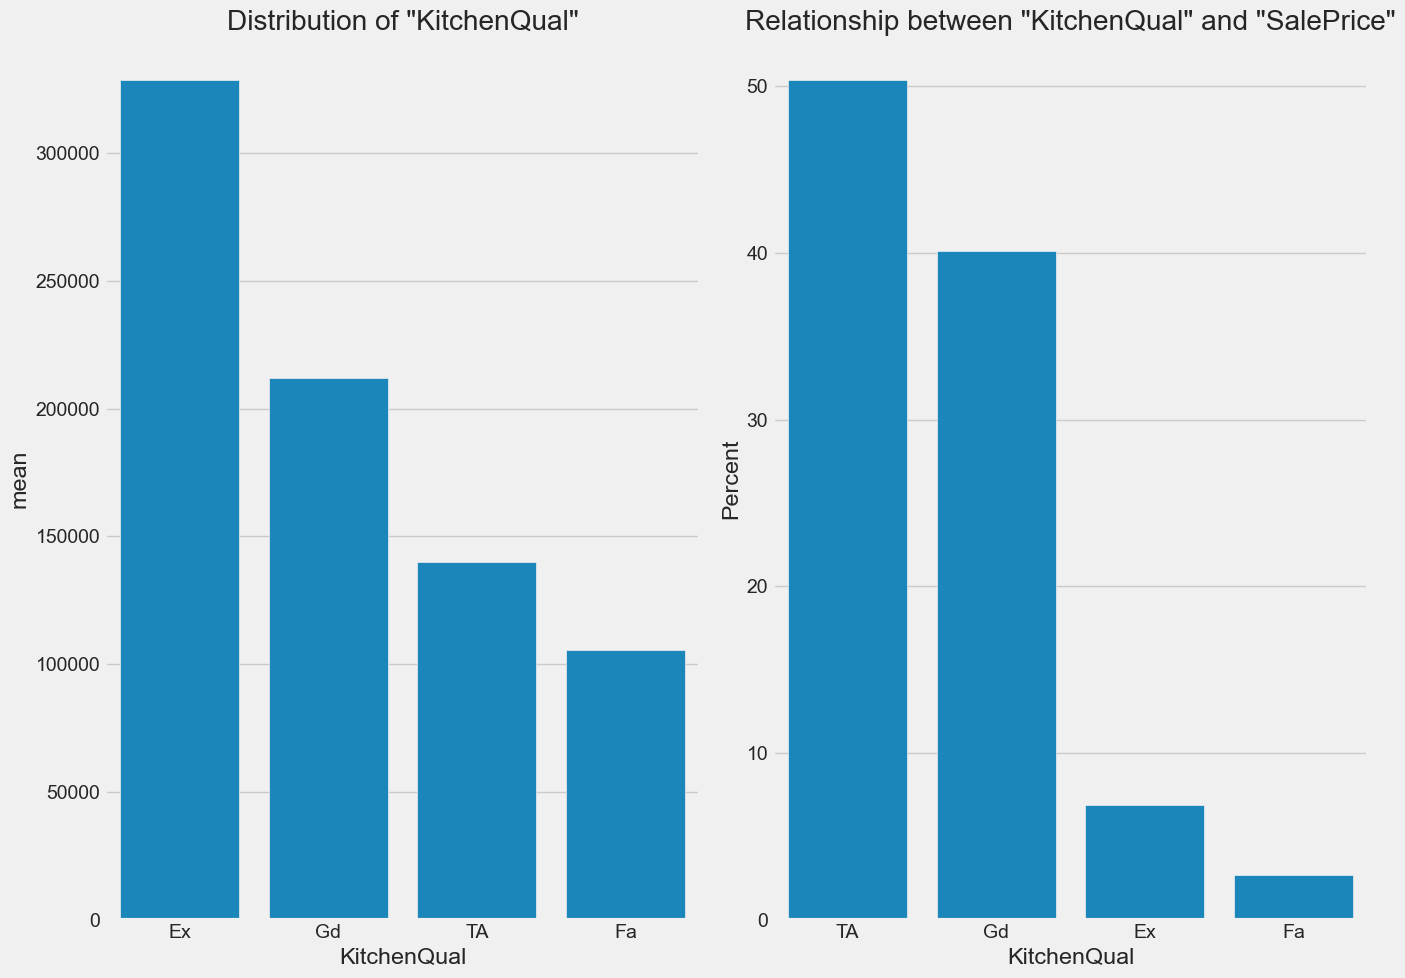

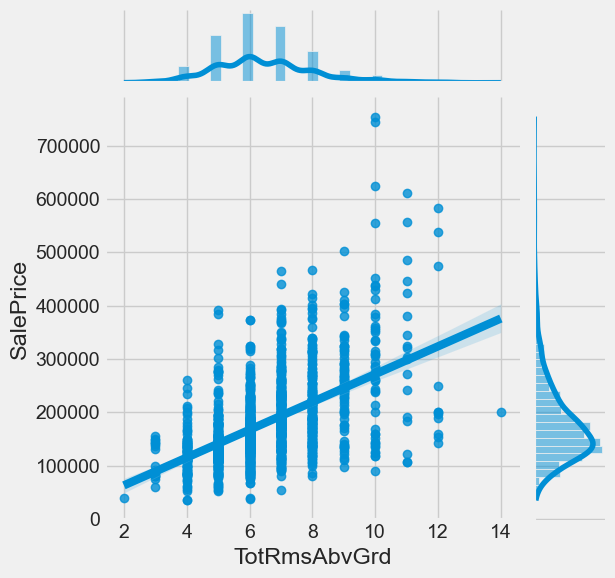

corr:0.5337231555820281


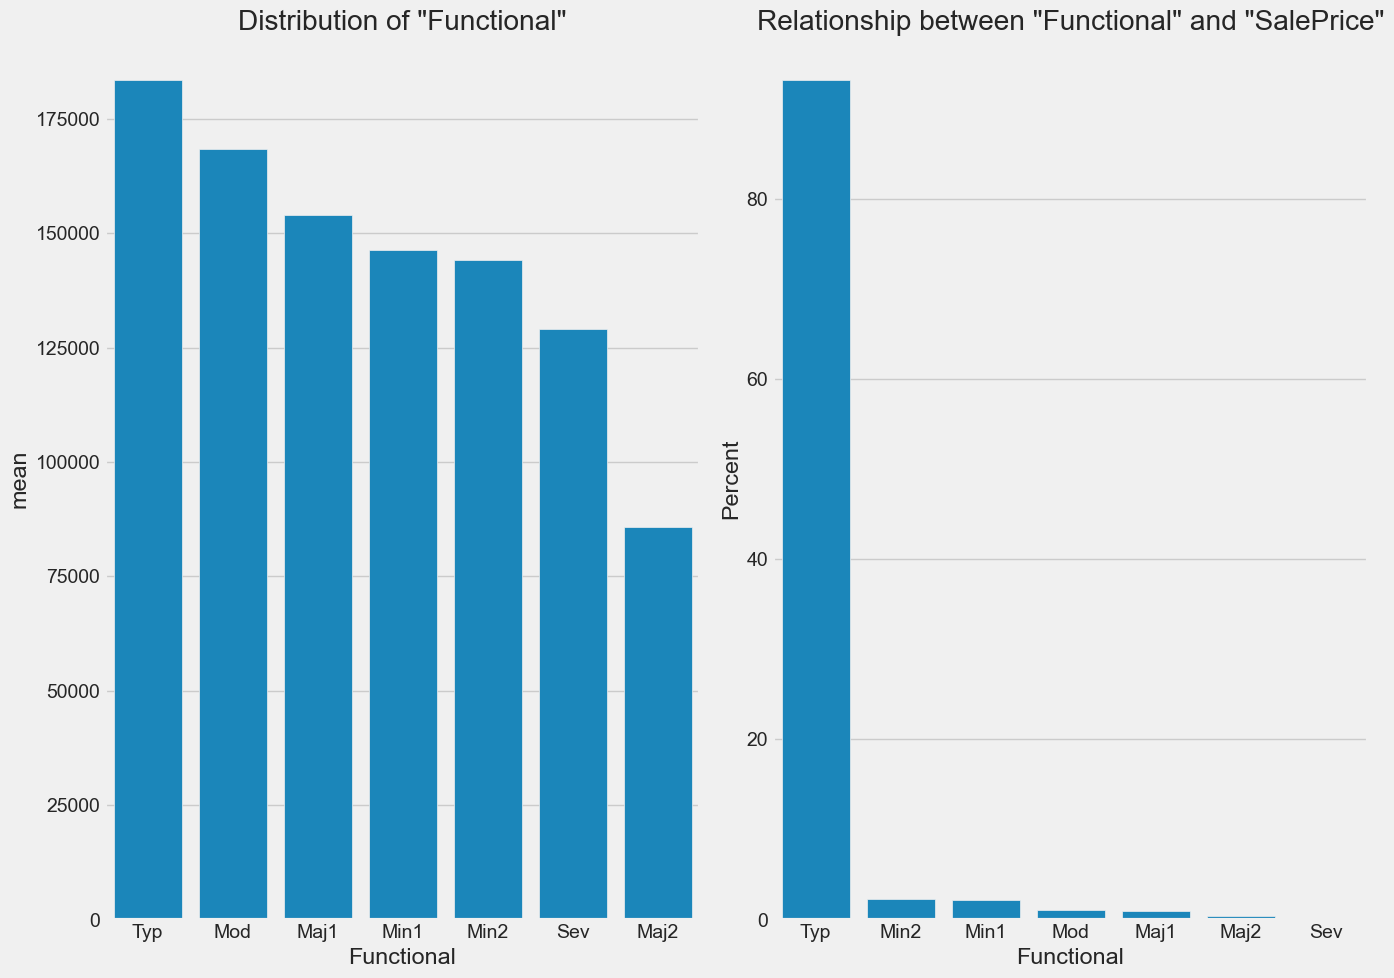

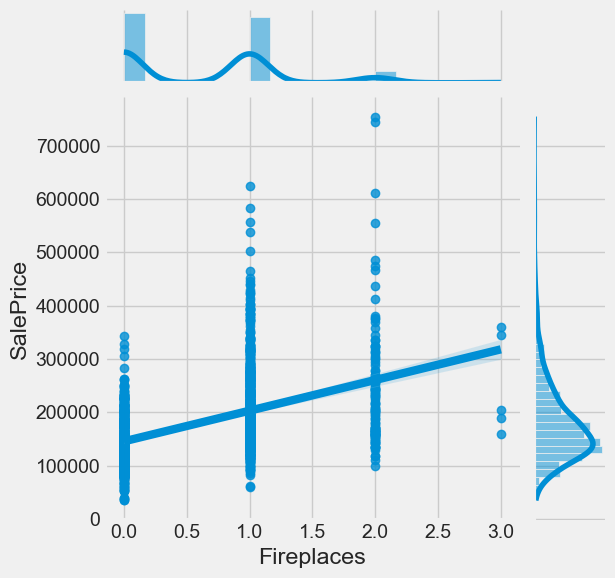

corr:0.4669288367515277


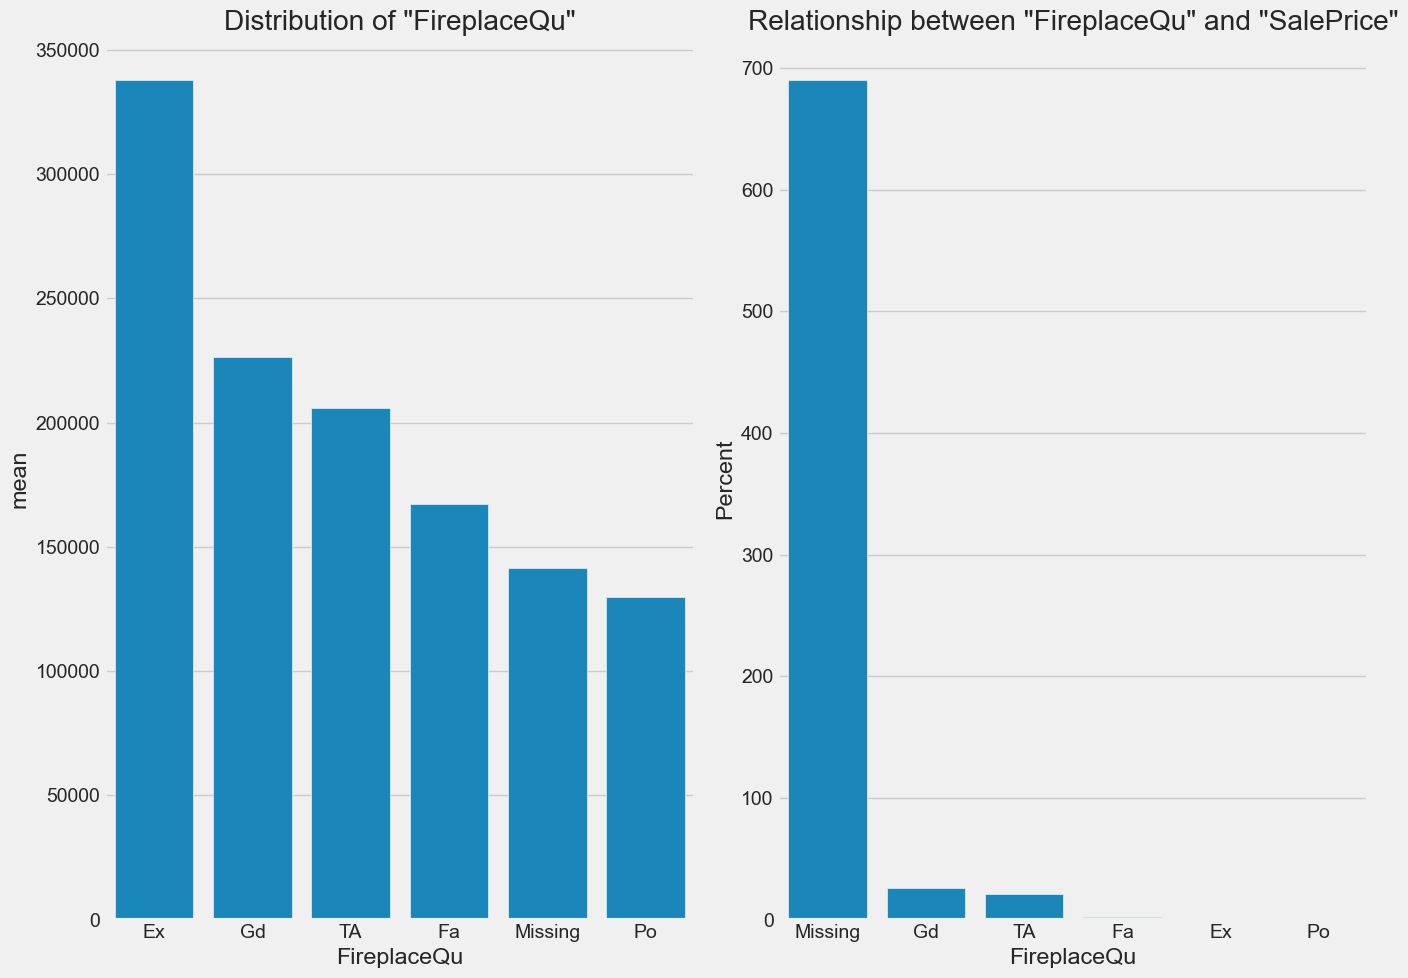

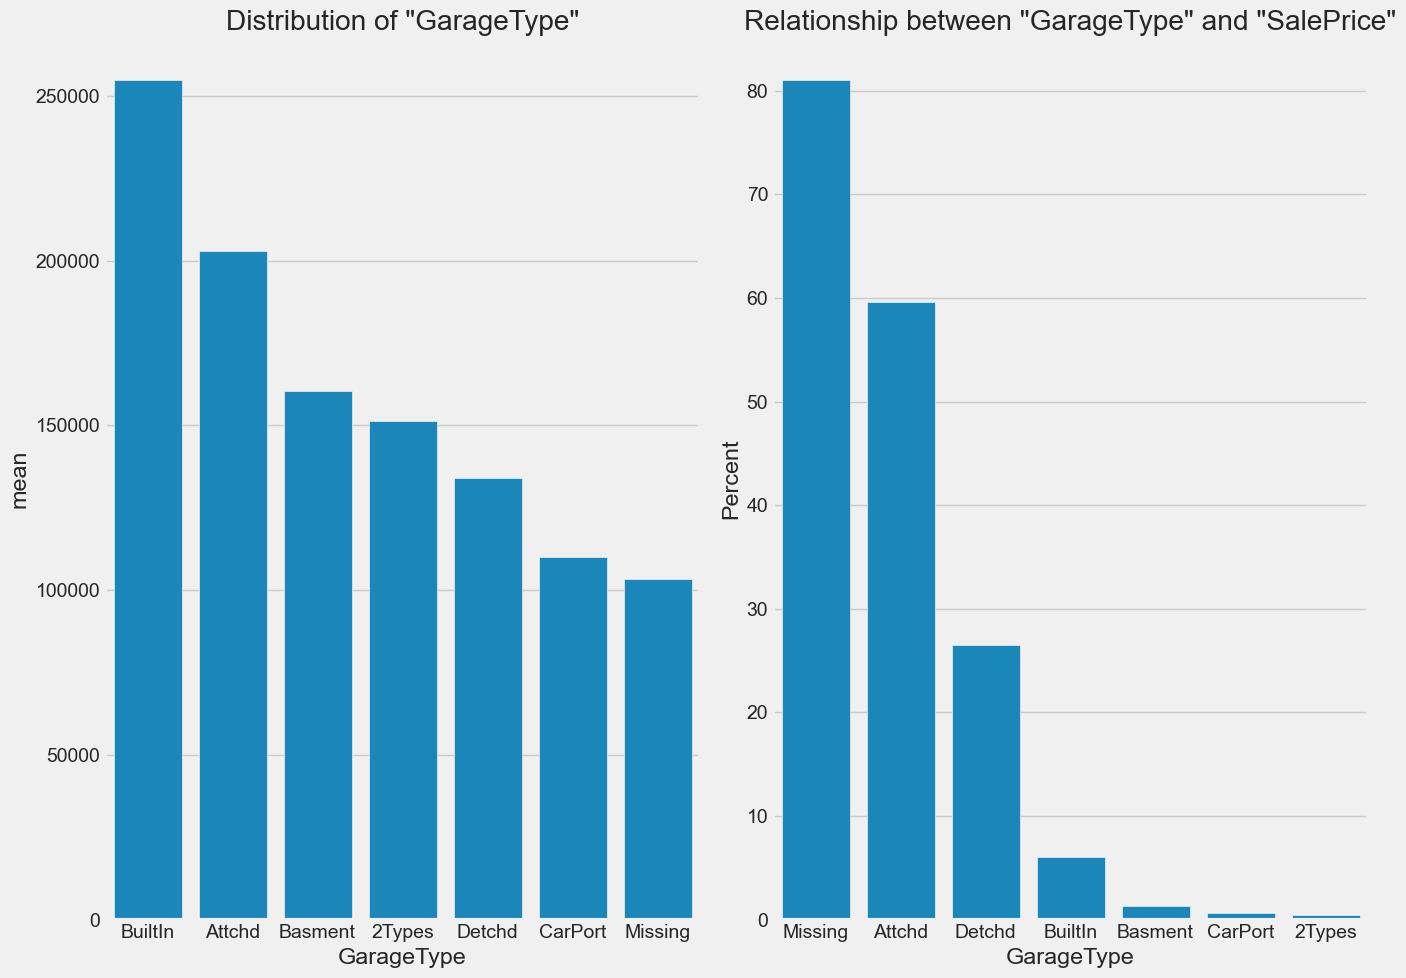

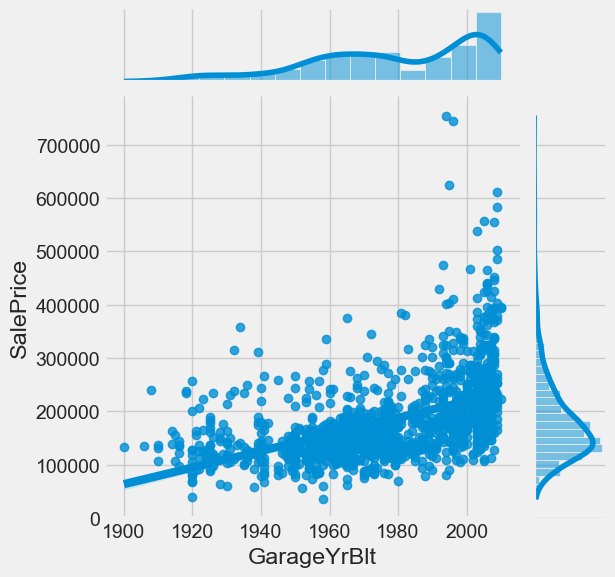

corr:0.48636167748786097


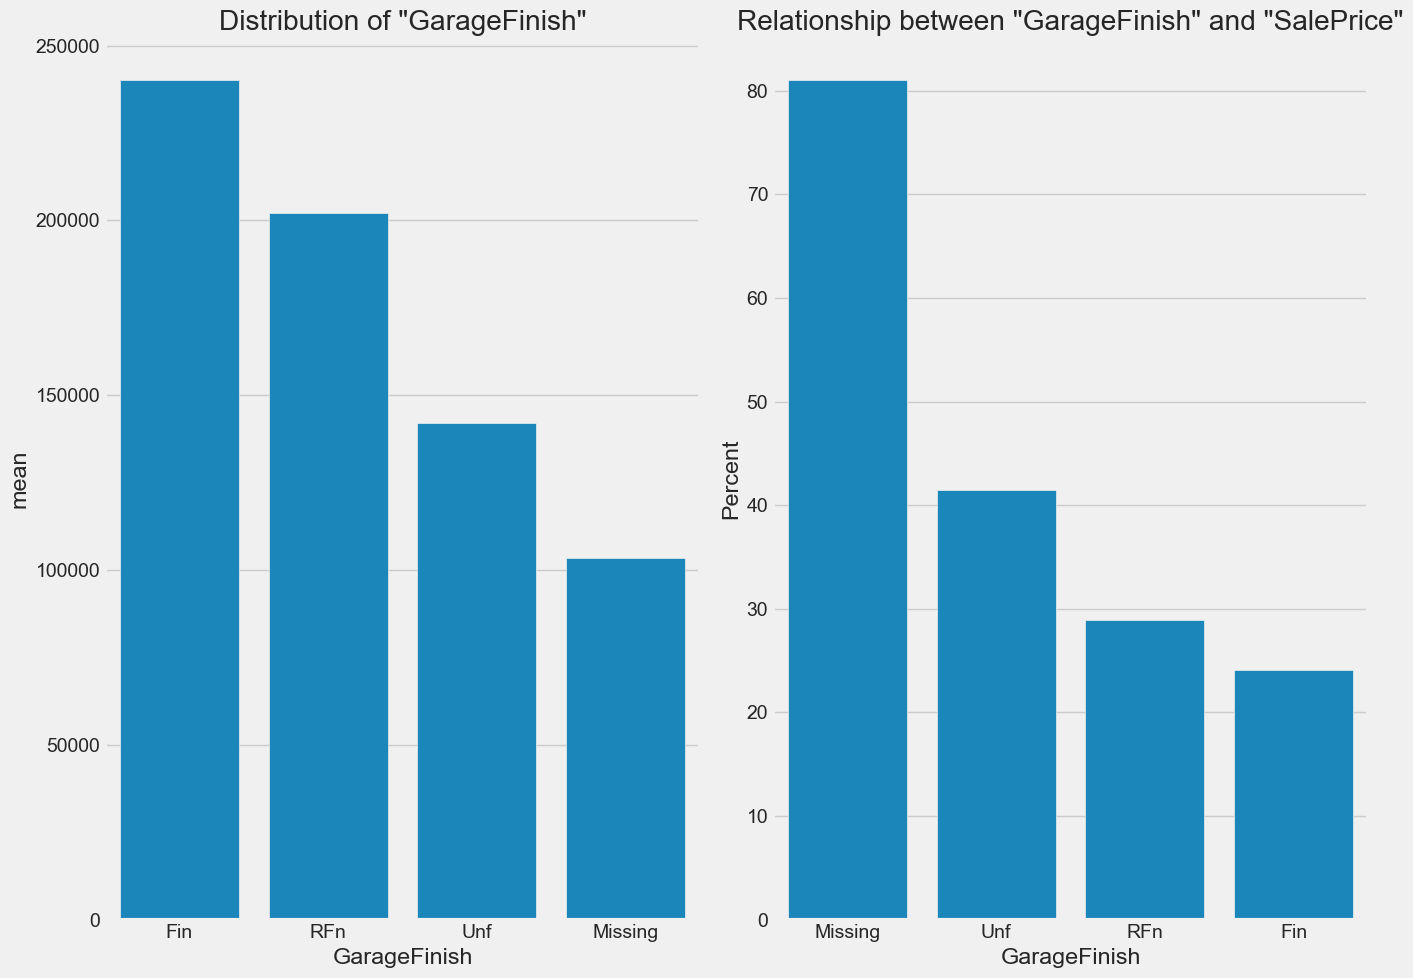

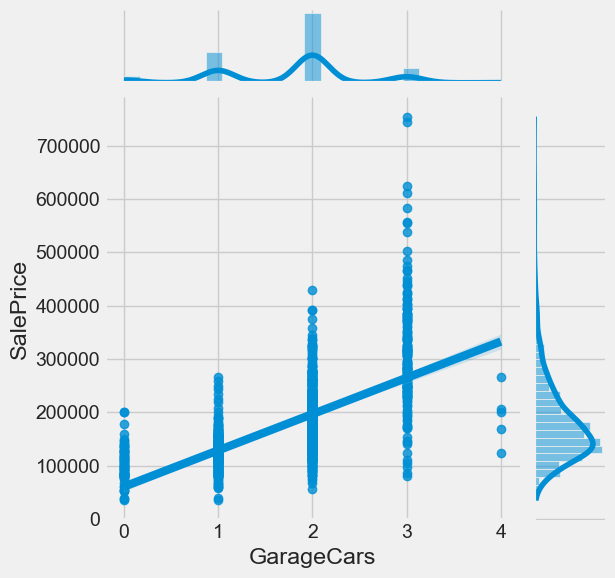

corr:0.6404091972583521


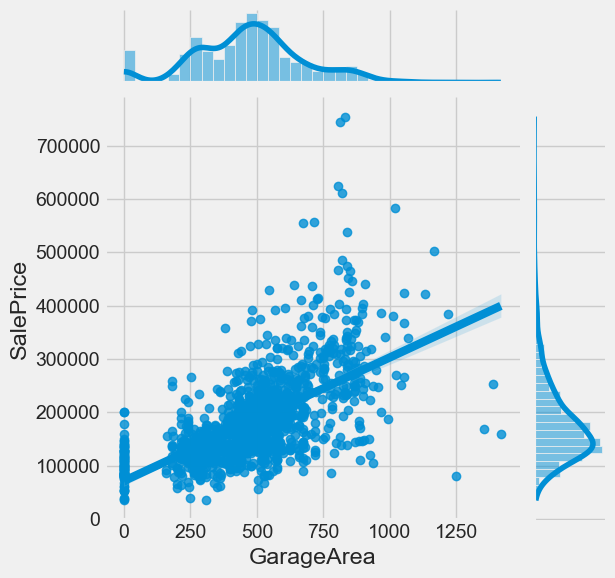

corr:0.6234314389183615


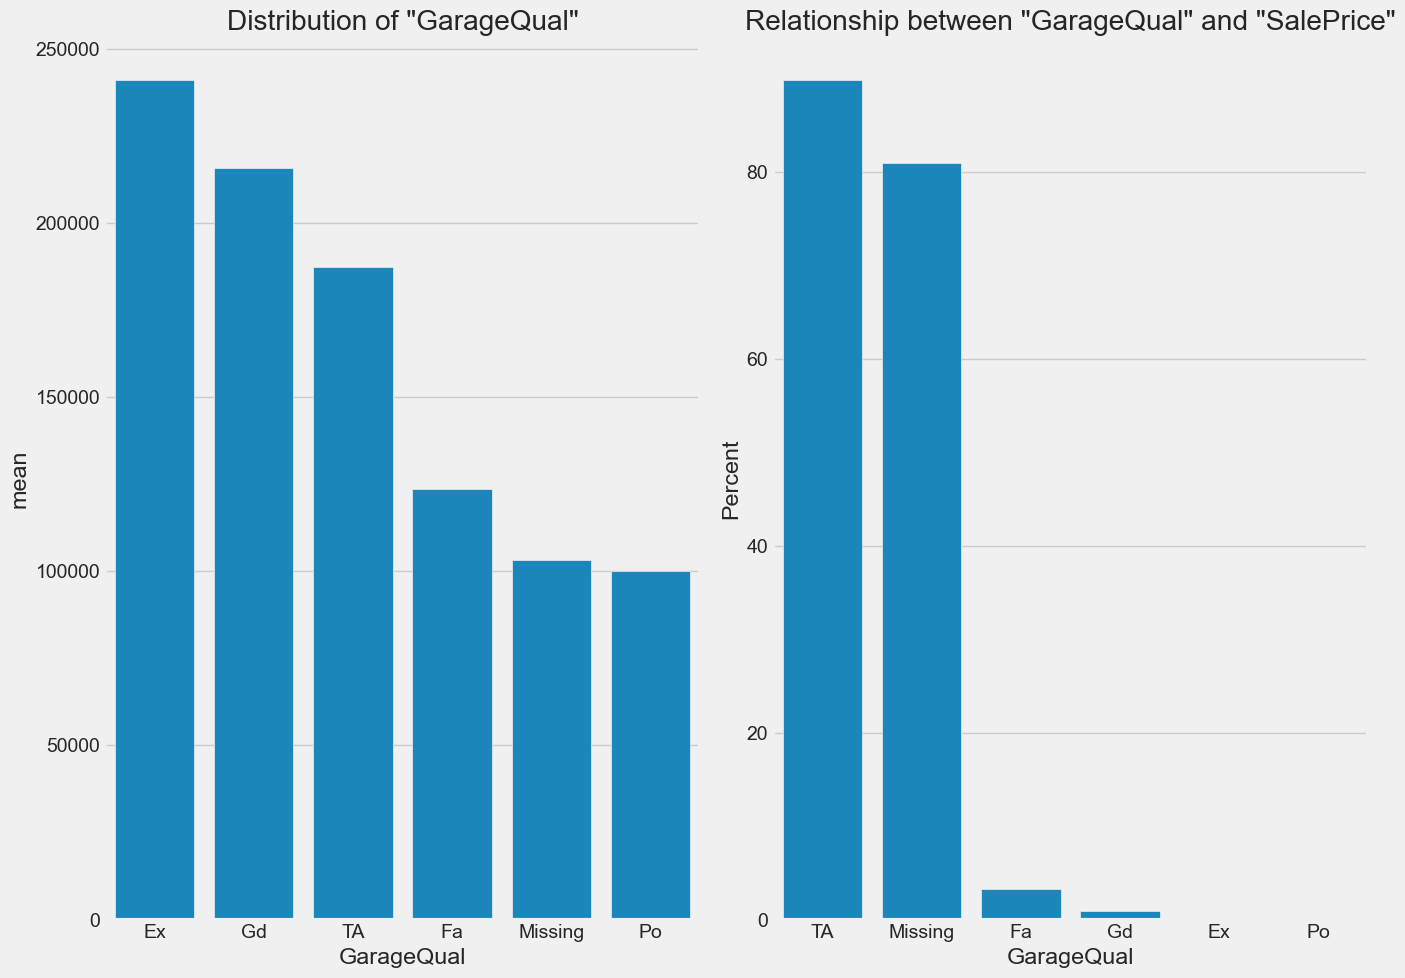

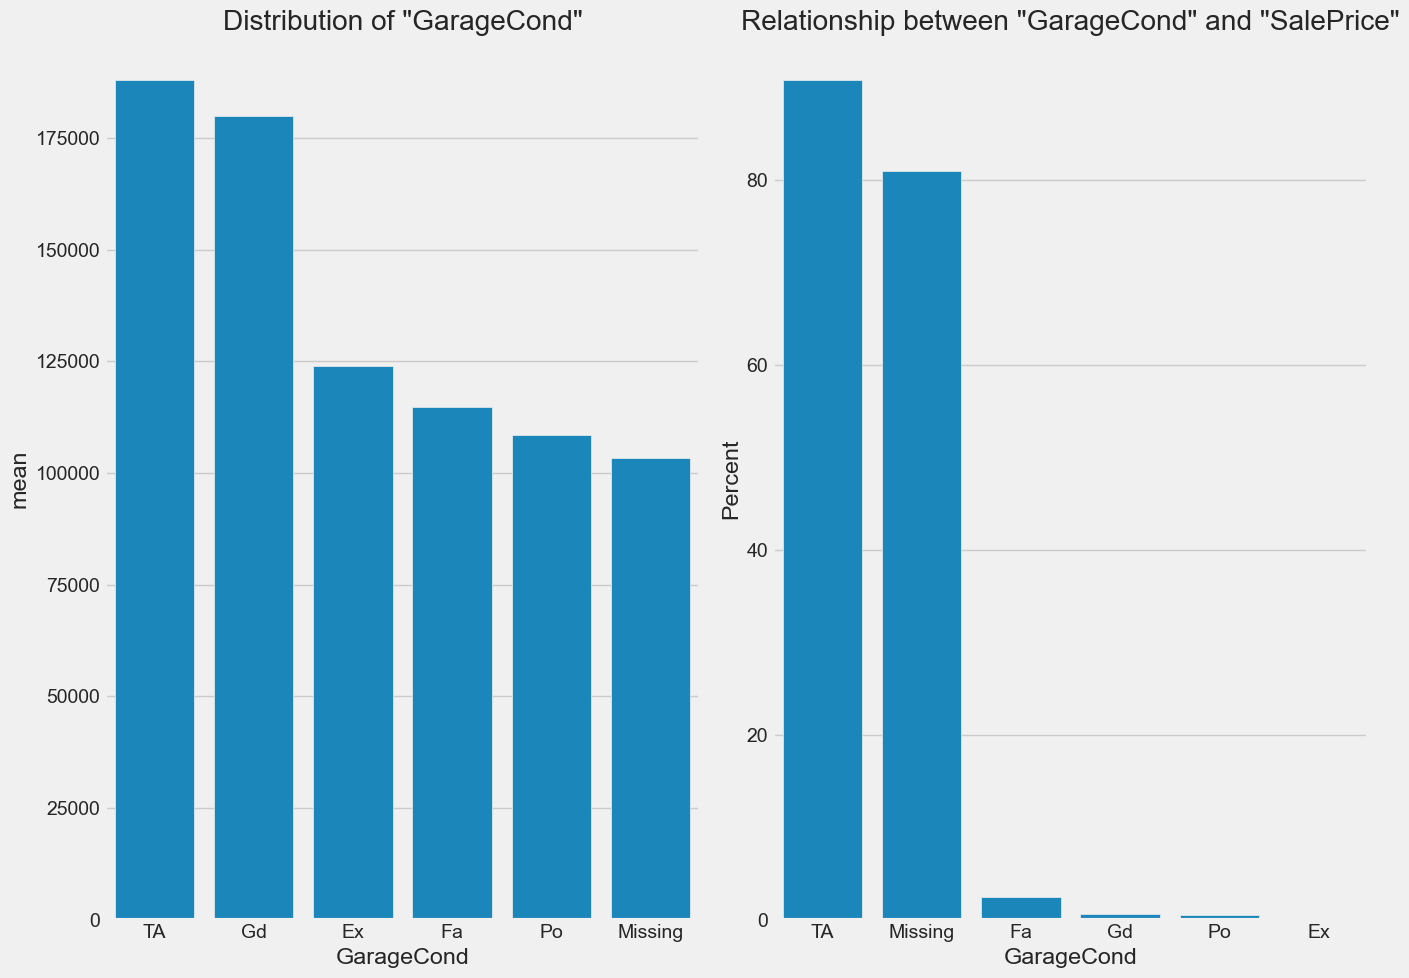

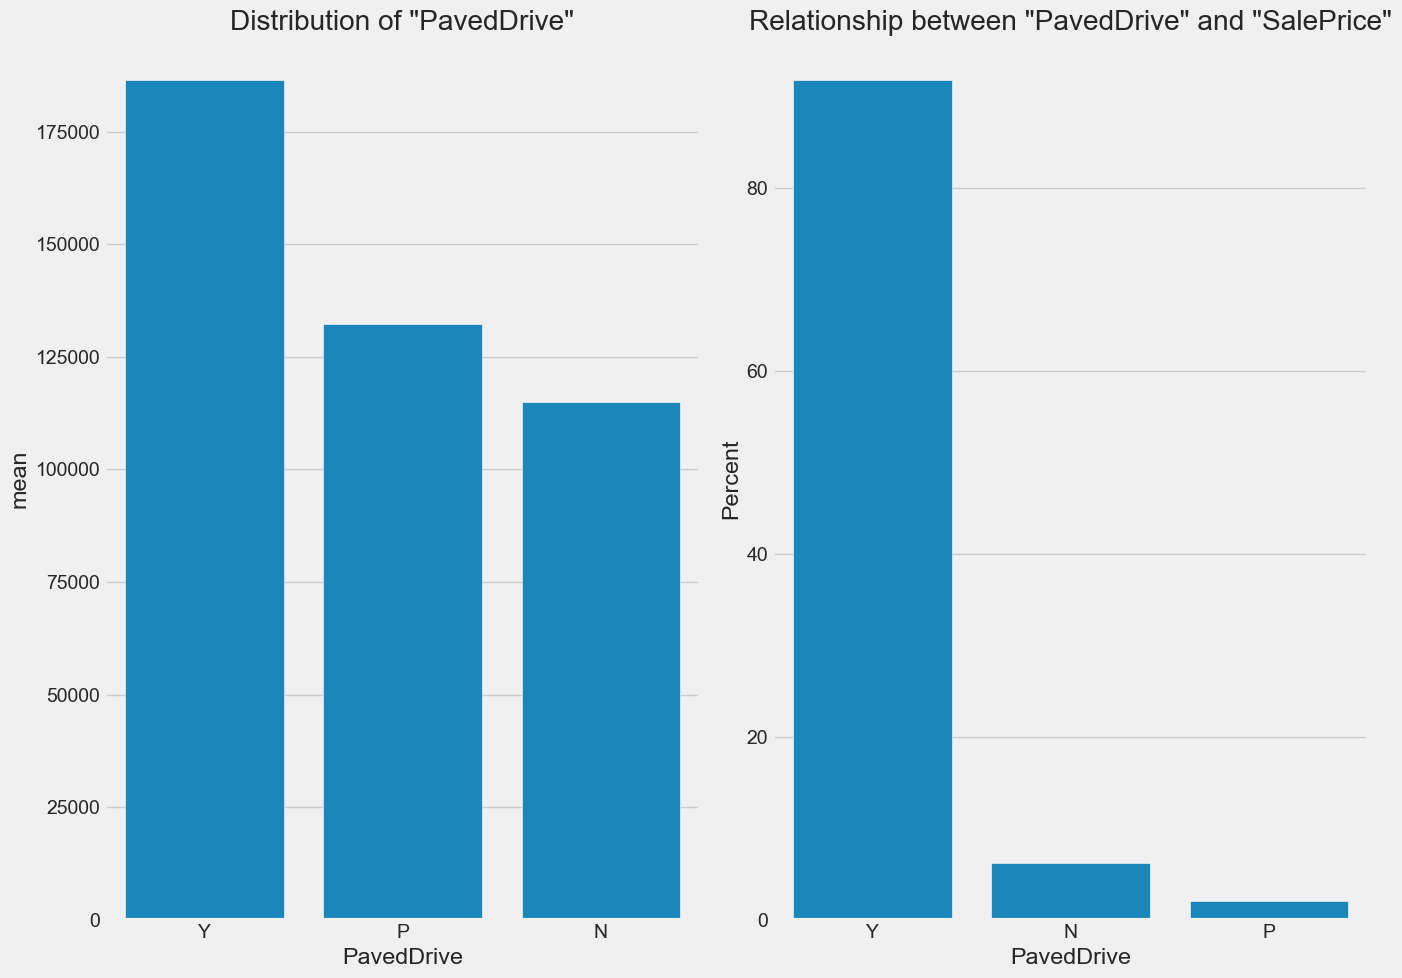

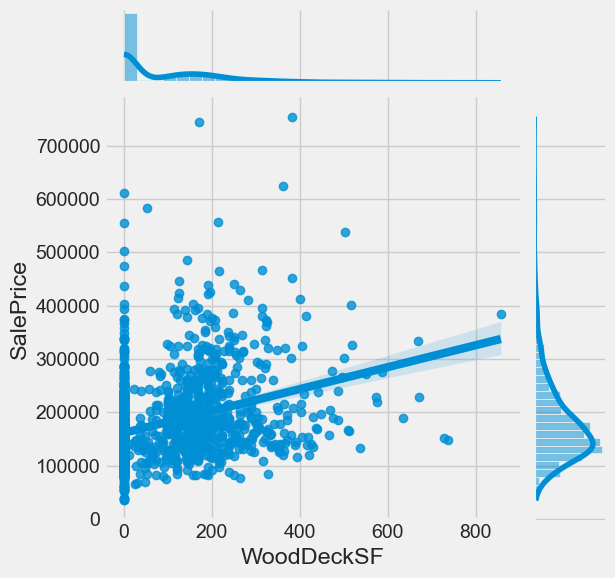

corr:0.32441344456813


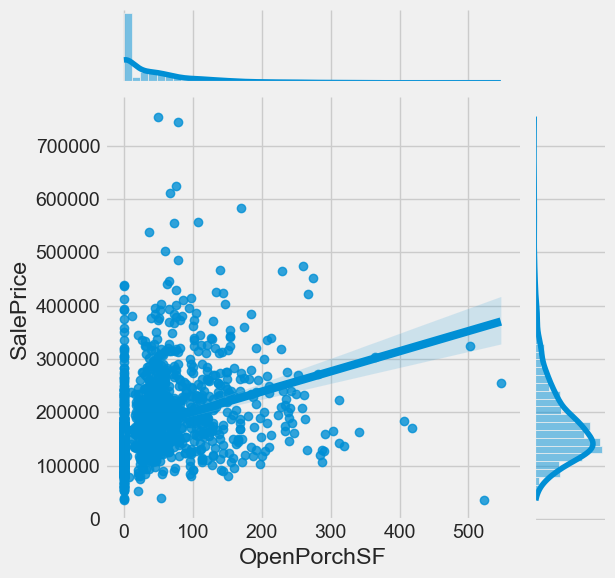

corr:0.3158562271160554


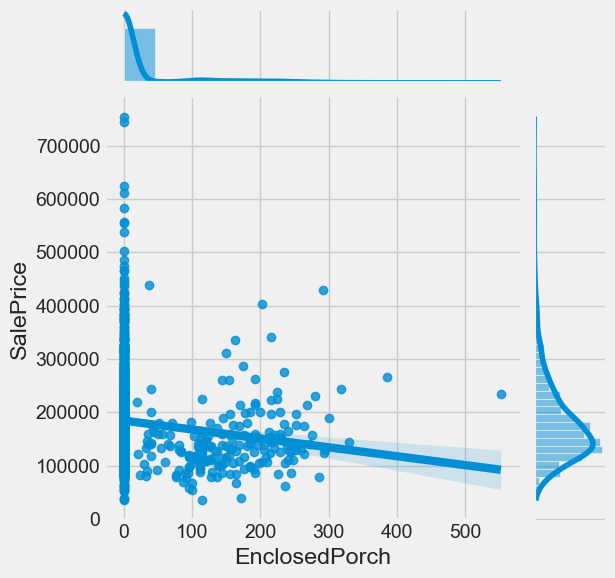

corr:-0.12857795792595675


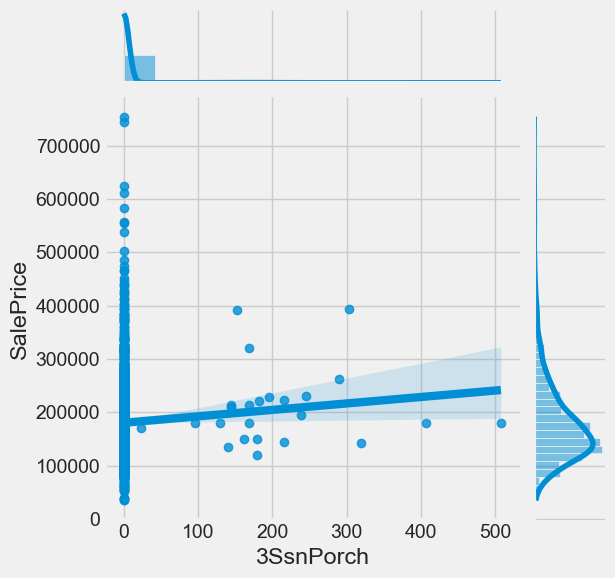

corr:0.04458366533574841


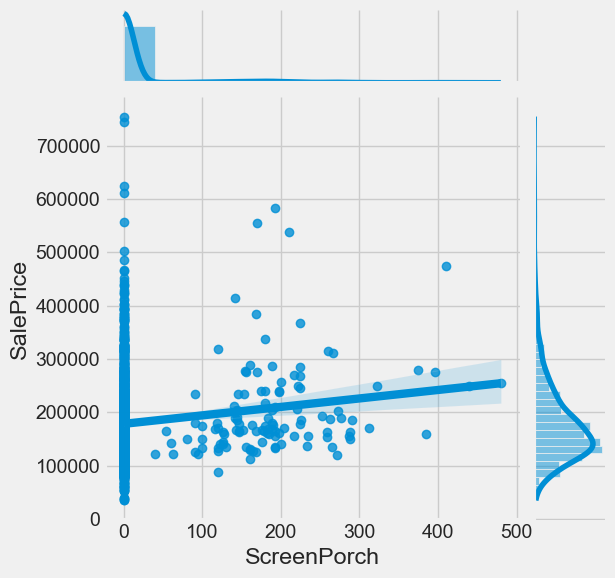

corr:0.11144657114291119


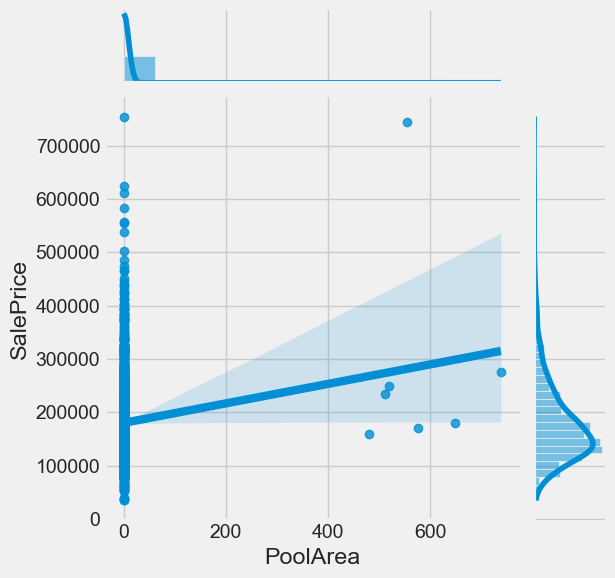

corr:0.09240354949187317


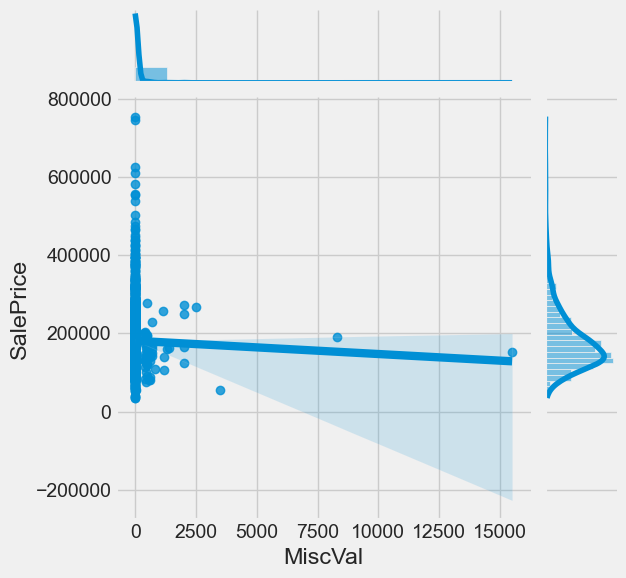

corr:-0.02118957964030324


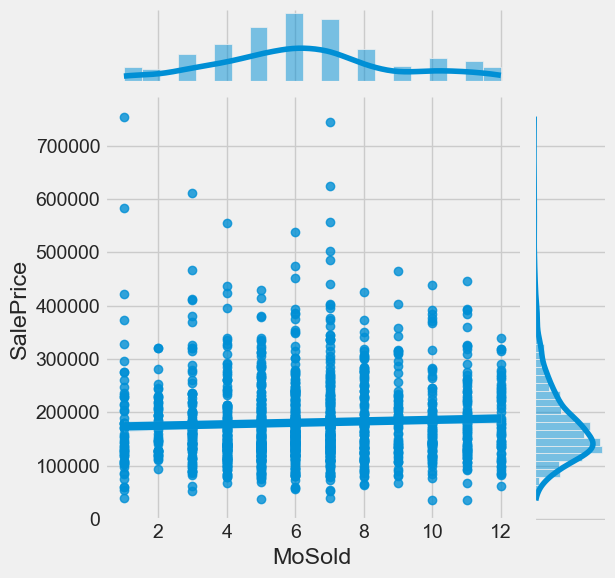

corr:0.046432245223819335


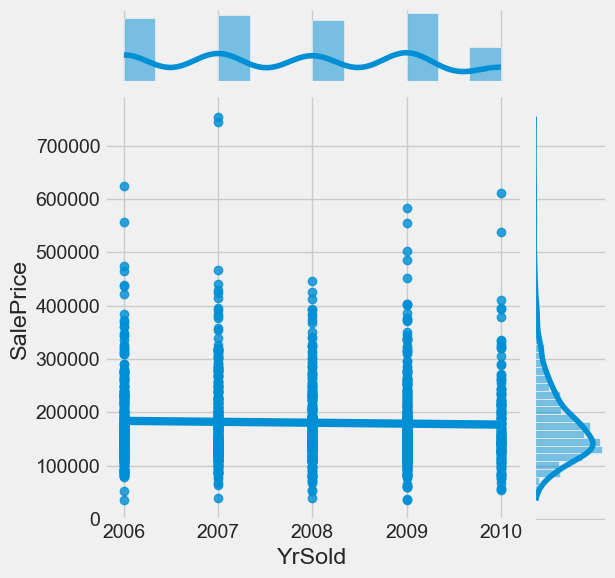

corr:-0.02892258516873035


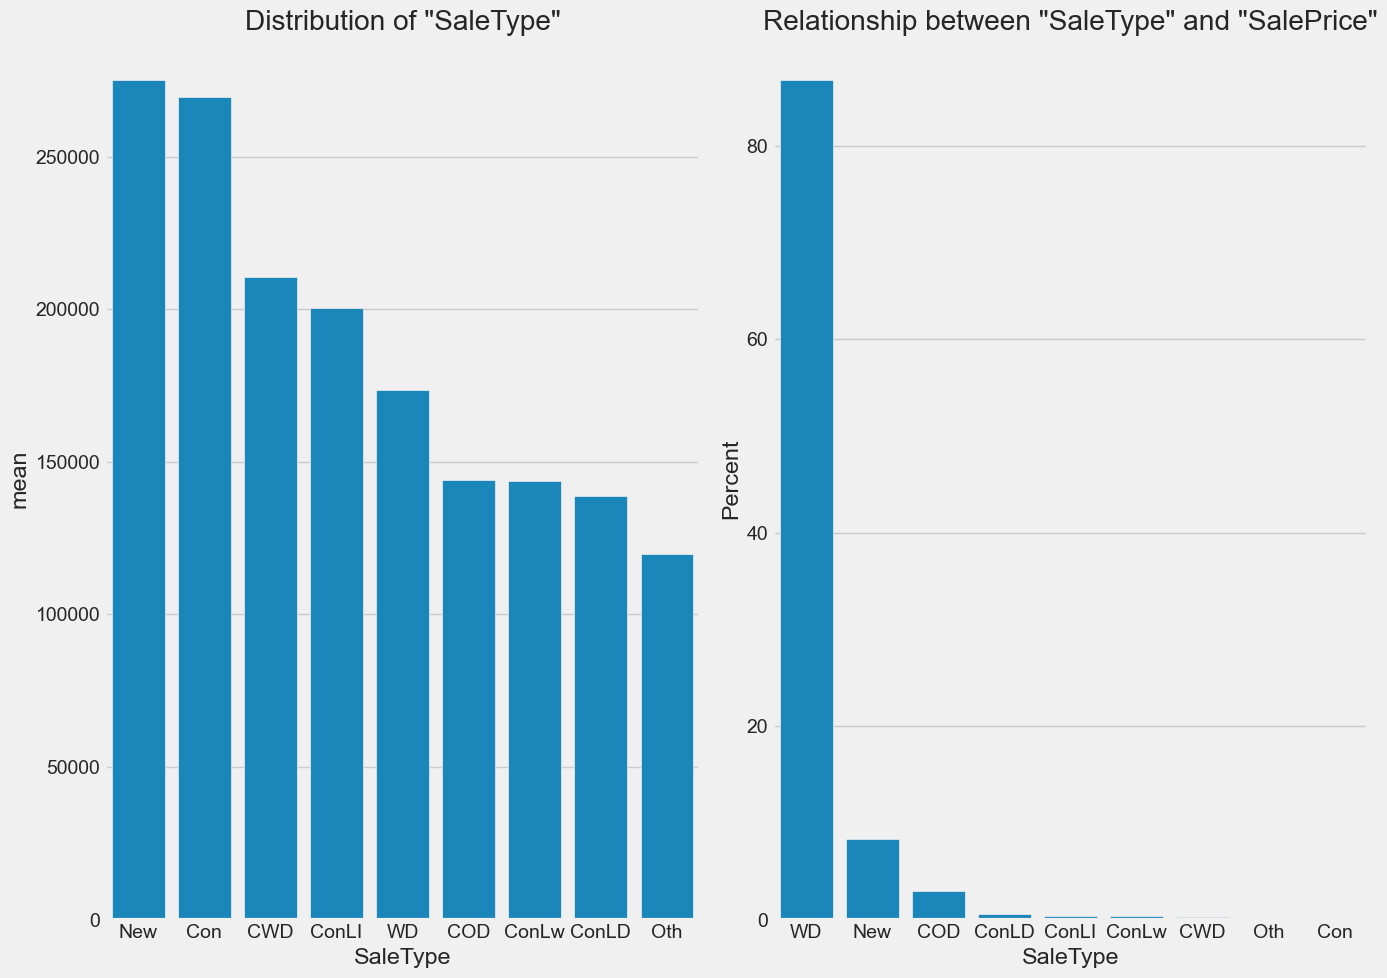

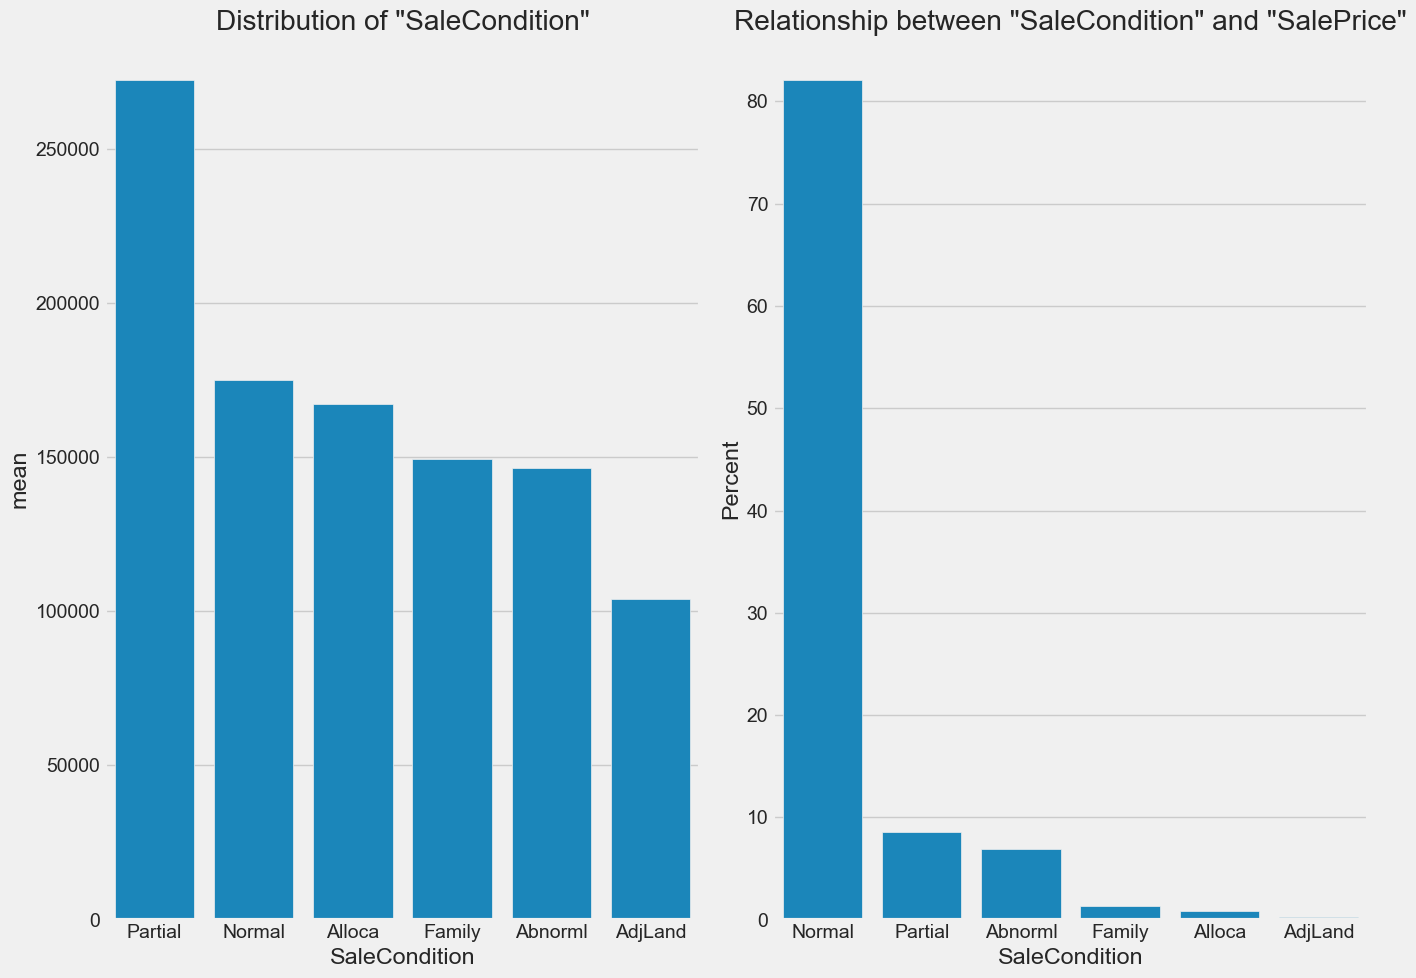

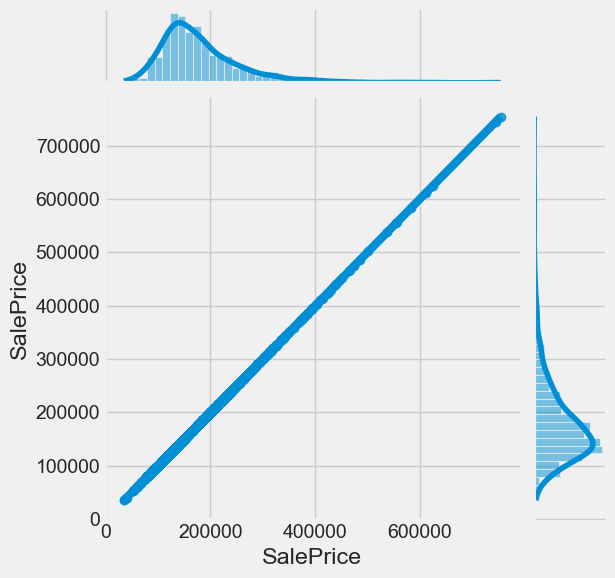

corr:0.9999999999999998


In [46]:
for col in x.columns: #plot the data except target
    plot(col)

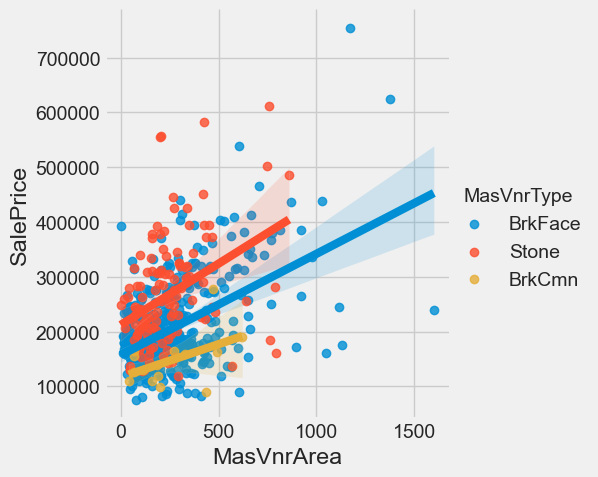

In [47]:
sns.lmplot(data=x,x='MasVnrArea',y='SalePrice',hue='MasVnrType')

**MasVnrArea** have a lot of zeros, so I plot the relation that it has with **MasVnrType** to see it can be a good feature and the answer is **yes**.

**why we need to plot the data?** well we have a lot of features and that's very good for supervise learning, but we don't need them all so I plot them to see from these features which on have a good impact in target and good for prediction

**well what's the Waste features that we look for them?**
- **Imbalanced Features**:features like **CentralAir** don't have a balanced distribution and well not good for be as a predictor
- **Features with a lot of missing and zero values**: features like **3SsnPorch** with a lot of zero values or like **MasVnrType** with 'missing' values.
- **Features with same inform**: a feature like **YearRemodelAdd** is even to **YearBlt** in a lot of records and this is not good and useful.
- **Others**: a lot of numeric features have a good correlation with target but some of them like **OverallCond** don't, and we remove them from dataset too.

## 3.4 feature engieering

1.have a feature that shows the total square feet of finished basement.

In [48]:
x['BsmtFin']= x['BsmtFinSF1']+x['BsmtFinSF2']
test['BsmtFin']= test['BsmtFinSF2']+test['BsmtFinSF1']

2.a feature for total bath in basement and ground.

In [49]:
x['BathCount']=x['FullBath']+0.5*x['HalfBath']+x['BsmtFullBath']+0.5*x['BsmtHalfBath']
test['BathCount']=test['FullBath'] + 0.5*test['HalfBath']+test['BsmtFullBath']+0.5*test['BsmtHalfBath']

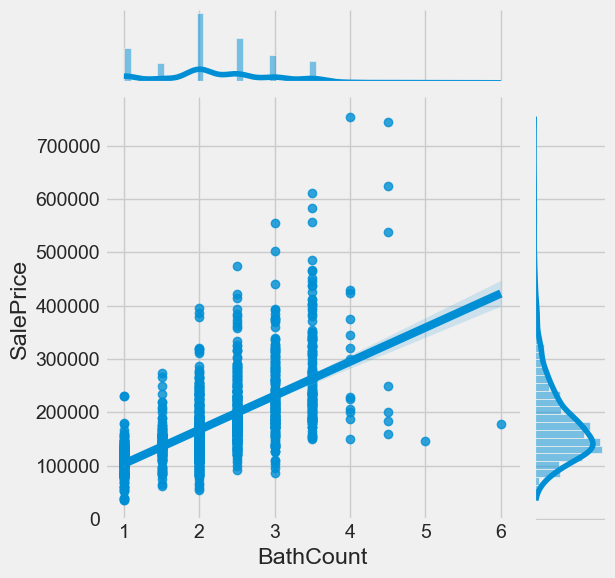

corr:0.6317310679319872


In [50]:
plot('BathCount')

you see the correlation! that's what we want, and we get it with good feature engineering.

## 3.5 Create a dataframe with useful features of dataframe.

now that we plot the feature and add two new features too. it is the time that create a dataframe from useful and not waste features.

**note**: we do not use the feature that used in feature engineering to create new features. 

In [51]:
x.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [52]:
y=x.SalePrice #create target

In [96]:
x=x[["MSZoning",'LotFrontage','LotArea','LotShape','HouseStyle','OverallQual','YearBuilt','Exterior1st','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','GrLivArea','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF','OpenPorchSF','BsmtFin',
     'Neighborhood','BathCount']]
test=test[["MSZoning",'LotFrontage','LotArea','LotShape','HouseStyle','OverallQual','YearBuilt','Exterior1st','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','GrLivArea','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars','WoodDeckSF','OpenPorchSF','BsmtFin',
     'Neighborhood','BathCount']]

In [61]:
x.shape,test.shape

((1460, 24), (1459, 24))

In [62]:
datas=[x,test]A

# 4.Data Cleaning

## 4.1 Handle missing values

In [63]:
nullCounts=pd.Series(x.isna().sum(),index=x.columns)
nullCounts=nullCounts.sort_values(ascending=False)
haveNull=nullCounts[nullCounts>0]
haveNull#print the columns that have none value.

MasVnrType     872
LotFrontage    259
BsmtQual        37
MasVnrArea       8
dtype: int64

In [64]:
nullCountsForTest=pd.Series(test.isna().sum(),index=test.columns)
nullCountsForTest=nullCountsForTest.sort_values(ascending=False)
haveNullForTest=nullCountsForTest[nullCountsForTest>0]
haveNullForTest

MasVnrType     894
LotFrontage    227
BsmtQual        44
MasVnrArea      15
MSZoning         4
BathCount        2
Exterior1st      1
BsmtFin          1
GarageCars       1
KitchenQual      1
dtype: int64

as you see we have 10 columns with null values in **test dataset** and 4 for **original dataset**.

I ignore the 7 columns that has null in **test** and not in **original** (we use the xgboost model and xgboost can handle a few null ones.

In [65]:
x['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [66]:
for data in datas:
    data['MasVnrType']=data['MasVnrType'].fillna('NoneType')
    data['LotFrontage']=data['LotFrontage'].fillna(data.groupby('Neighborhood')['LotFrontage'].transform('mean'))
    data['BsmtQual']= data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
    data['MasVnrArea']= data['MasVnrArea'].fillna(0)

**what is stategy of handling missing values?**

-**MasVnrType**: Filled with 'NoneType'

The MasVnrType column represents the type of masonry veneer. Missing values in this column are replaced with 'NoneType', which indicates that there is no veneer
present. This helps in treating the absence of veneer as a meaningful category rather than an undefined or missing value.

-**LotFrontage**: Filled with Mean of Neighborhood

The LotFrontage column shows the linear feet of street connected to the property. Missing values are filled with the mean LotFrontage value of the corresponding Neighborhood. This method ensures that missing values are imputed based on the local context of the neighborhood, which can be more representative than using a global mean.

-**BsmtQual**: Filled with Mode (Most Frequent Value)

The BsmtQual column indicates the quality of the basement. Missing values are filled with the mode (the most frequent value) of this column. This approach assumes that the most common quality level is a reasonable substitute for missing data. The mode is chosen because it represents the most typical value in the dataset.

-**MasVnrArea**: Filled with 0

The MasVnrArea column represents the area of the masonry veneer. Missing values are replaced with 0, which signifies that no veneer is present, thus aligning with the treatment of MasVnrType where the absence of veneer is explicitly marked.

In [67]:
x.isna().sum()

MSZoning        0
LotFrontage     0
LotArea         0
LotShape        0
HouseStyle      0
OverallQual     0
YearBuilt       0
Exterior1st     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
GrLivArea       0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
WoodDeckSF      0
OpenPorchSF     0
BsmtFin         0
Neighborhood    0
BathCount       0
dtype: int64

In [68]:
test.isna().sum()

MSZoning        4
LotFrontage     0
LotArea         0
LotShape        0
HouseStyle      0
OverallQual     0
YearBuilt       0
Exterior1st     1
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
Neighborhood    0
GrLivArea       0
KitchenQual     1
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      1
WoodDeckSF      0
OpenPorchSF     0
BsmtFin         1
BathCount       2
dtype: int64

you see the difference. no more null values in this 4 columns.

## 4.2 outlier detection

let's see the distribution of numeric features.

In [70]:
def outlier_detection(data):
    numeric_cols=data.select_dtypes(exclude='object').columns
    for col in numeric_cols:
        q1, q3 = np.percentile(x[col], [25, 75])
        iqr = q3 - q1
        upper_limit = 1.5 * iqr + q3
        lower_limit = -1.5 * iqr + q1
        outliers = x[(x[col] > upper_limit) | (x[col] < lower_limit)]
        sns.boxplot(x=data[col])
        plt.show()
        print(f'count of outliers:{len(outliers)}')

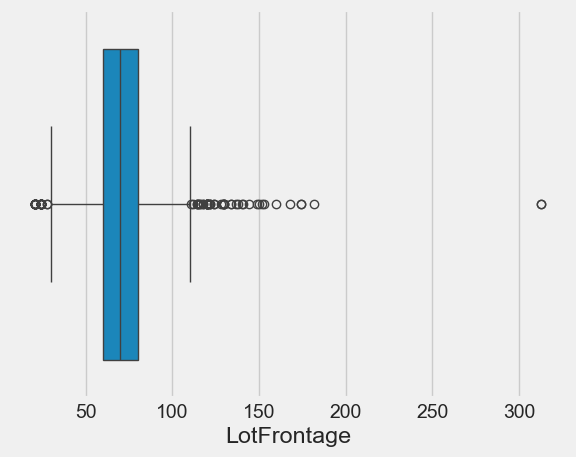

count of outliers:91


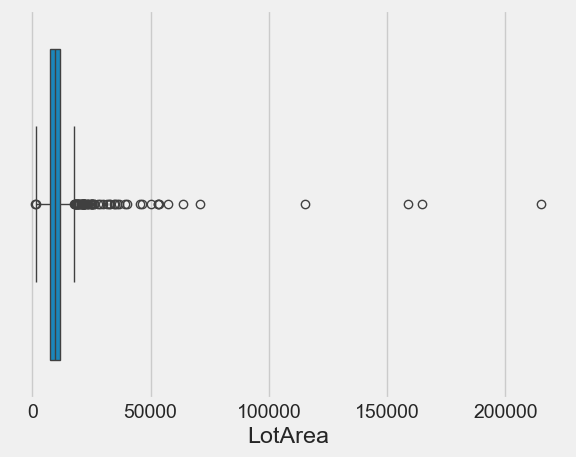

count of outliers:69


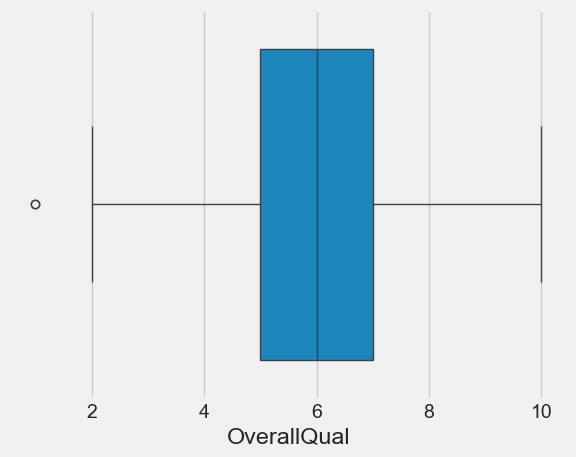

count of outliers:2


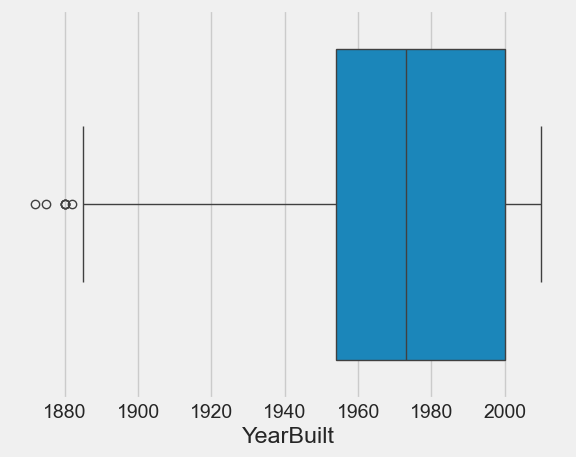

count of outliers:7


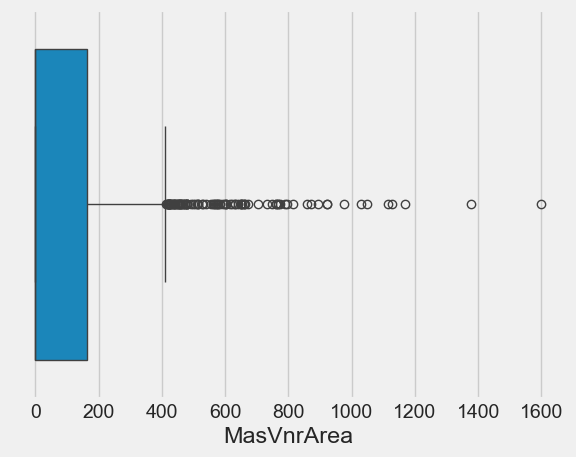

count of outliers:98


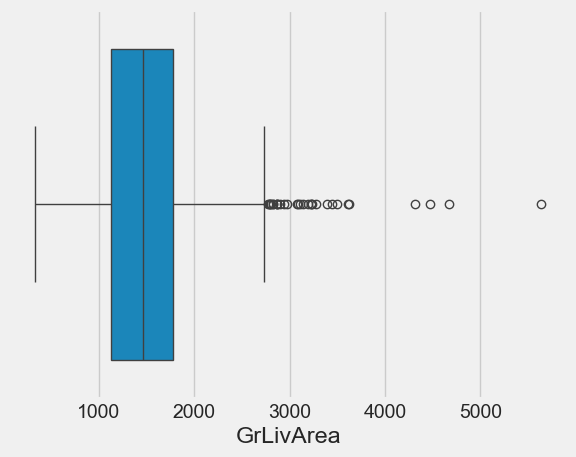

count of outliers:31


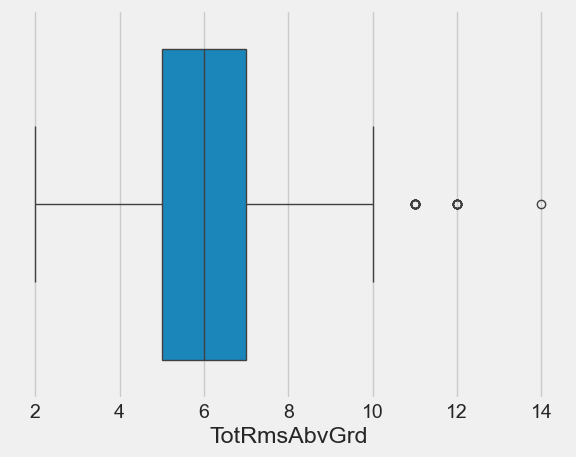

count of outliers:30


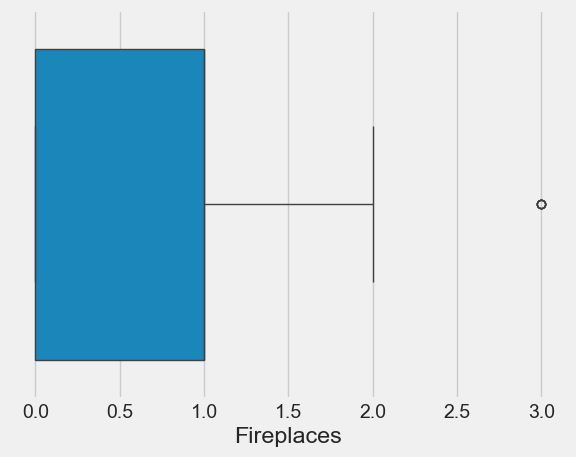

count of outliers:5


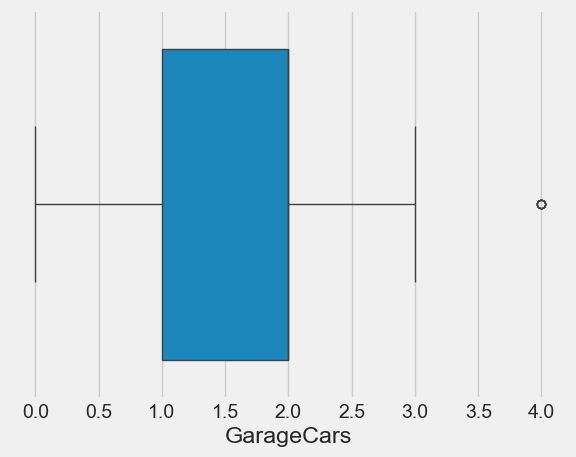

count of outliers:5


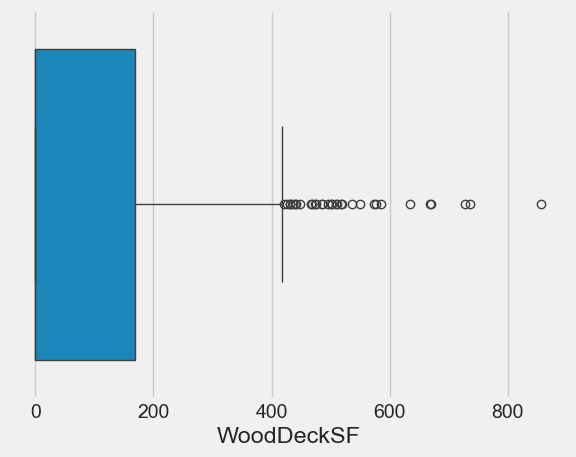

count of outliers:32


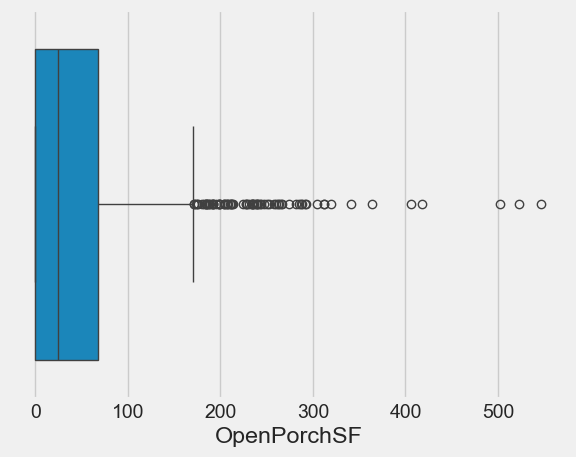

count of outliers:77


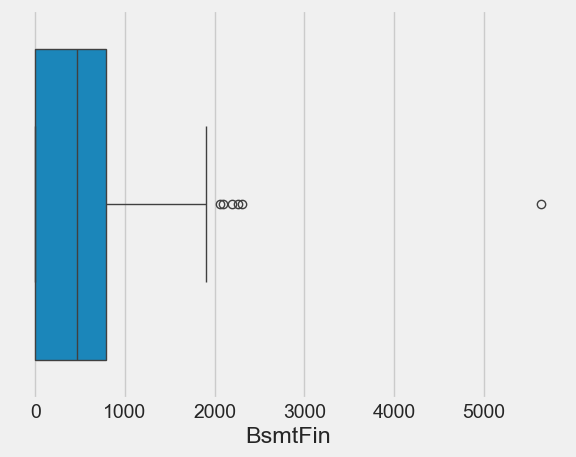

count of outliers:6


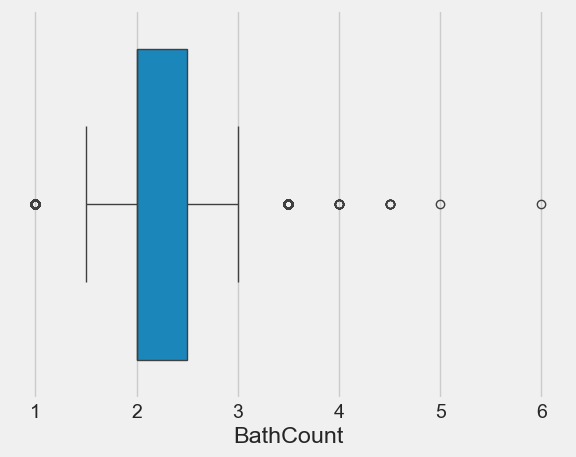

count of outliers:394


In [71]:
outlier_detection(x)

well outliers of some of the features like **BathCount** don't have to be handled. (they don't have any vast range)

but I like to handle outliers for continuous features like **GrLivArea**.

In [76]:
def outlier_handling(data,col, replace_with_thresholds=True, drop_outliers=False):
        q1, q3 = np.percentile(data[col], [25, 75])
        iqr = q3 - q1
        upper_limit = 1.5 * iqr + q3
        lower_limit = -1.5 * iqr + q1
        outliers = data[(data[col] > upper_limit) | (data[col] < lower_limit)]
        if replace_with_thresholds:
            data.loc[data[col] > upper_limit, col] = upper_limit
            # Replace values less than the lower limit with the lower limit
            data.loc[data[col] < lower_limit, col] = lower_limit

        if drop_outliers:
            # Drop the rows with outliers
            data = data.drop(outliers.index)

**outlier handling strategys**:

1. replacing outliers with threshold.
2. dropping outliers.

**which one is better and which one we use?**

the number one strategy can keep the information and don't have to be drop records of data for that.so I'm going to use that.

In [77]:
for col in ['BsmtFin','OpenPorchSF','WoodDeckSF','GrLivArea','MasVnrArea','YearBuilt','LotArea','LotFrontage']:
    outlier_handling(x,col)

I'm going to plot the numeric features to see that the outliers handled or not.

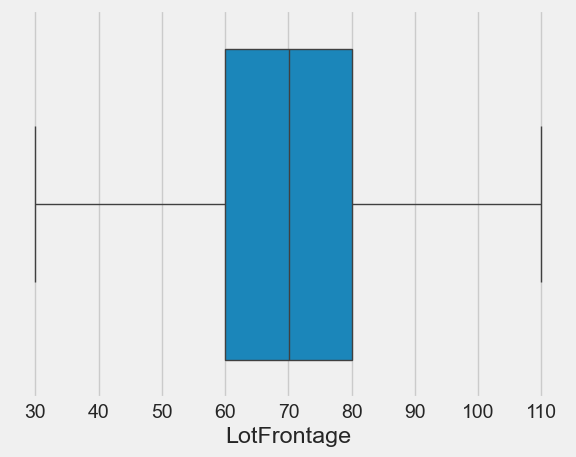

count of outliers:0


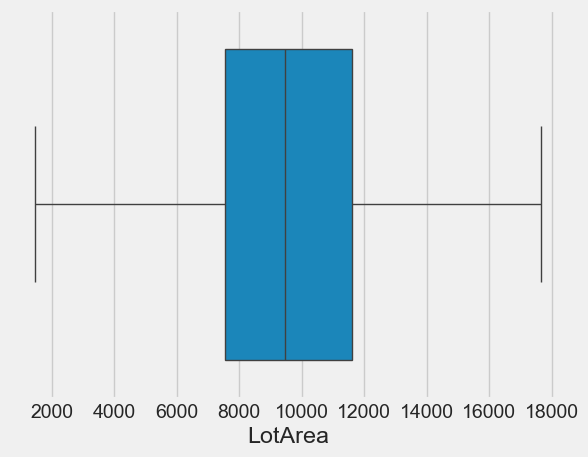

count of outliers:0


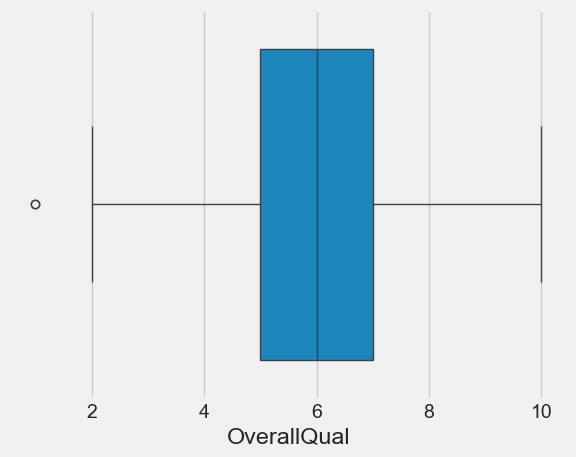

count of outliers:2


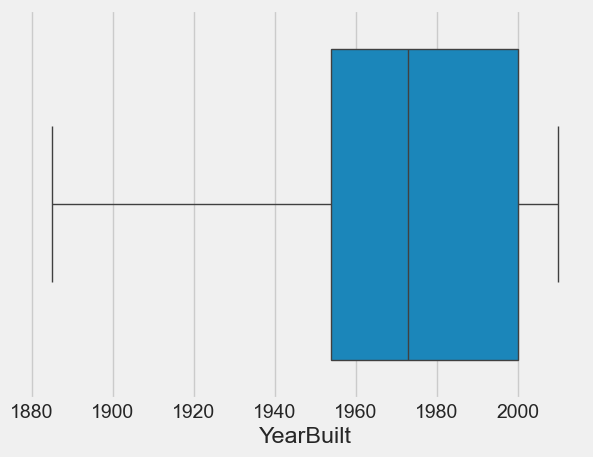

count of outliers:0


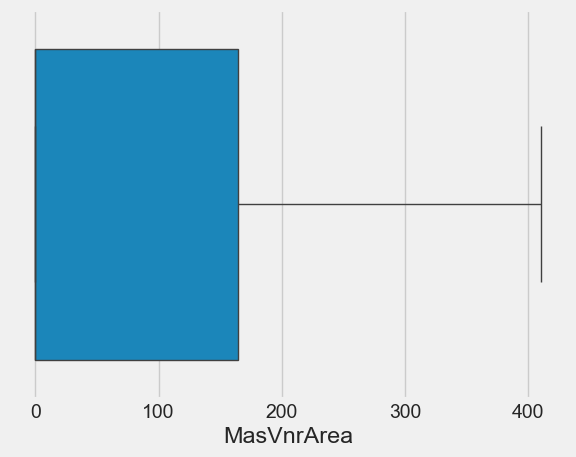

count of outliers:0


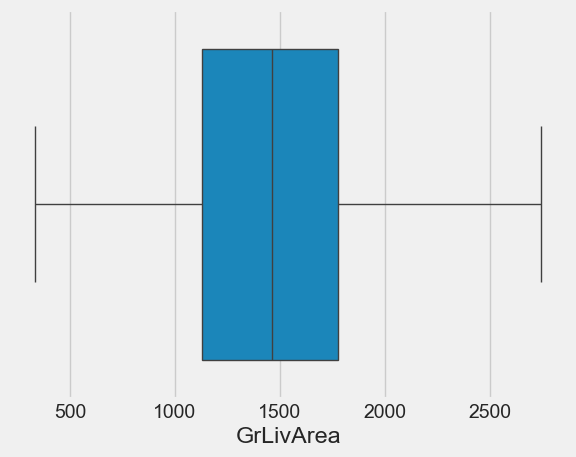

count of outliers:0


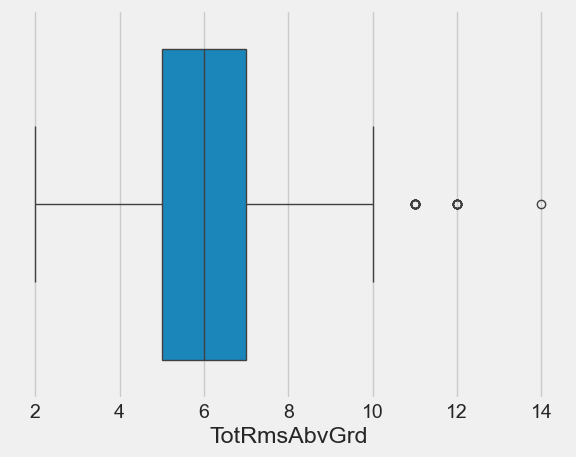

count of outliers:30


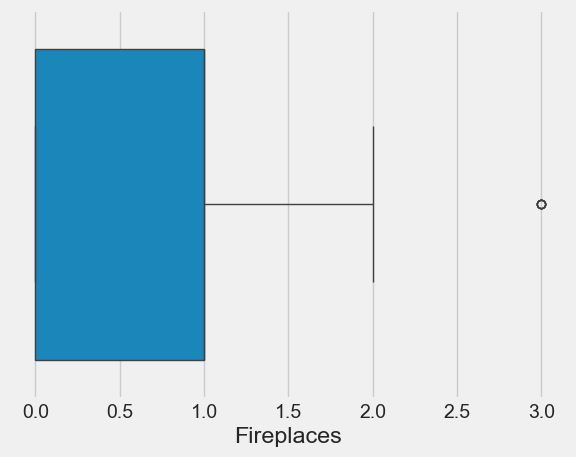

count of outliers:5


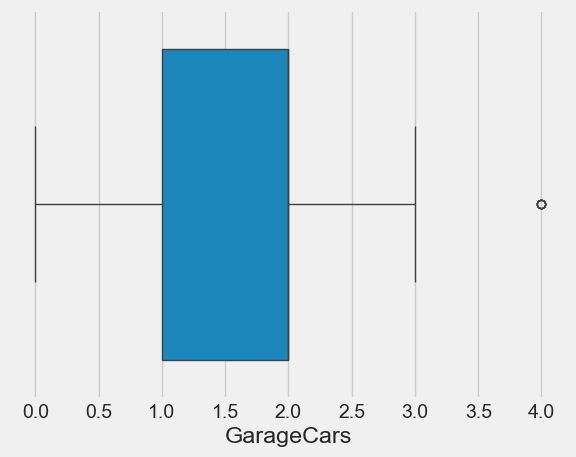

count of outliers:5


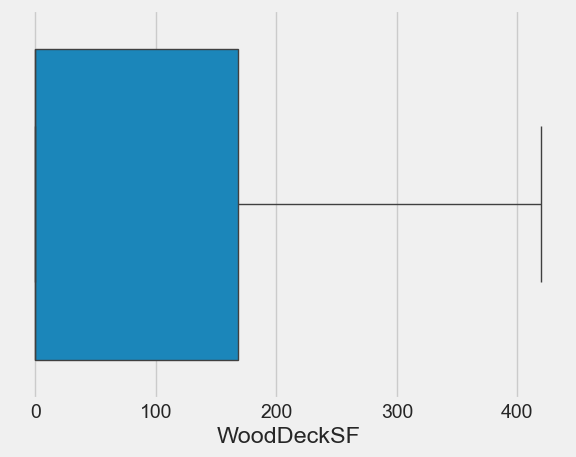

count of outliers:0


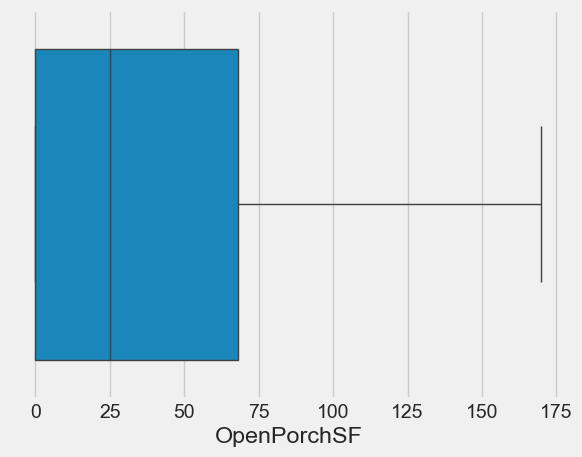

count of outliers:0


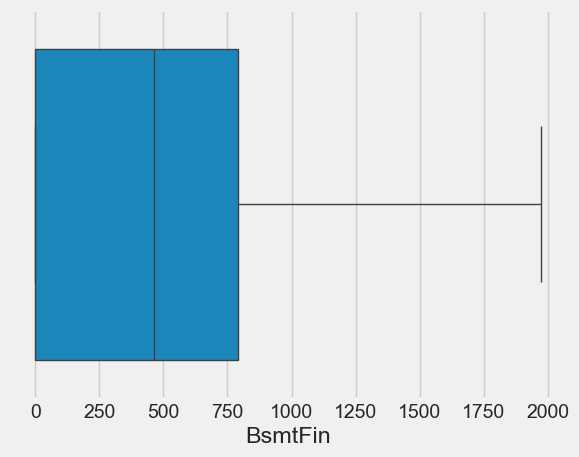

count of outliers:0


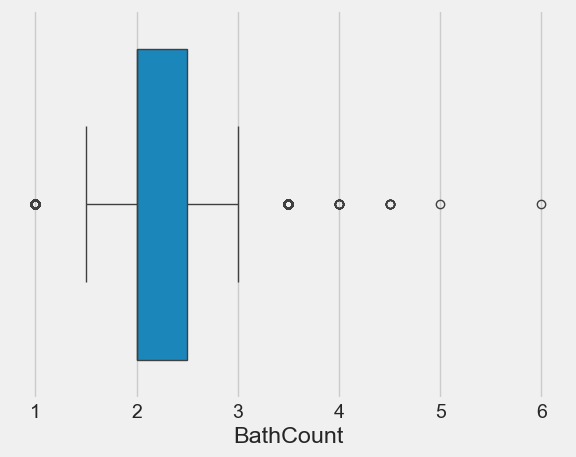

count of outliers:394


In [79]:
outlier_detection(x)

look's like the job is done.

# 5.Creating model

## 5.1 spliting the data

In [82]:
for data in datas:
    for col in data.select_dtypes(include='object').columns:
        data[col]=data[col].astype('category')

In [83]:
test.dtypes,x.dtypes

(MSZoning        category
 LotFrontage      float64
 LotArea            int64
 LotShape        category
 HouseStyle      category
 OverallQual        int64
 YearBuilt          int64
 Exterior1st     category
 MasVnrType      category
 MasVnrArea       float64
 ExterQual       category
 ExterCond       category
 Foundation      category
 BsmtQual        category
 Neighborhood    category
 GrLivArea          int64
 KitchenQual     category
 TotRmsAbvGrd       int64
 Fireplaces         int64
 GarageCars       float64
 WoodDeckSF         int64
 OpenPorchSF        int64
 BsmtFin          float64
 BathCount        float64
 dtype: object,
 MSZoning        category
 LotFrontage      float64
 LotArea          float64
 LotShape        category
 HouseStyle      category
 OverallQual        int64
 YearBuilt          int64
 Exterior1st     category
 MasVnrType      category
 MasVnrArea       float64
 ExterQual       category
 ExterCond       category
 Foundation      category
 BsmtQual        categ

In [84]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2,random_state=1)
dtrain= xgb.DMatrix(x_train,y_train,enable_categorical=True) #handling categorical variables.
dtest = xgb.DMatrix(x_val,y_val,enable_categorical=True)

## 5.2 train and evaluate the model

In [90]:
params={'objective':'reg:squarederror',
        'n_jobs':-1,}
np.random.seed(0)
model = xgb.train(dtrain=dtrain,
                  params=params,
                  verbose_eval=10,
                  num_boost_round=1000,
                  early_stopping_rounds=10,
                  evals = [(dtrain,'train'),(dtest,'eval')])

[0]	train-rmse:58985.43667	eval-rmse:68104.29771
[10]	train-rmse:11443.55644	eval-rmse:27448.40469
[20]	train-rmse:7491.16231	eval-rmse:26473.13652
[30]	train-rmse:6008.06325	eval-rmse:26259.94334
[37]	train-rmse:4691.16854	eval-rmse:26326.62038


In [92]:
preds = model.predict(dtest)
r2_score(y_val,preds)

0.9027167558670044

yeah! not bad score.

## 5.3 make submission for competition

In [97]:
dkaggle = xgb.DMatrix(test,enable_categorical=True)

In [100]:
submission = model.predict(dkaggle)
submission = pd.Series(submission,index=test.index,name='SalePrice')
submission.to_csv('submission.csv',index=False)

In [101]:
submission

Id
1461    119793.453125
1462    160613.593750
1463    193475.234375
1464    191255.156250
1465    179563.968750
            ...      
2915     78837.367188
2916     88180.140625
2917    168061.125000
2918    116480.640625
2919    178002.093750
Name: SalePrice, Length: 1459, dtype: float32